# Matplotlib for presenting results

## Learning curves

Make matplotlib graphics to show up inline. 

In [393]:
%matplotlib inline

Import matplotlib. If you want to generate images without having a window appear (if you run your scripts on servers), use a non-interactive backend such as Agg (for PNGs), PDF, SVG or PS. To do so, uncomment the second line in the following cell.

In [148]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

Matplotlib has different styles. Run the cell to check which styles are available.

In [395]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

To set a style you want use ```stlye.use```.

In [397]:
matplotlib.style.use('seaborn-darkgrid')

```plot_learning_curves``` plots train, dev, test measure-time curves. Play around with different parameters to get a figure that suits you the best. ```flist``` is the list of size 3; the first element is the list of train scores, the second of dev scors and the third of test scores. 

In [398]:
def plot_learning_curves(fig_path, n_epochs, flist, style=''):
    measure = 'f1'
    steps_measure = 'epochs'
    
    plt.figure(dpi=400)
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    
    steps = range(1, n_epochs+1)
    plt.title('learning curves' + style)
    plt.plot(steps, flist[0], linewidth=1, color='#6699ff', linestyle='-', marker='o',
             markeredgecolor='black',
             markeredgewidth=0.5, label='train')
    plt.plot(steps, flist[1], linewidth=3, color='#ff4d4d', linestyle='-', marker='D',
             markeredgecolor='black',
             markeredgewidth=0.5, label='test')
    plt.plot(steps, flist[2], linewidth=2, color='#ffcc66', linestyle='-', marker='s',
             markeredgecolor='black',
             markeredgewidth=0.5, label='dev')
    plt.xlabel(steps_measure)
    plt.xticks(steps)
    plt.ylabel(measure)
    plt.legend(loc='best', numpoints=1, fancybox=True)
    plt.show()
    plt.savefig(fig_path)

Let's generate a random examples to illustrate one figure with learning curves. 

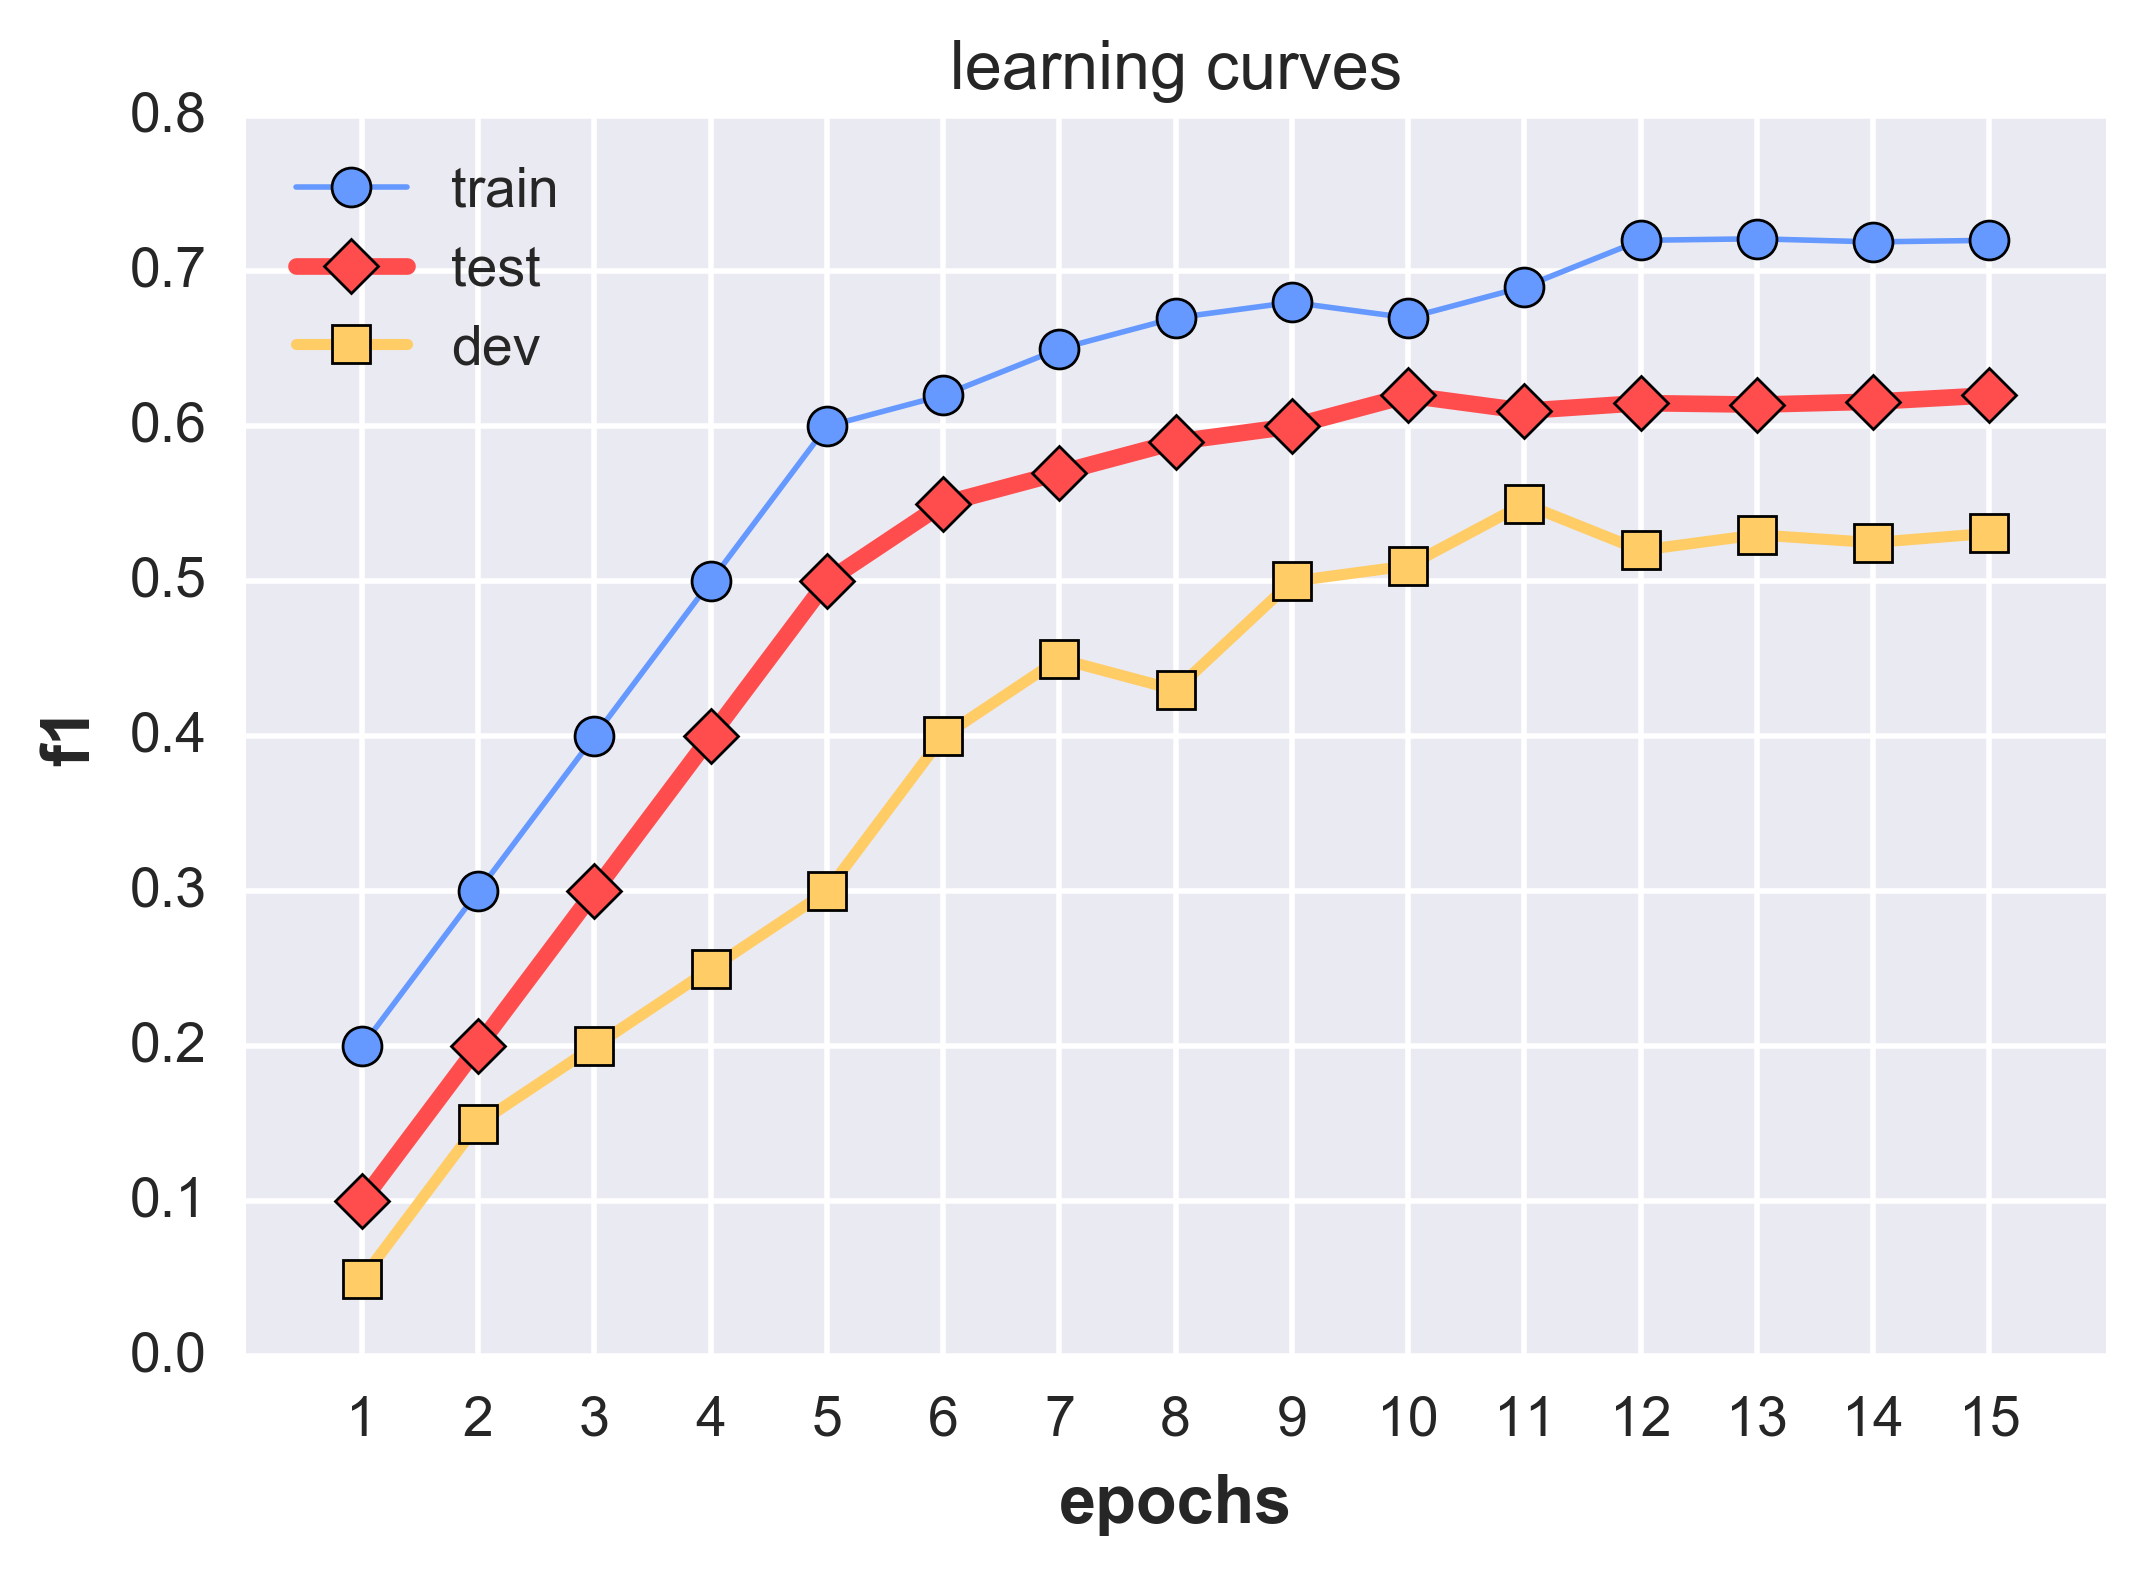

In [399]:
fig_path = 'figs/'
train_f1 = [0.2, 0.3, 0.4, 0.5, 0.6, 0.62, 0.65, 0.67, 0.68, 0.67, 0.69, 0.72, 0.721, 0.719, 0.72]
dev_f1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.57, 0.59, 0.6, 0.62, 0.61, 0.615, 0.614, 0.6159, 0.62]
test_f1 = [0.05, 0.15, 0.2, 0.25, 0.3, 0.4, 0.45, 0.43, 0.5, 0.51, 0.55, 0.52, 0.53, 0.525, 0.531]
flist = [train_f1, dev_f1, test_f1]
n_epochs = 15
plot_learning_curves(fig_path + 'learning_curve.png', n_epochs , flist)

And the same figure with all available styles.

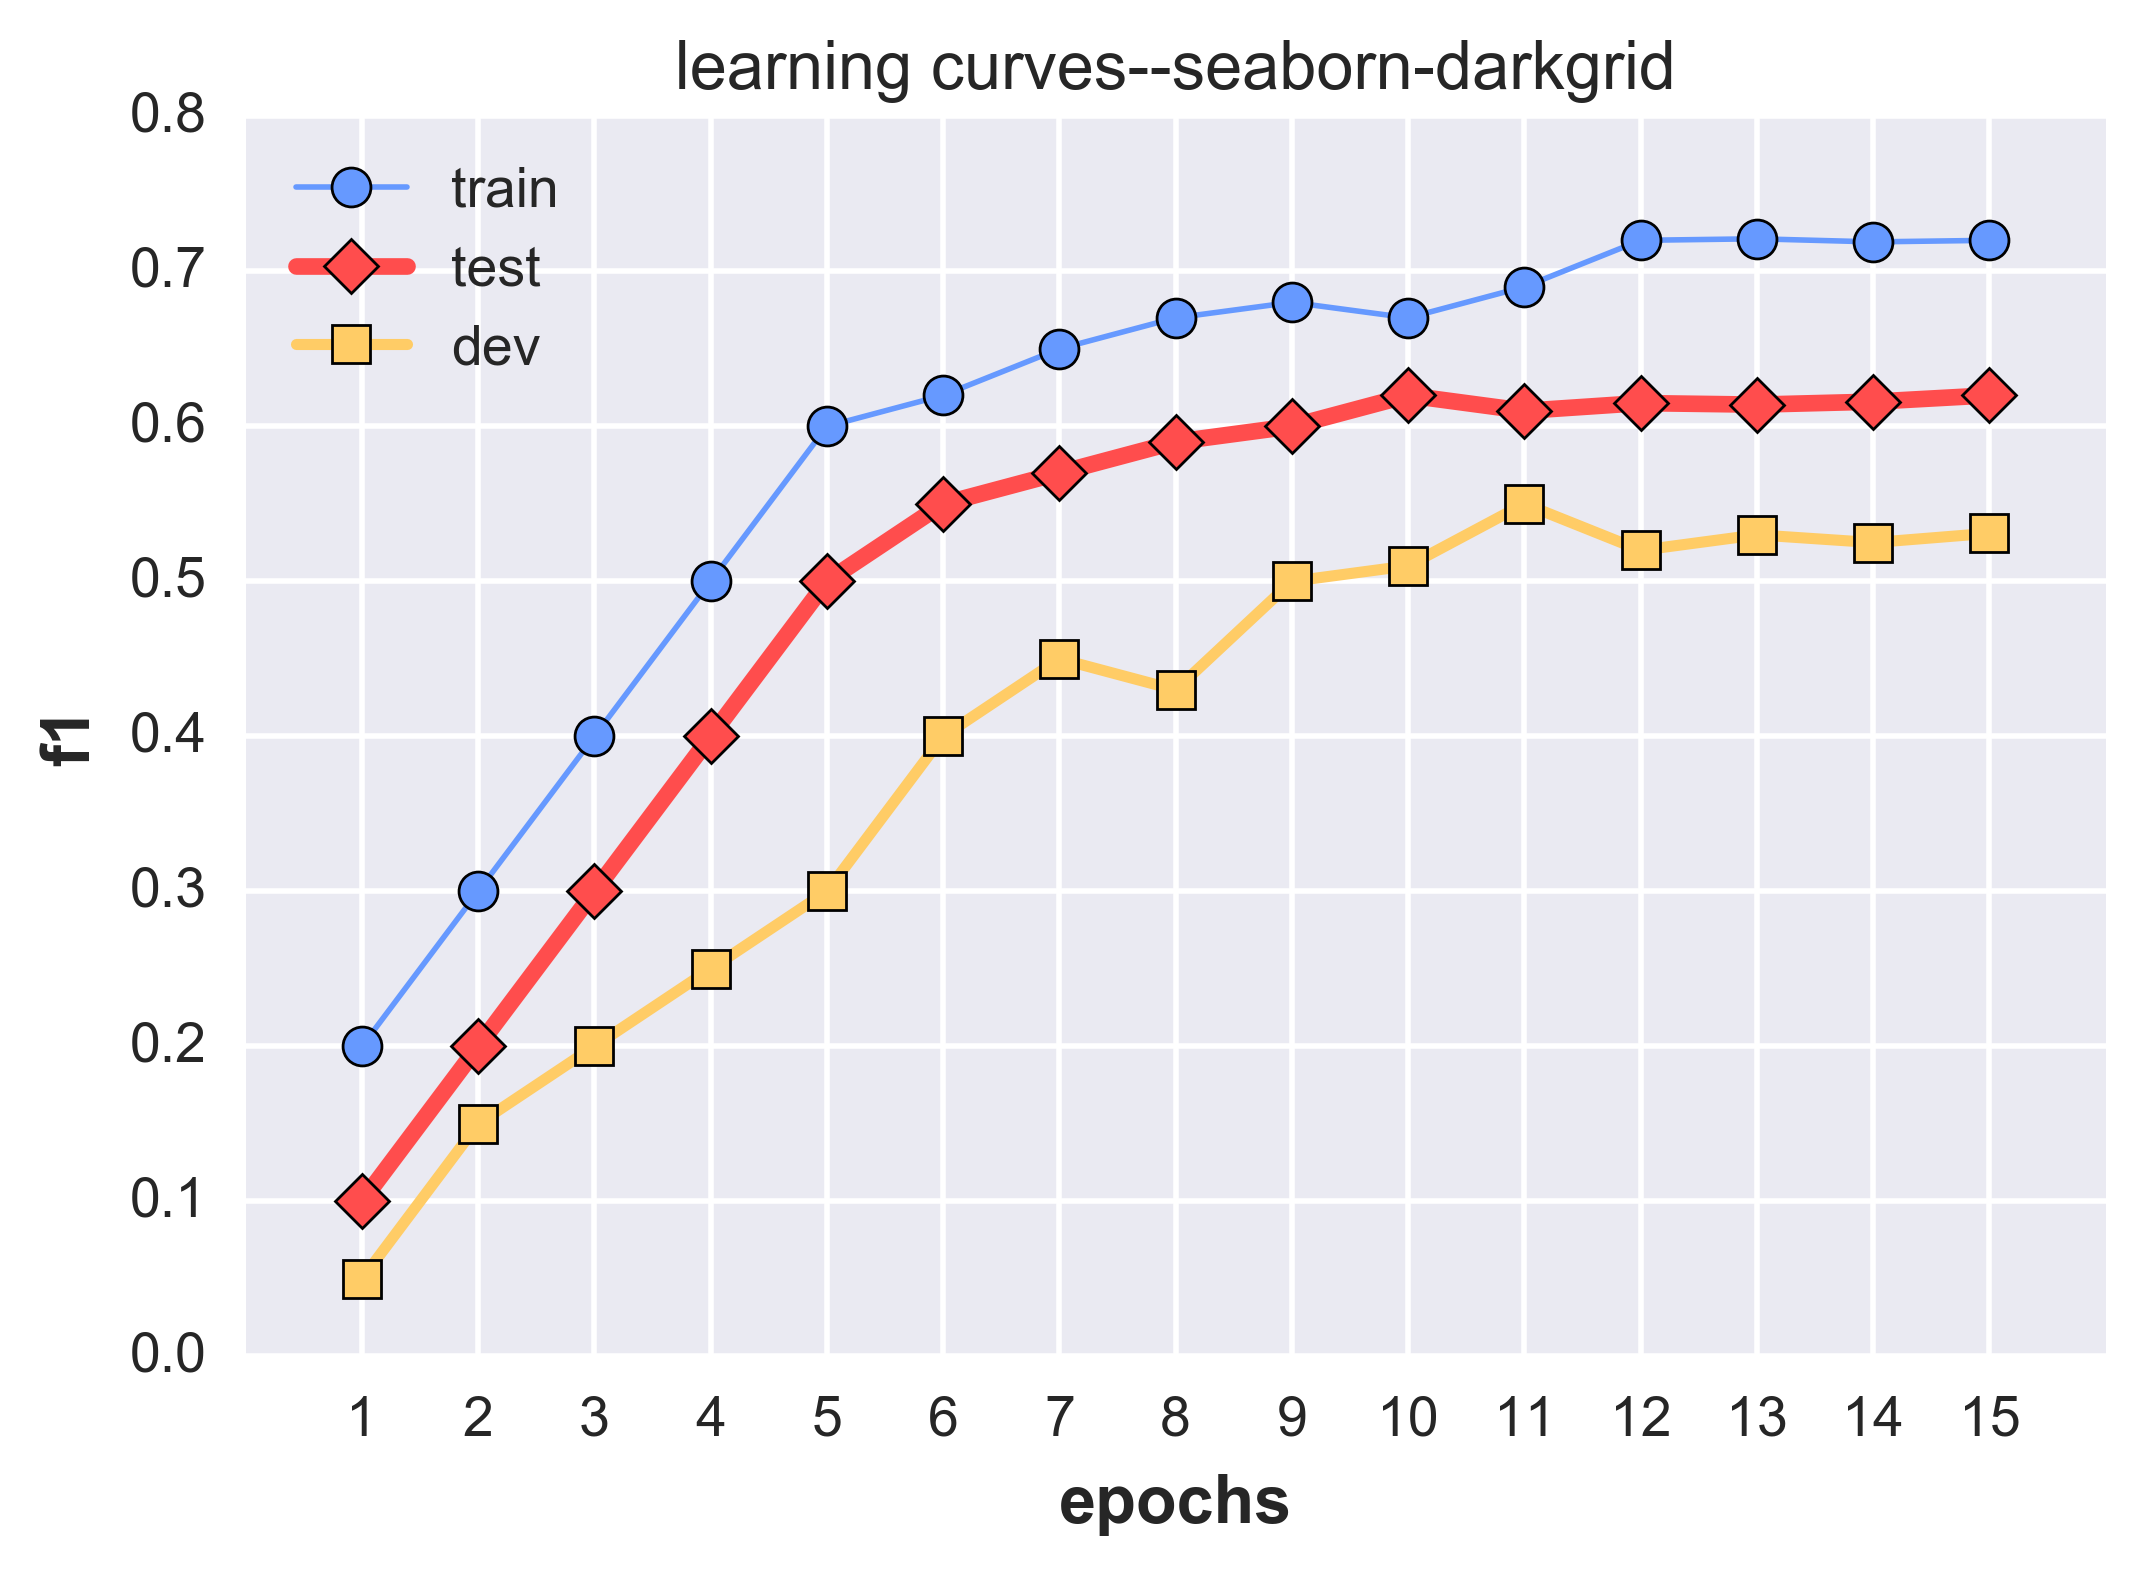

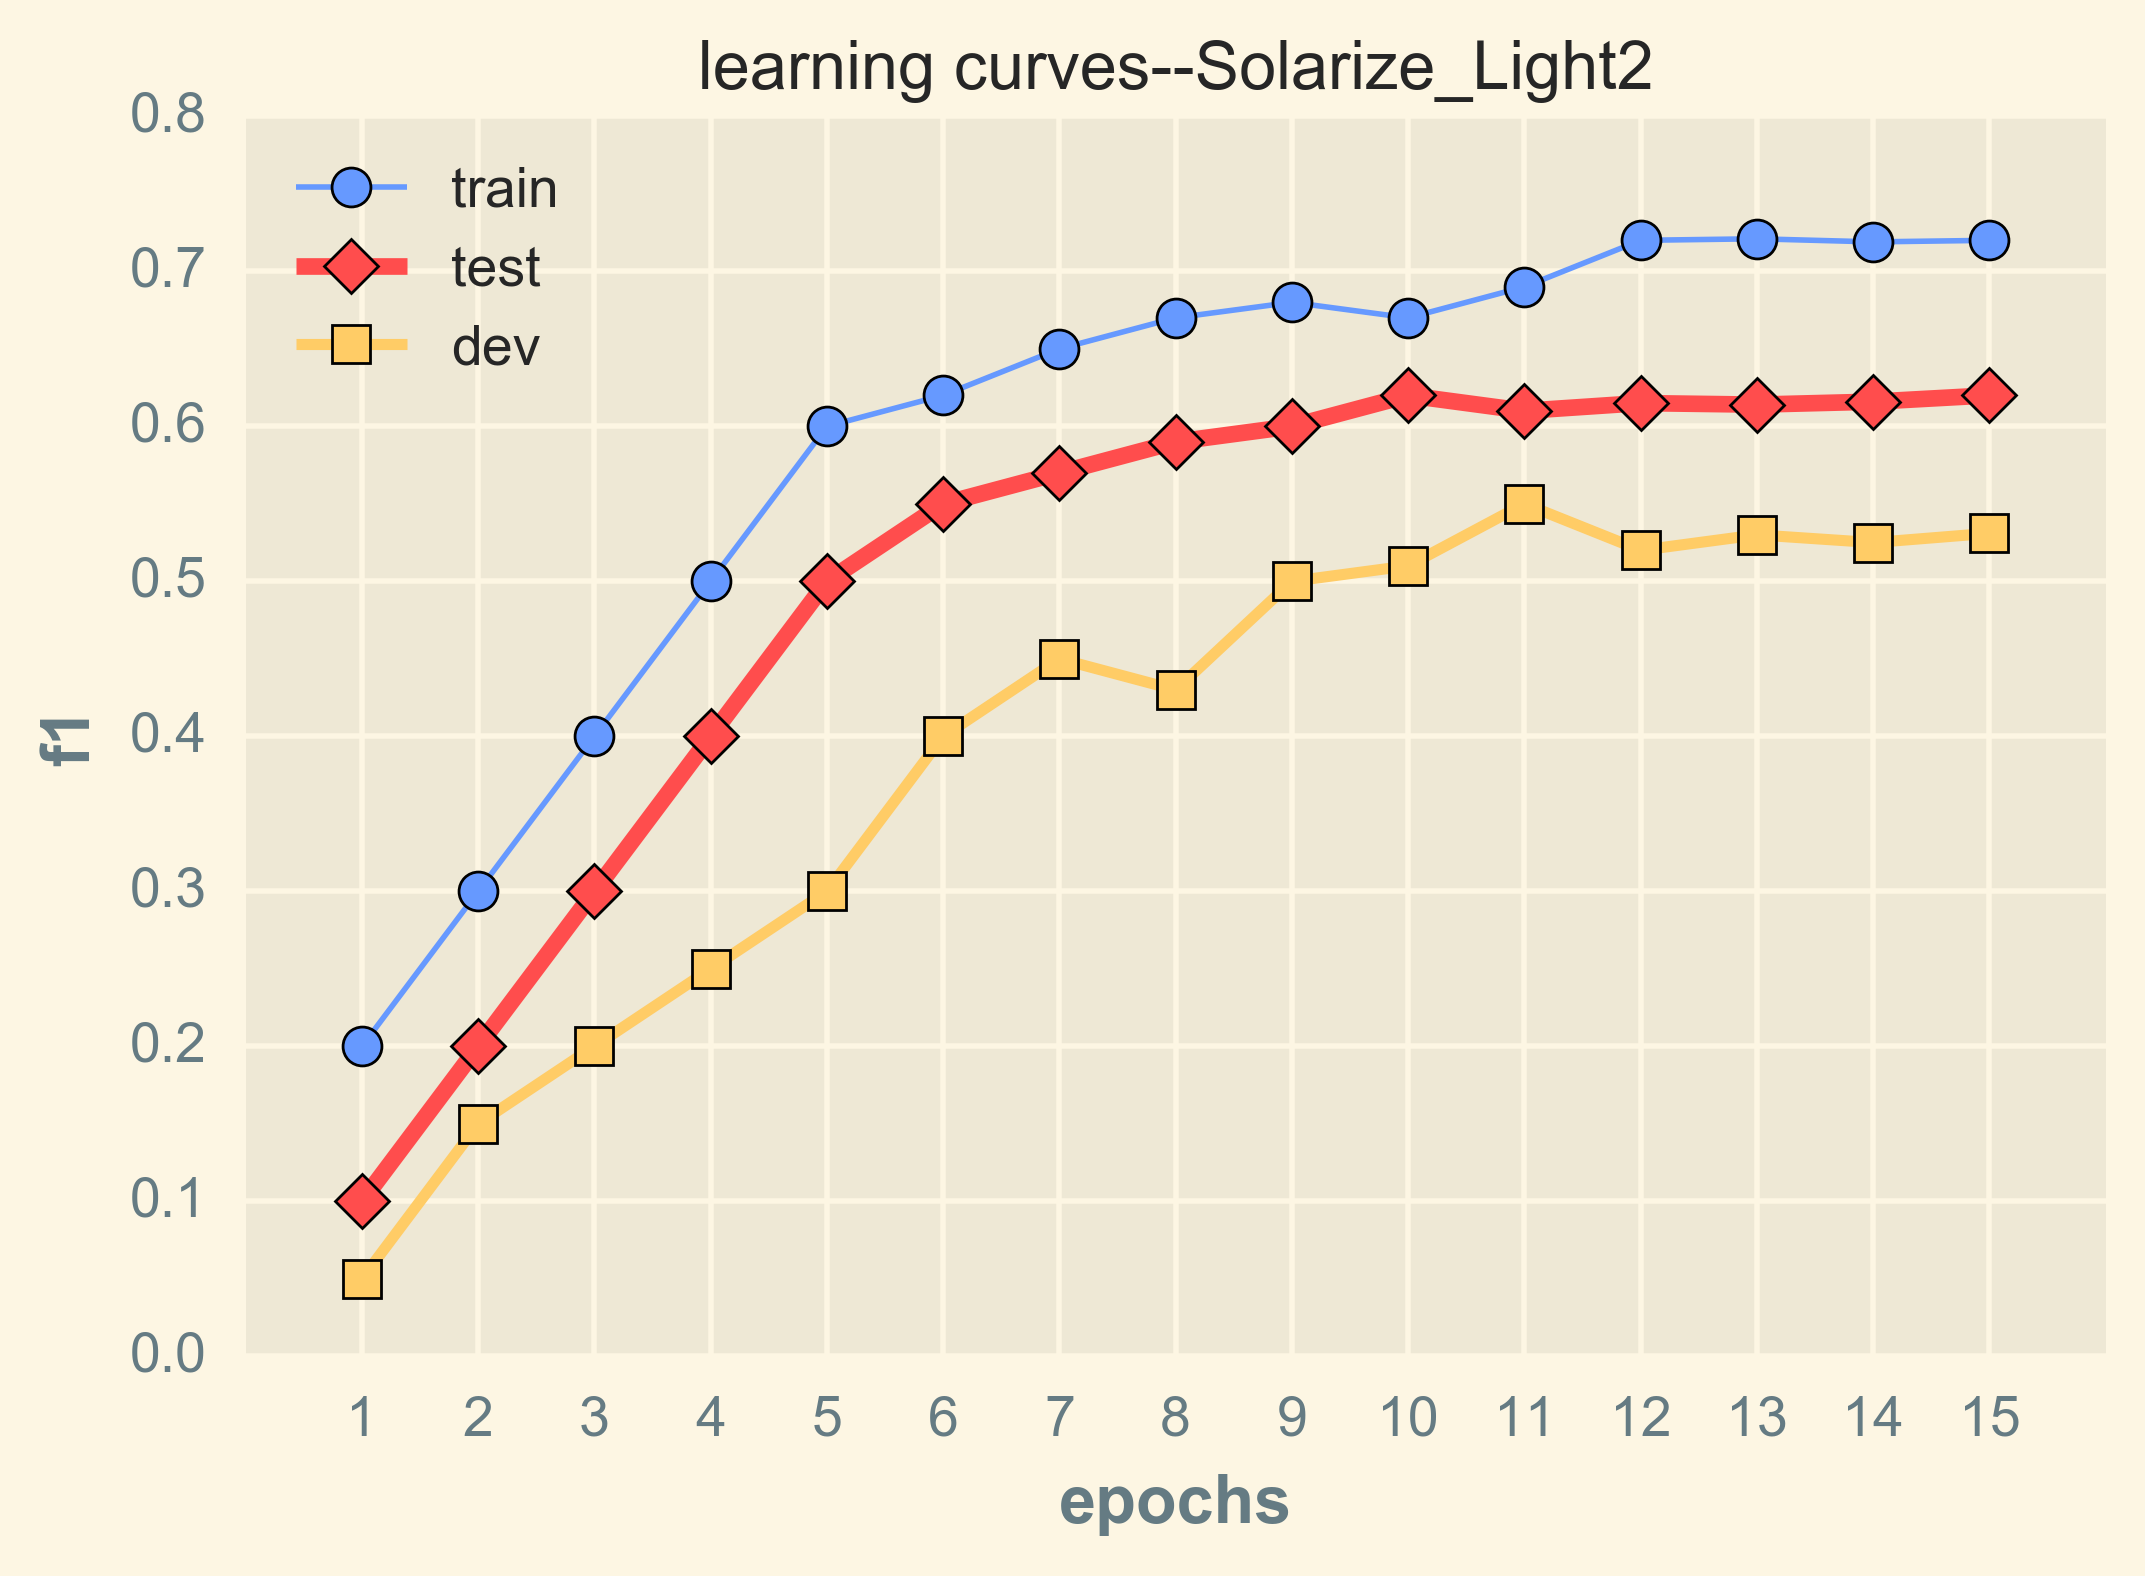

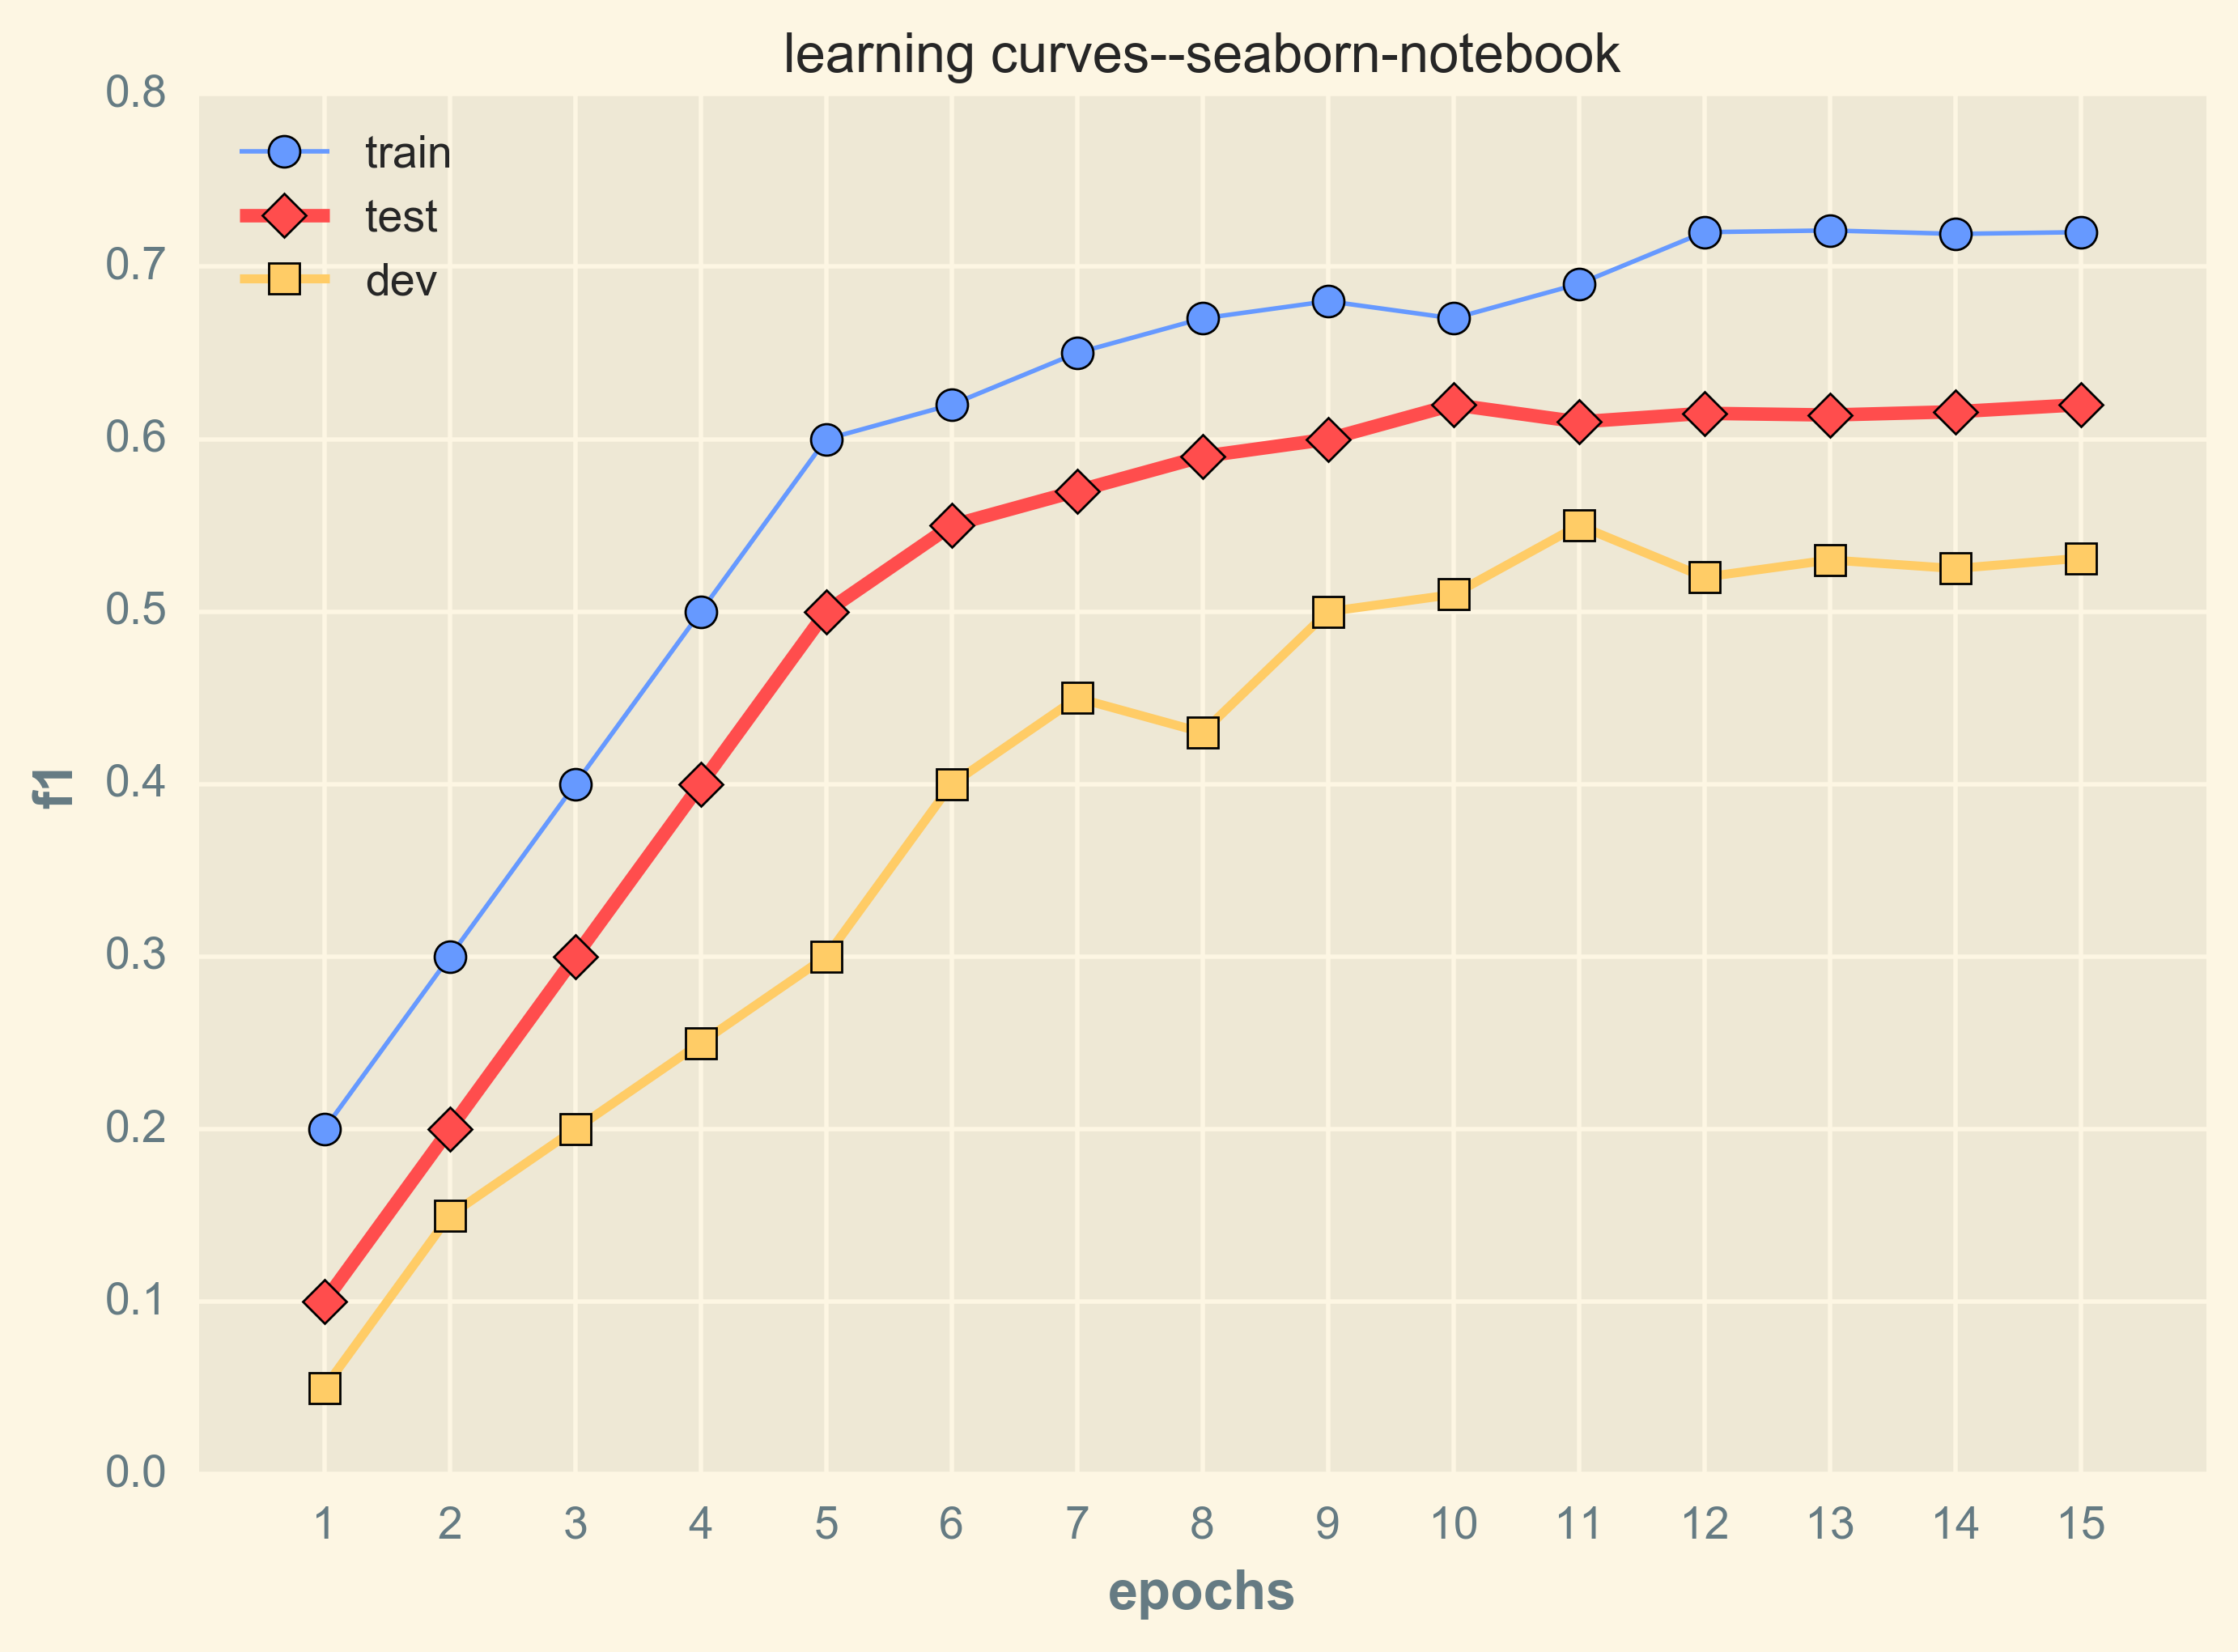

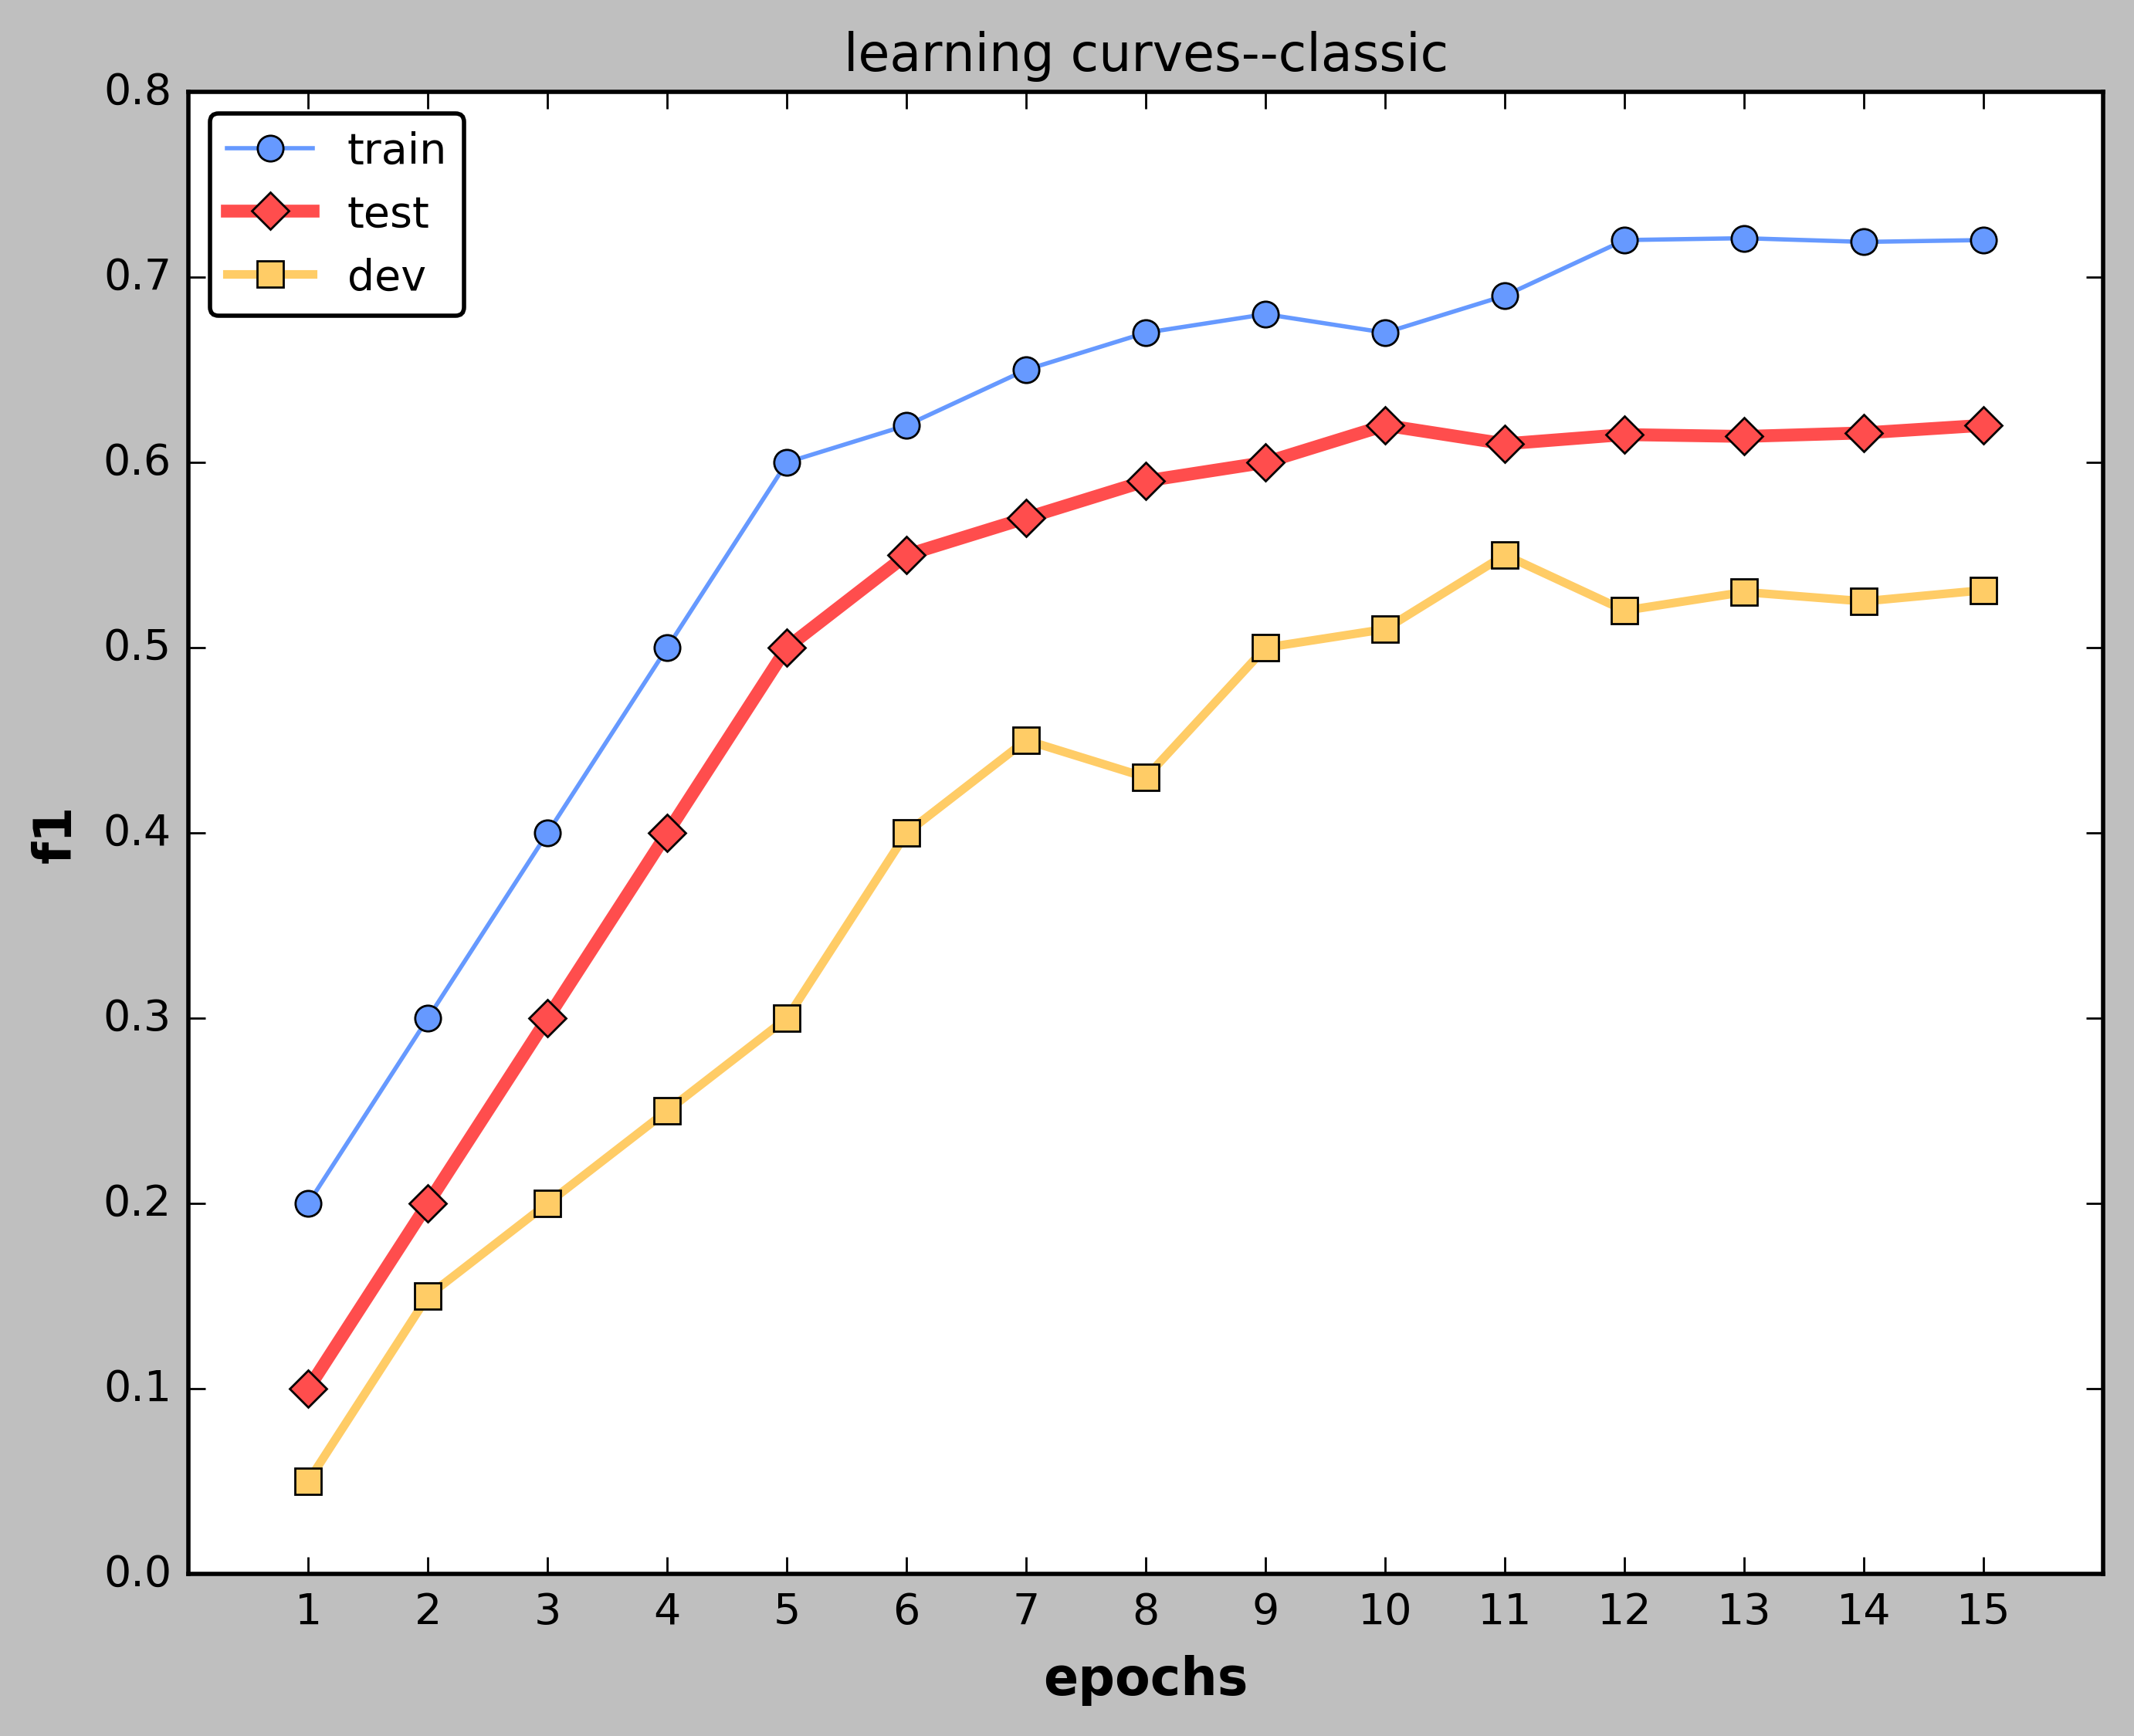

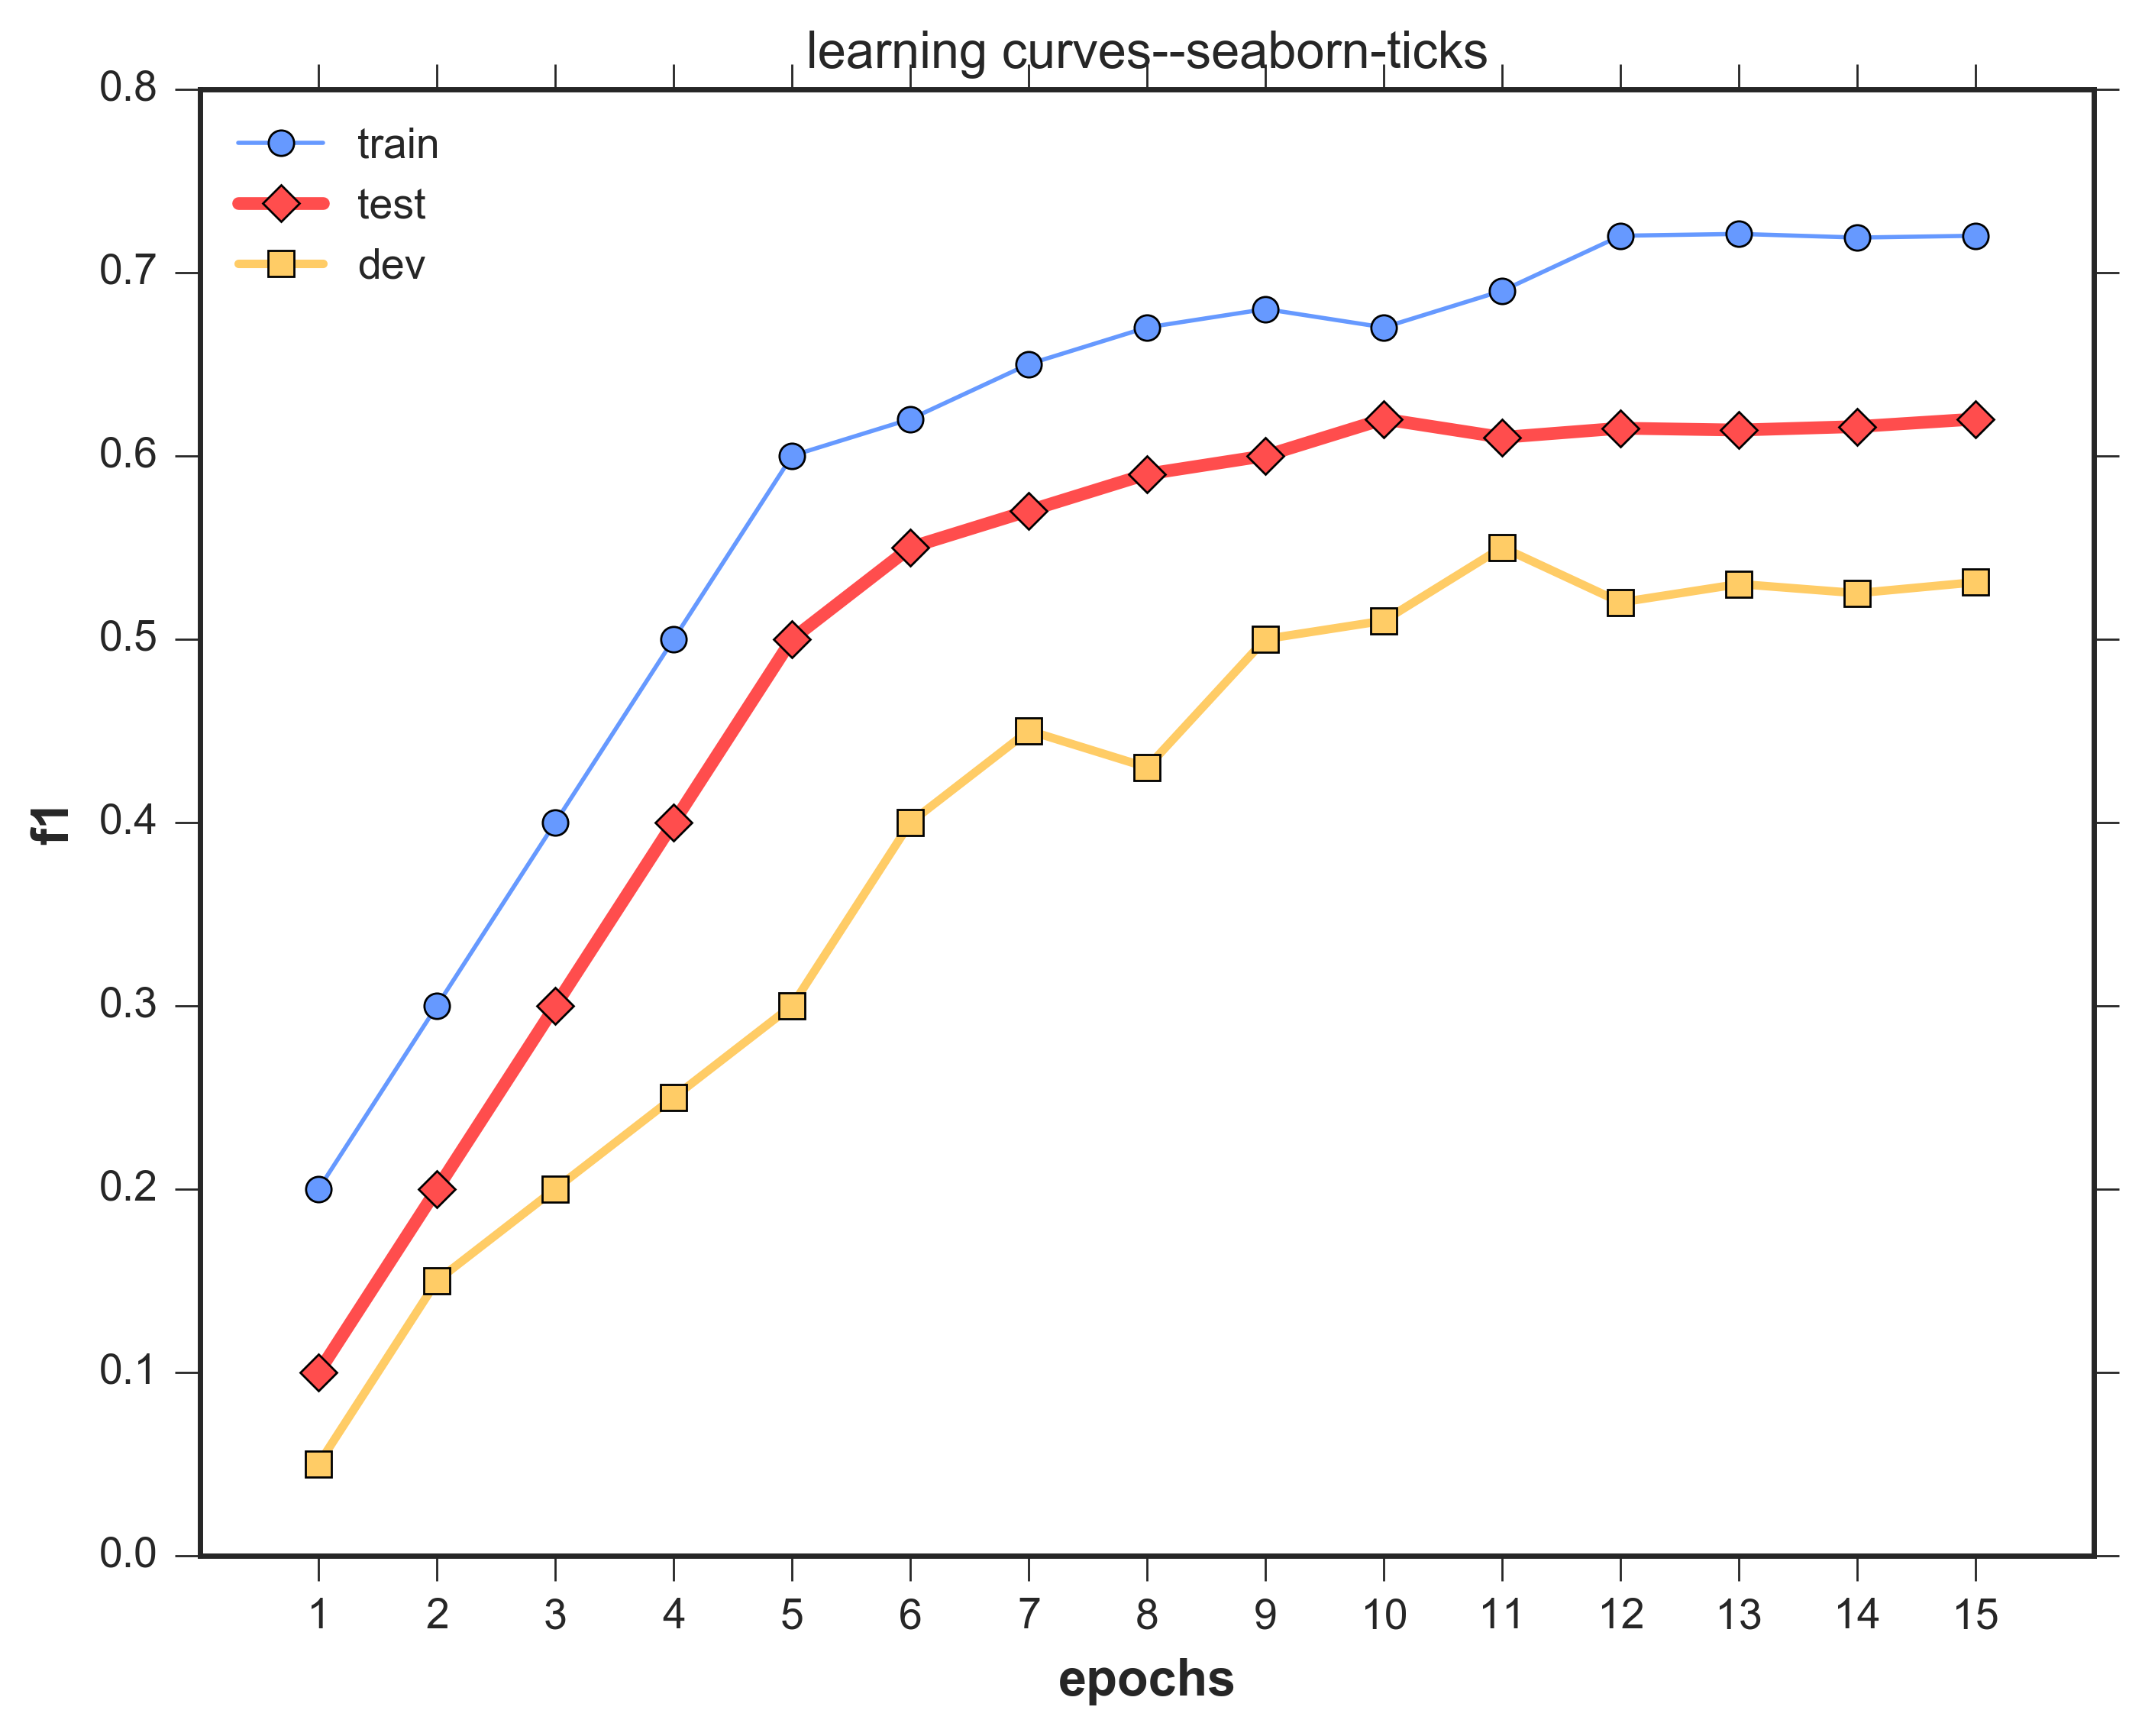

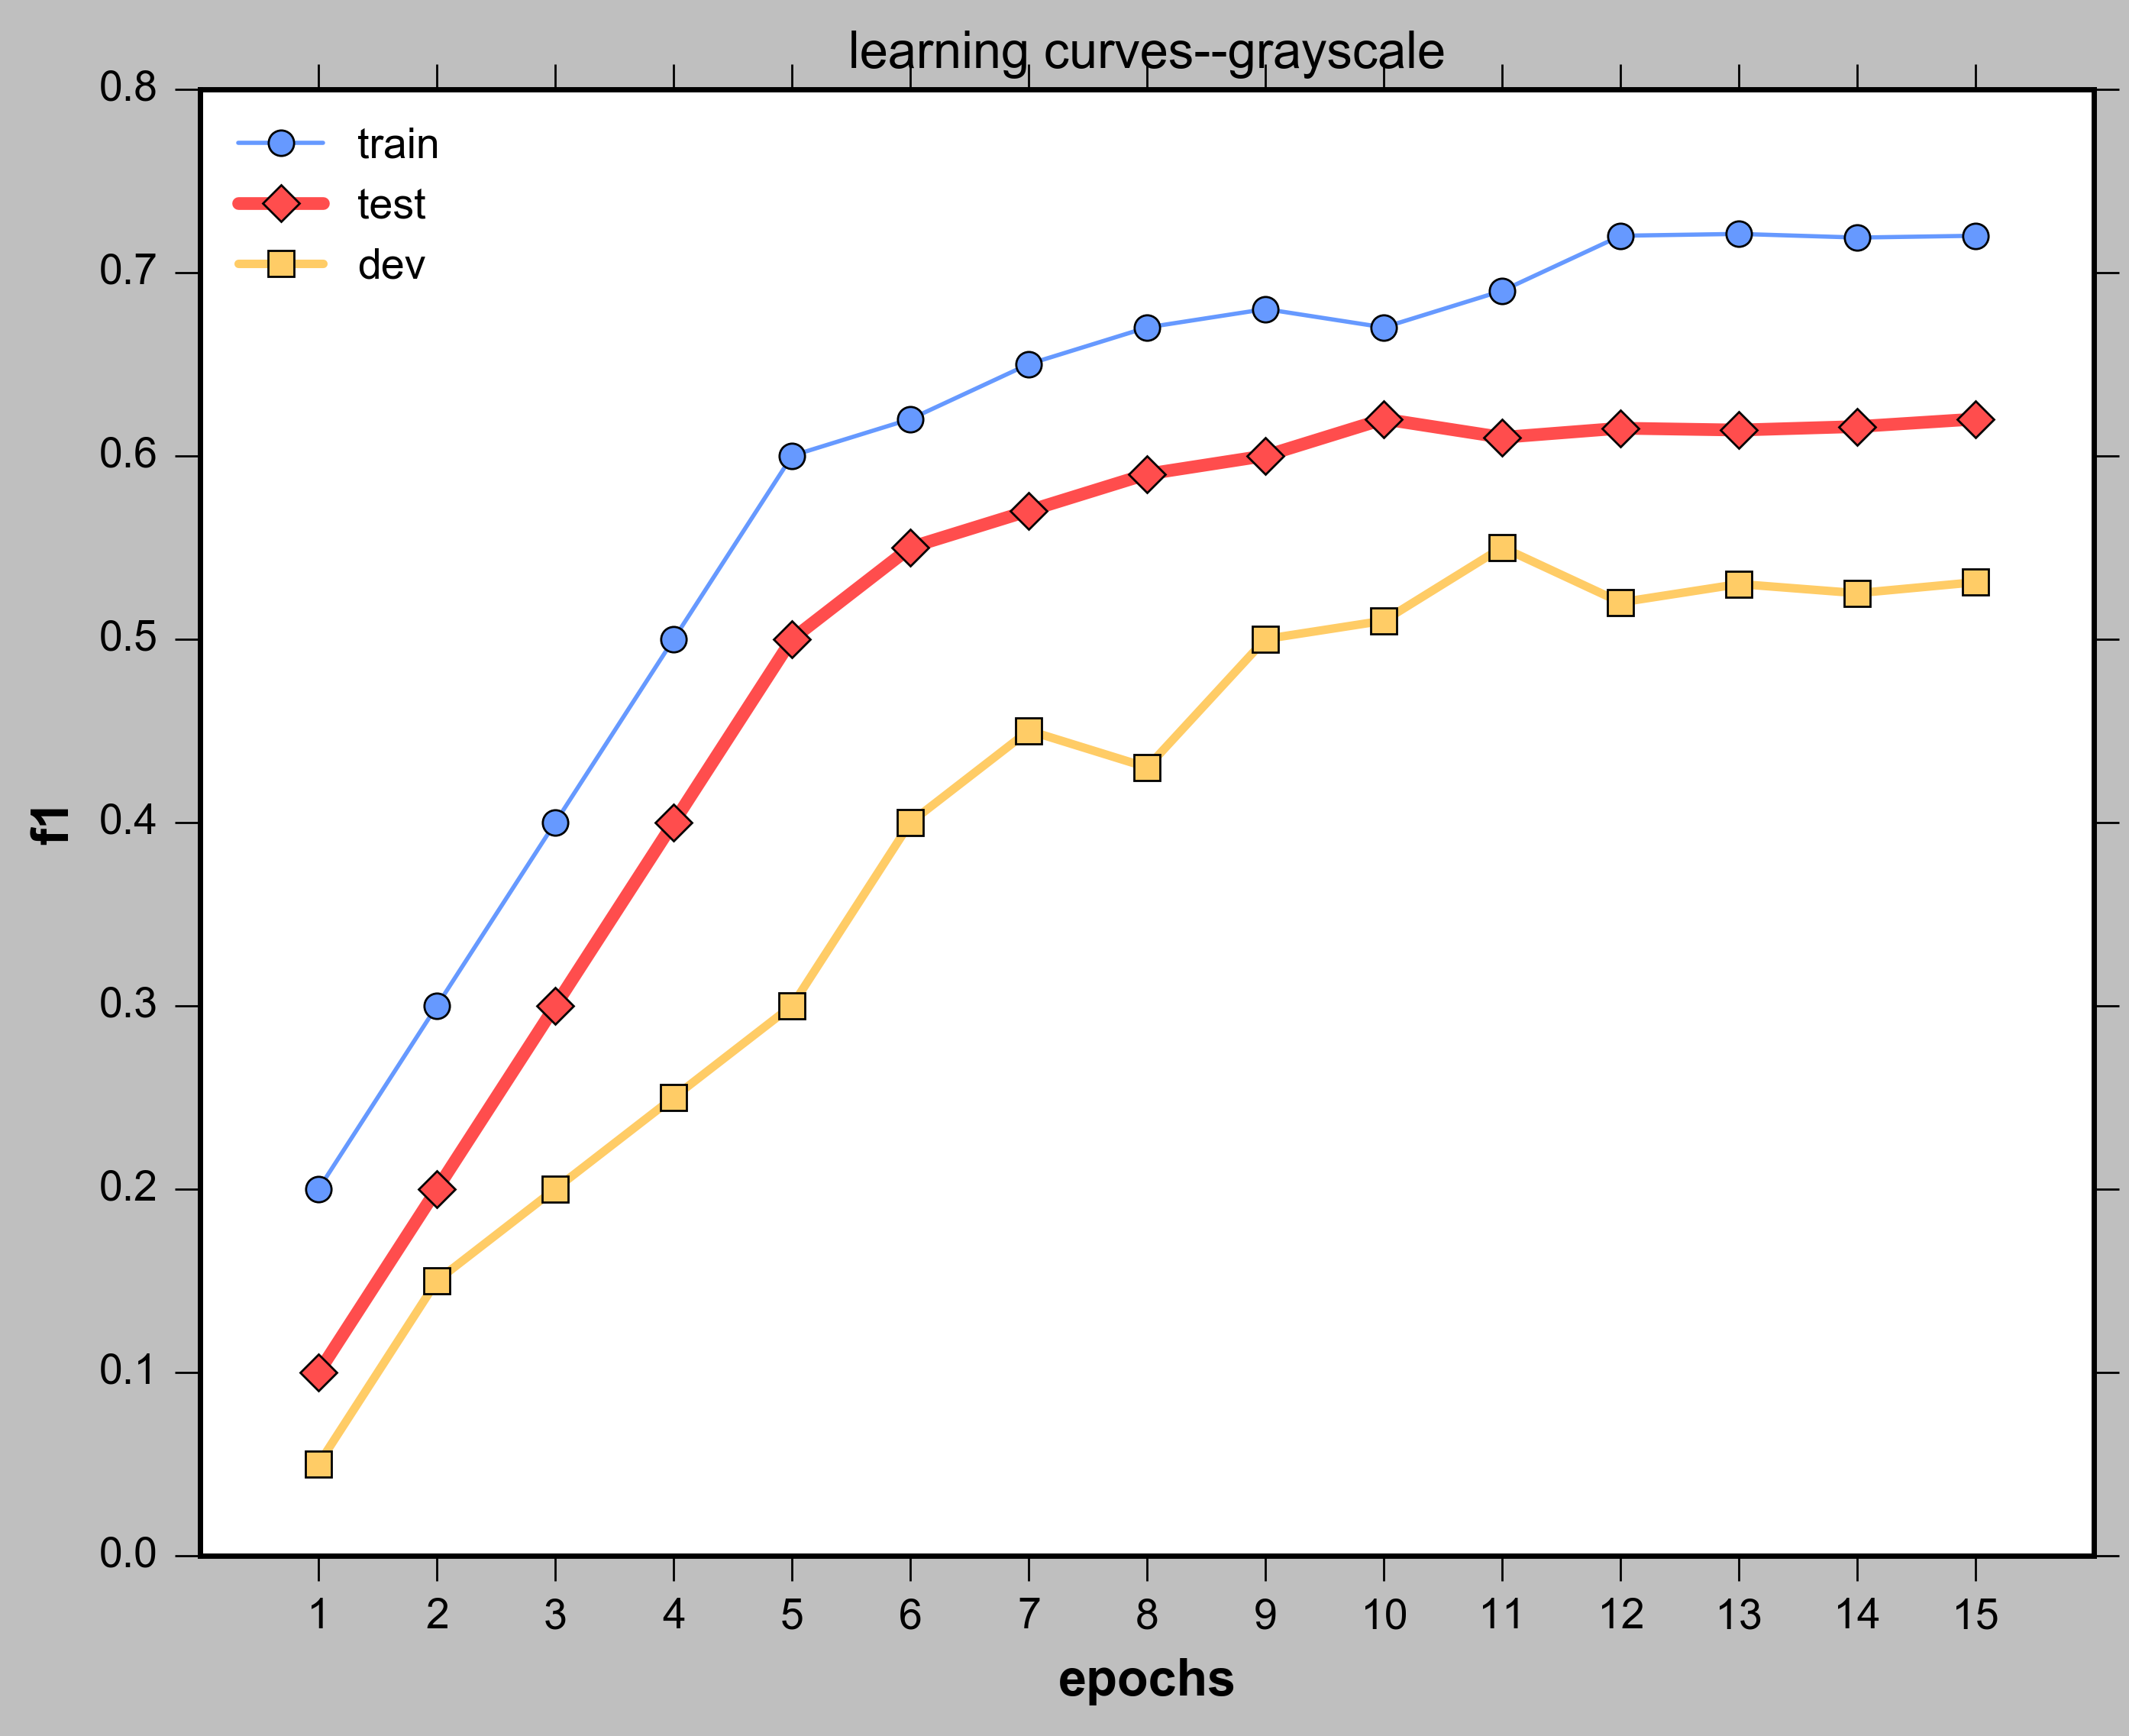

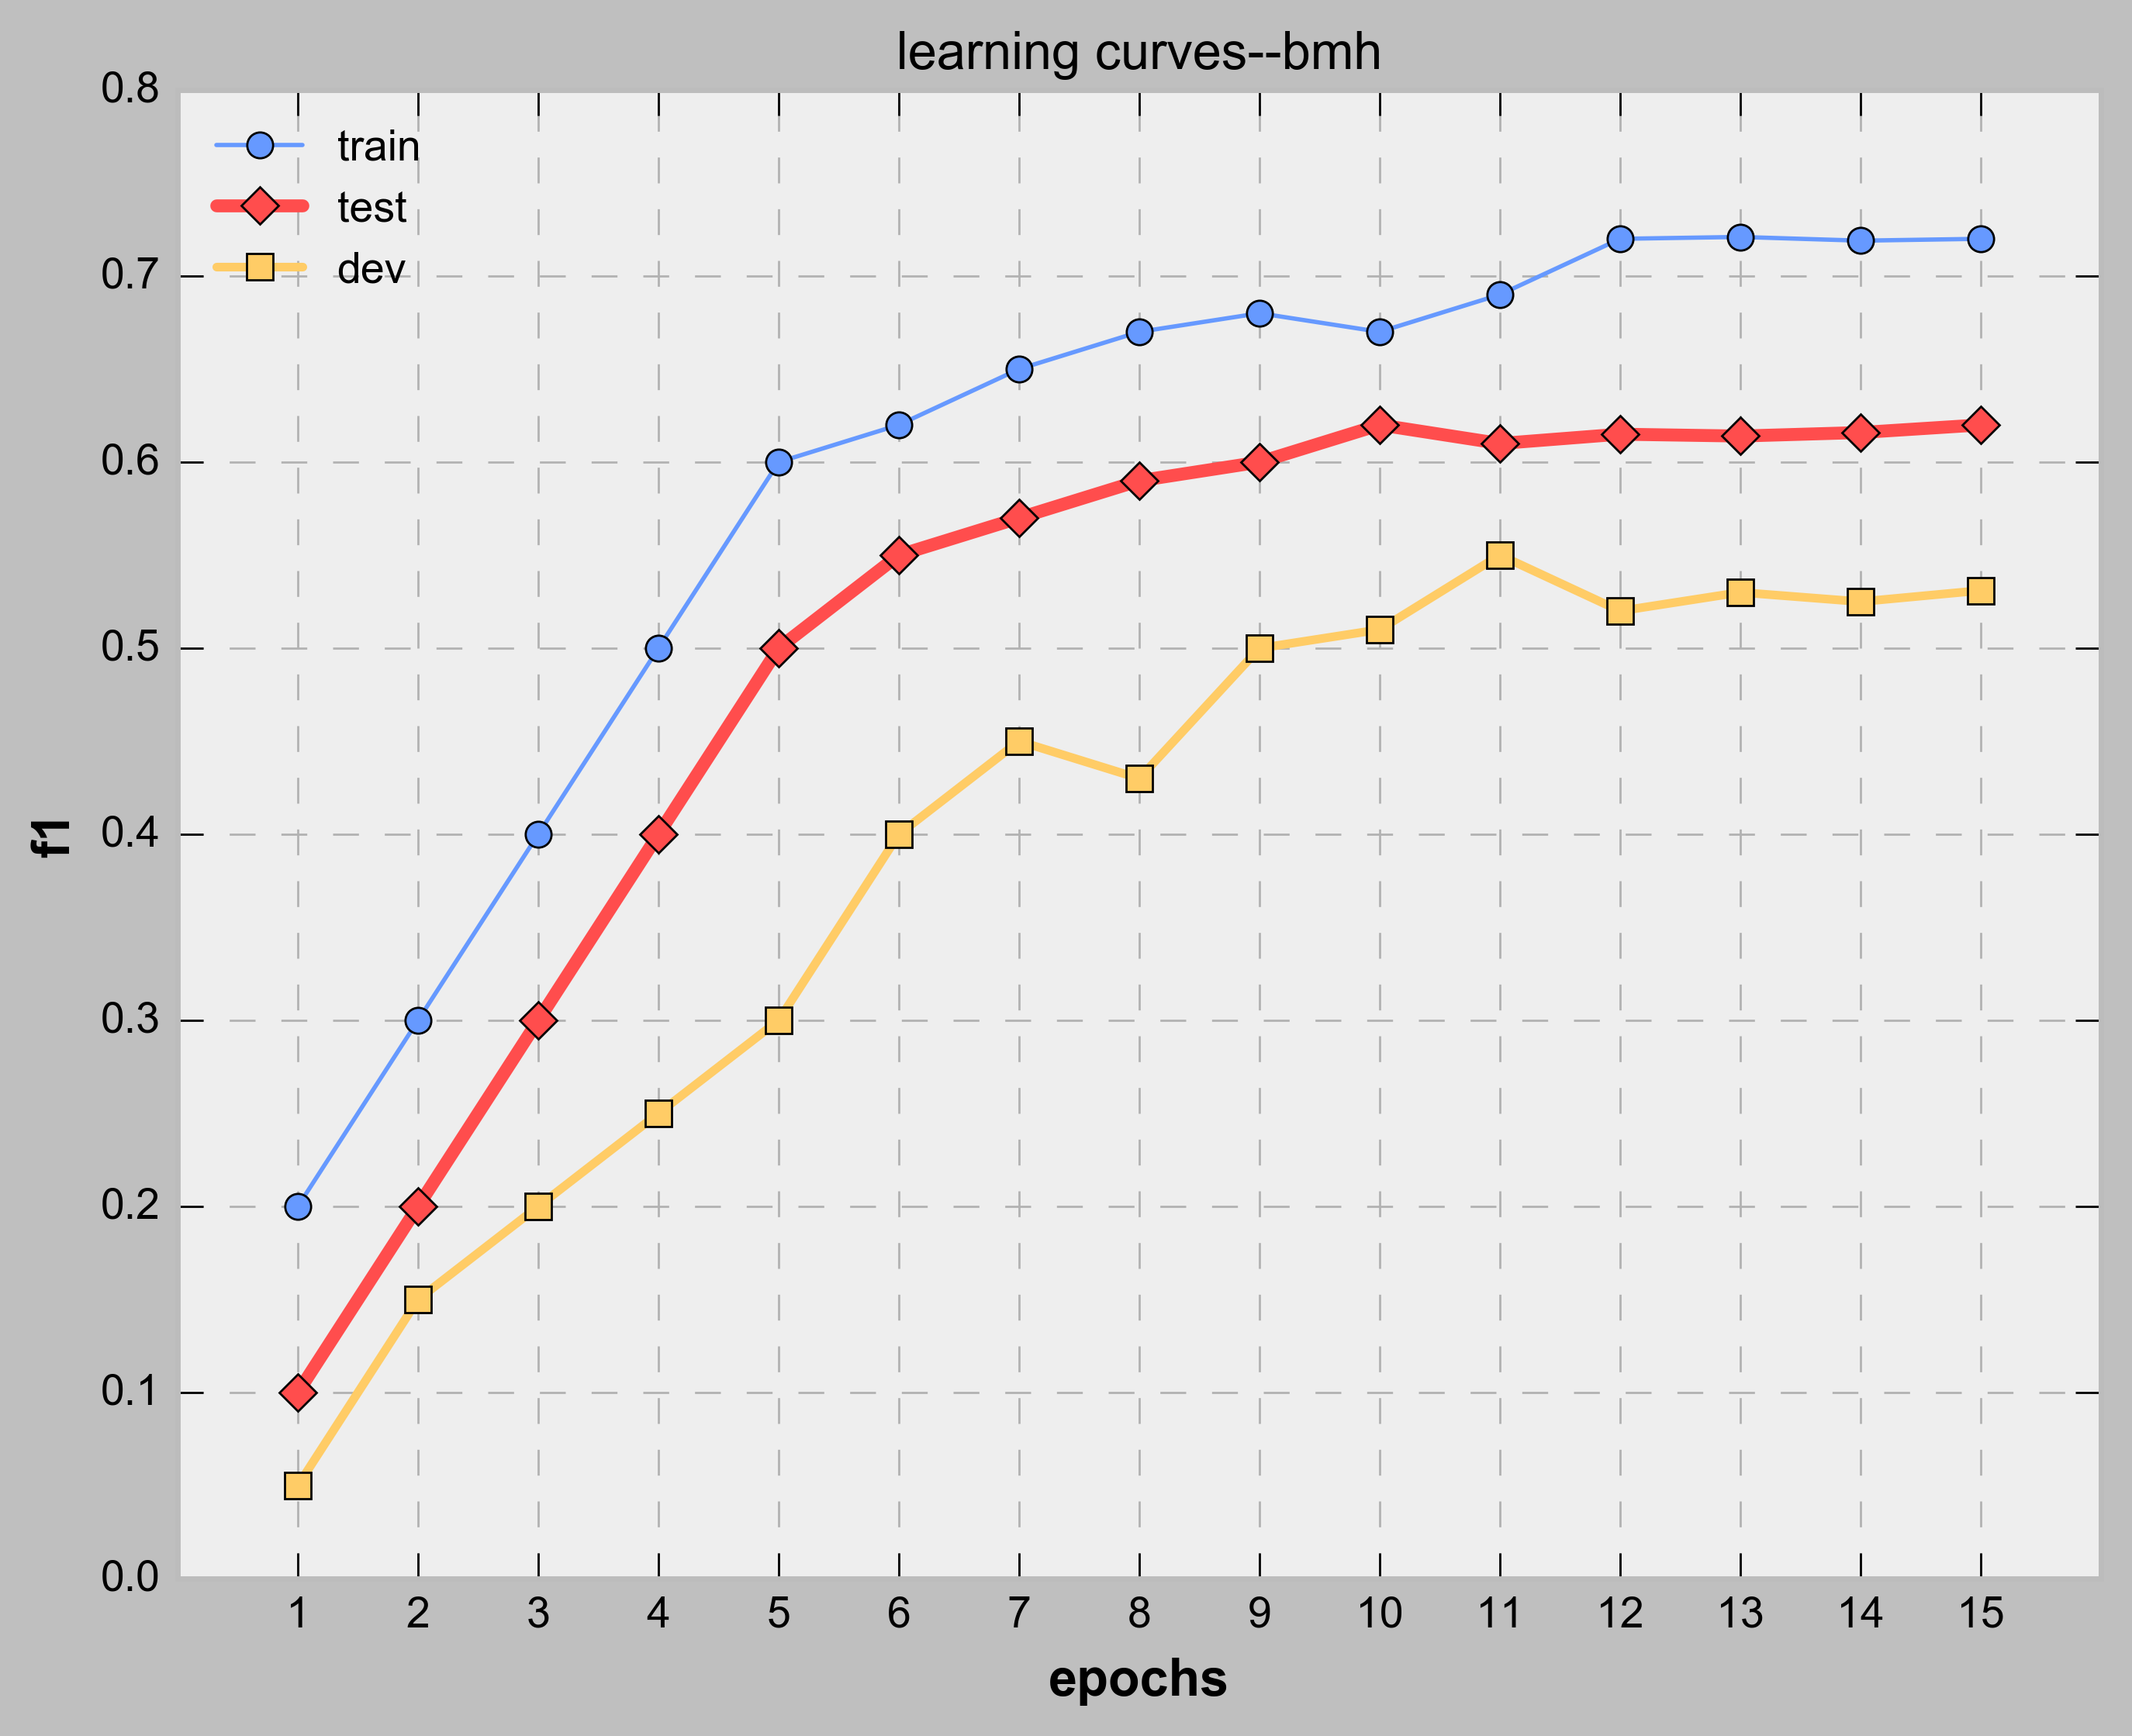

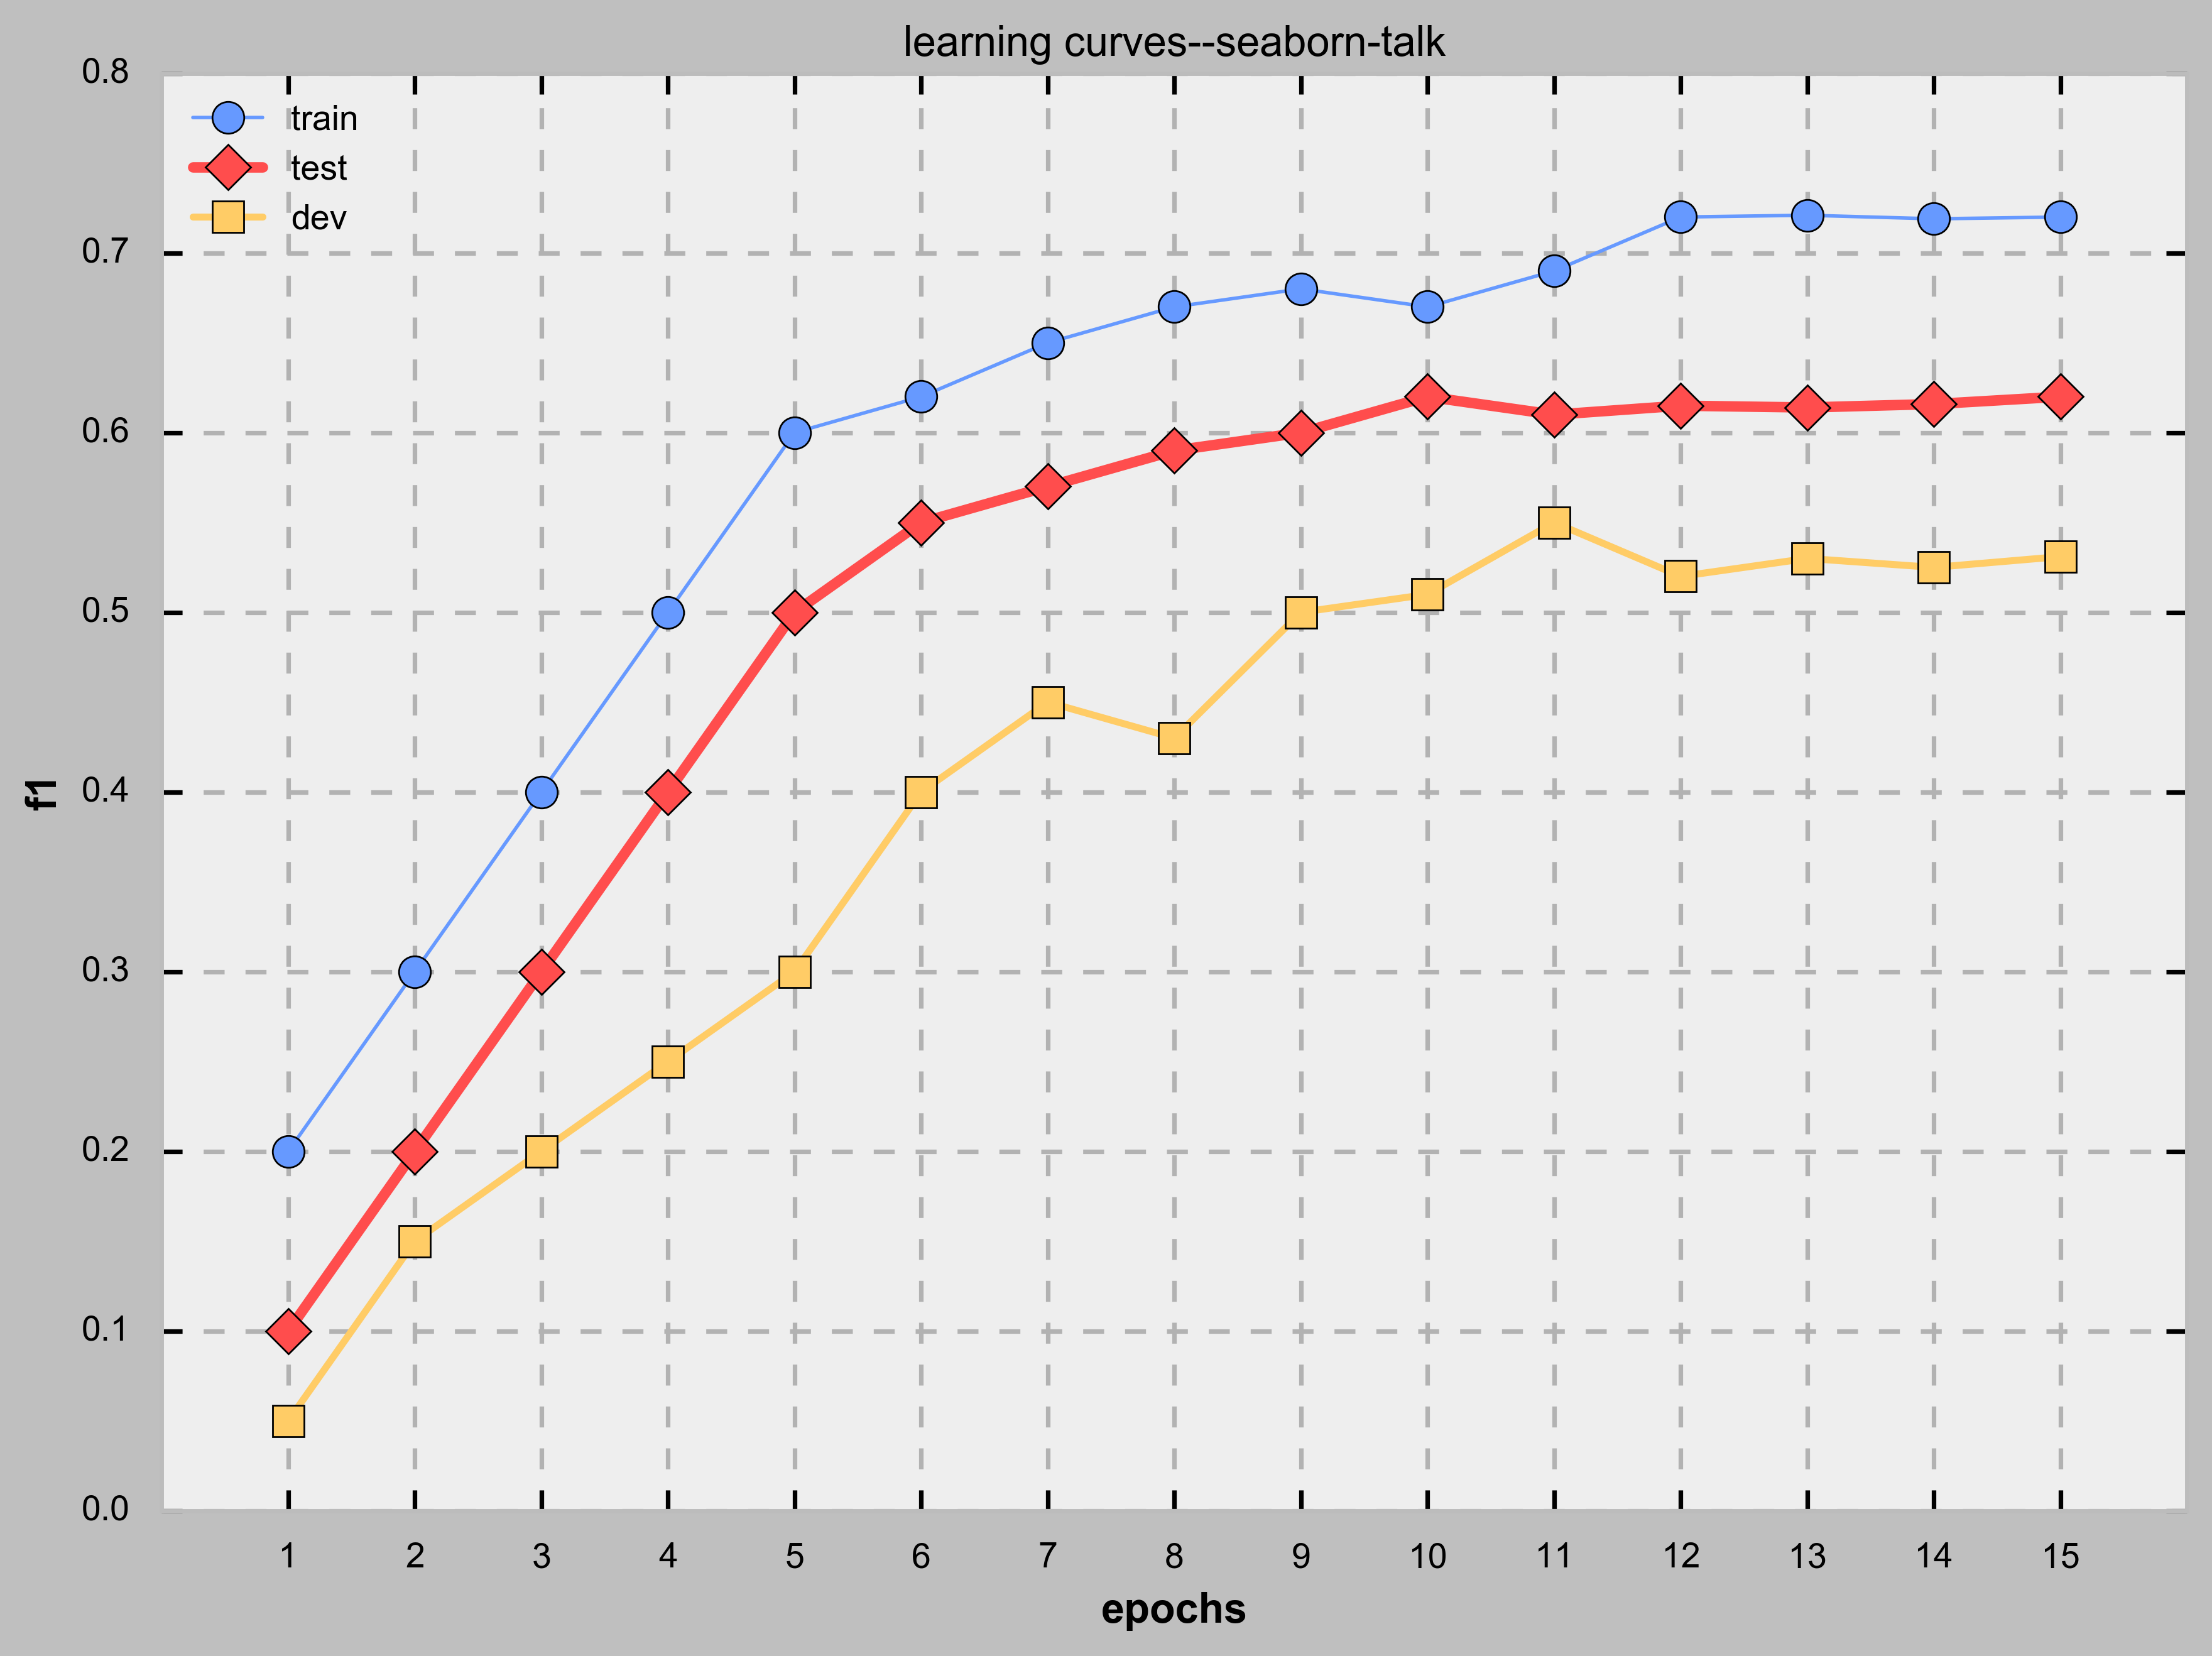

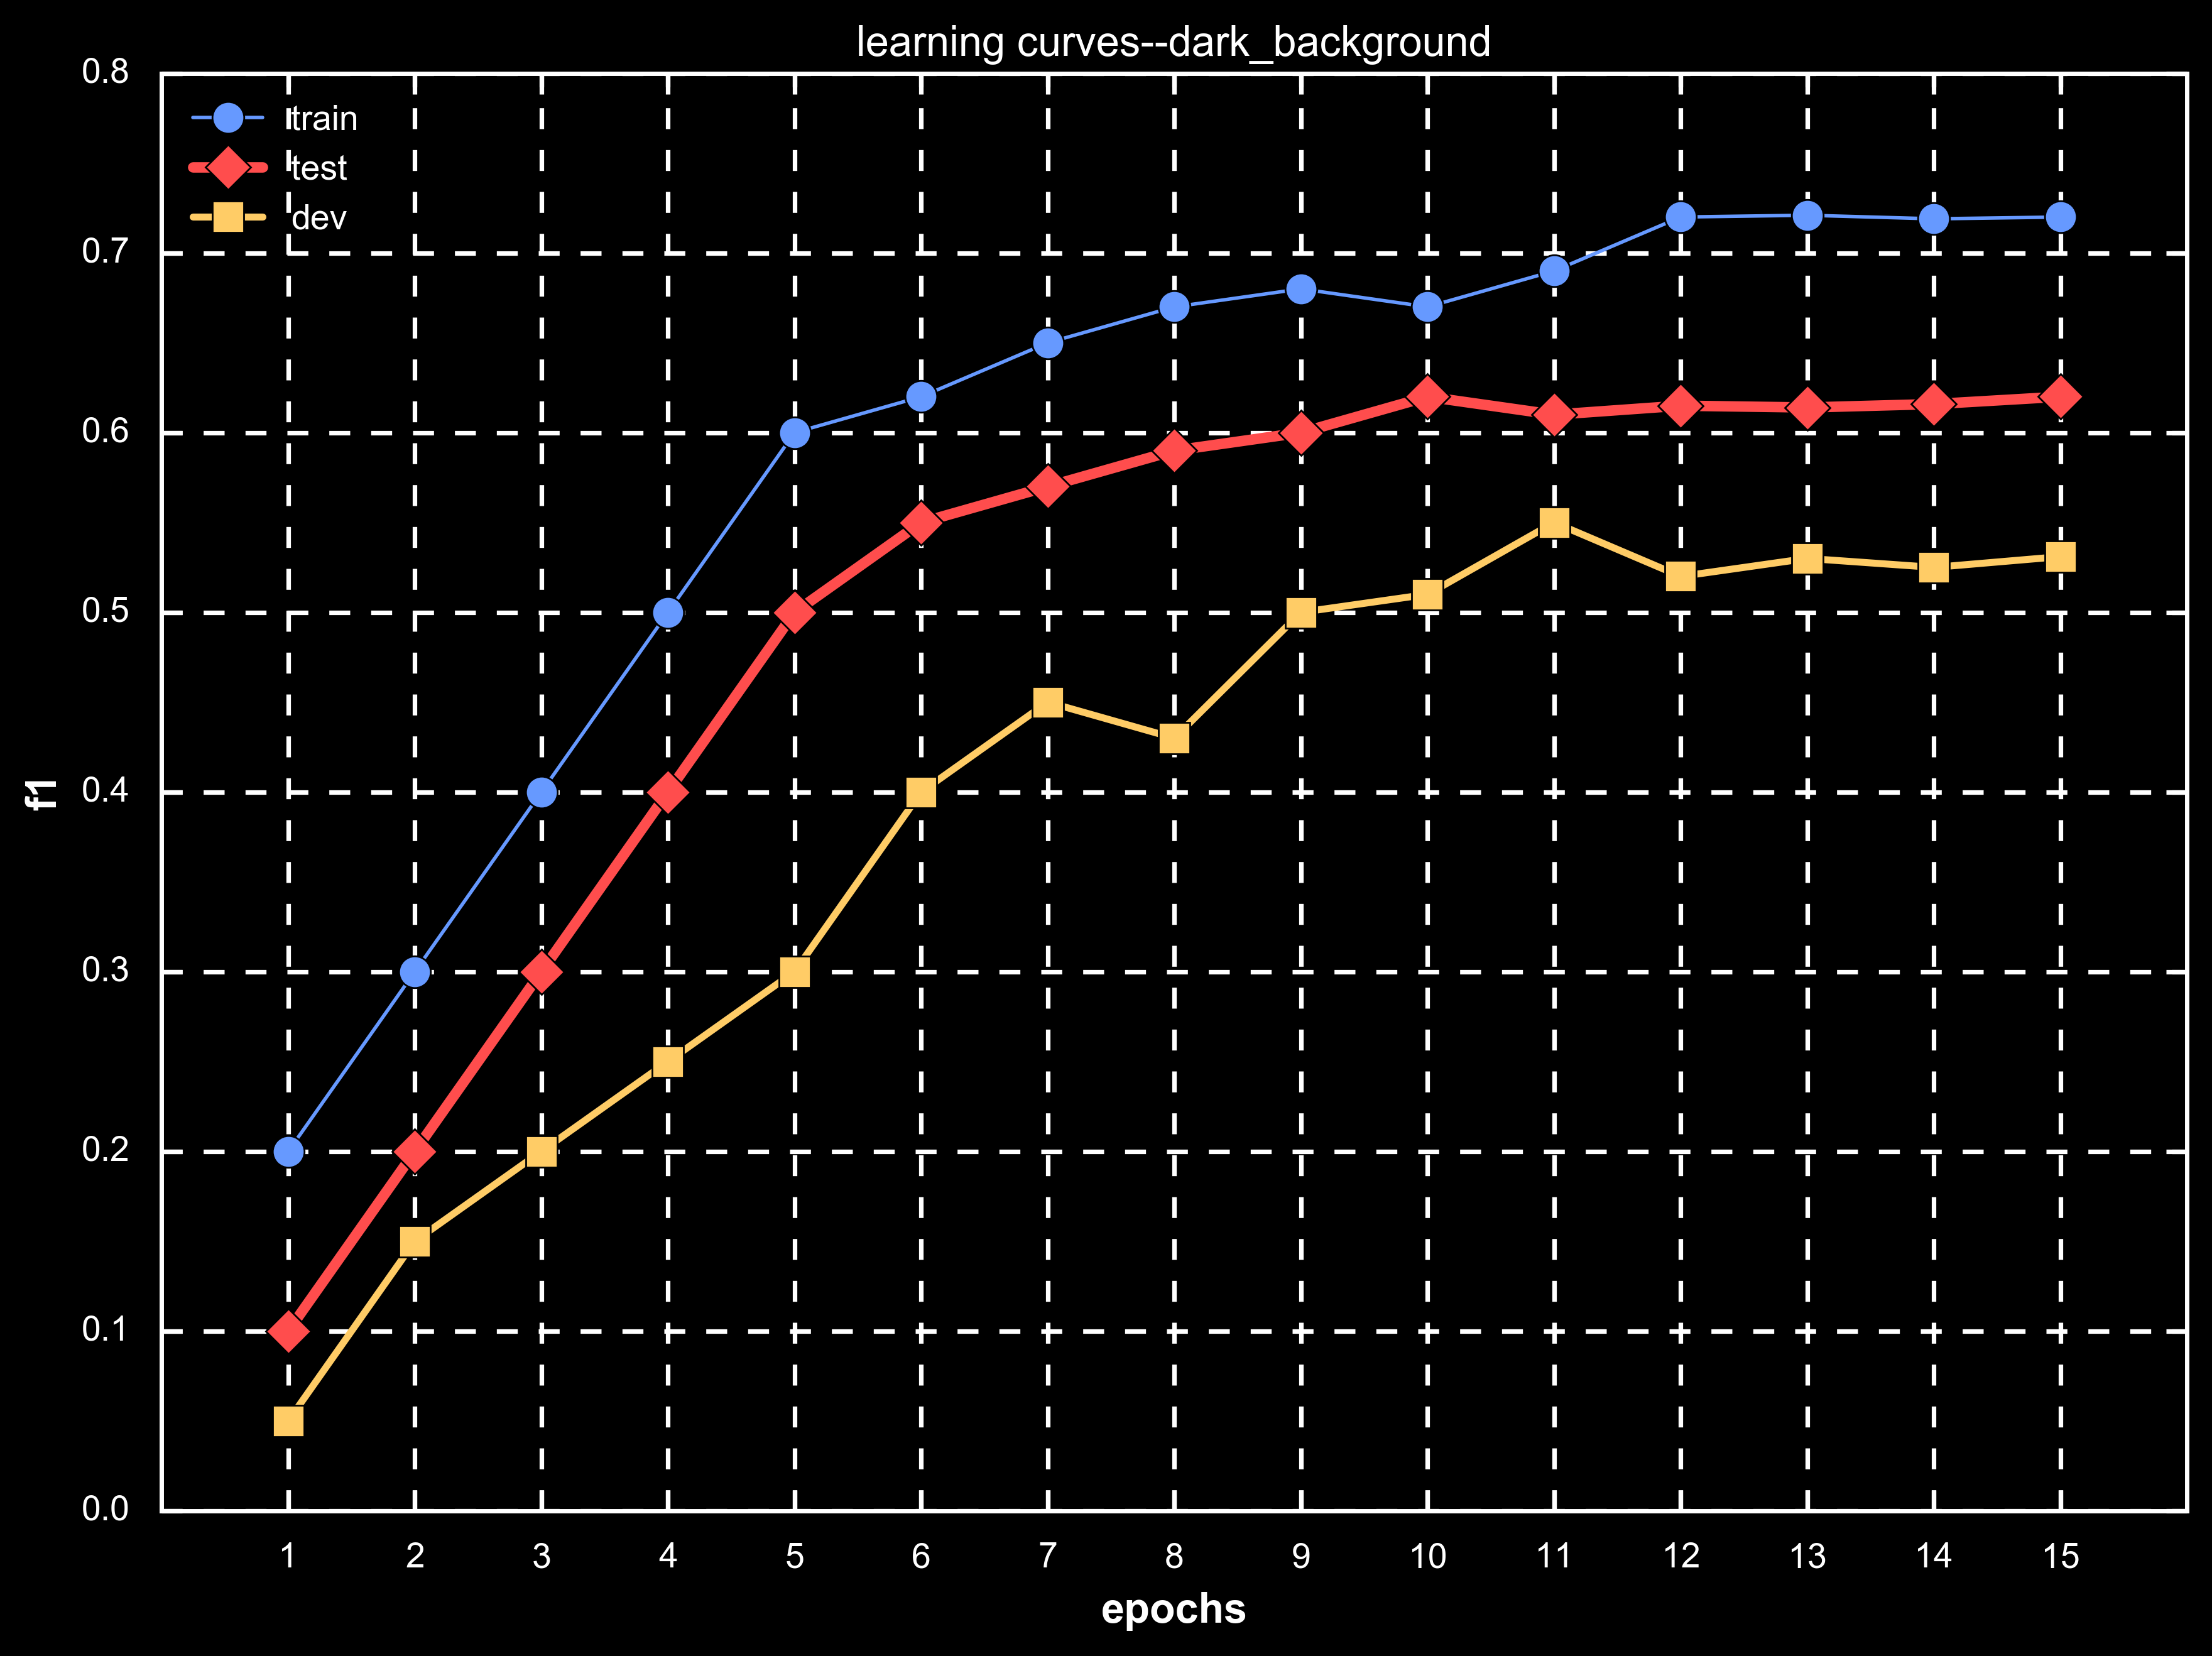

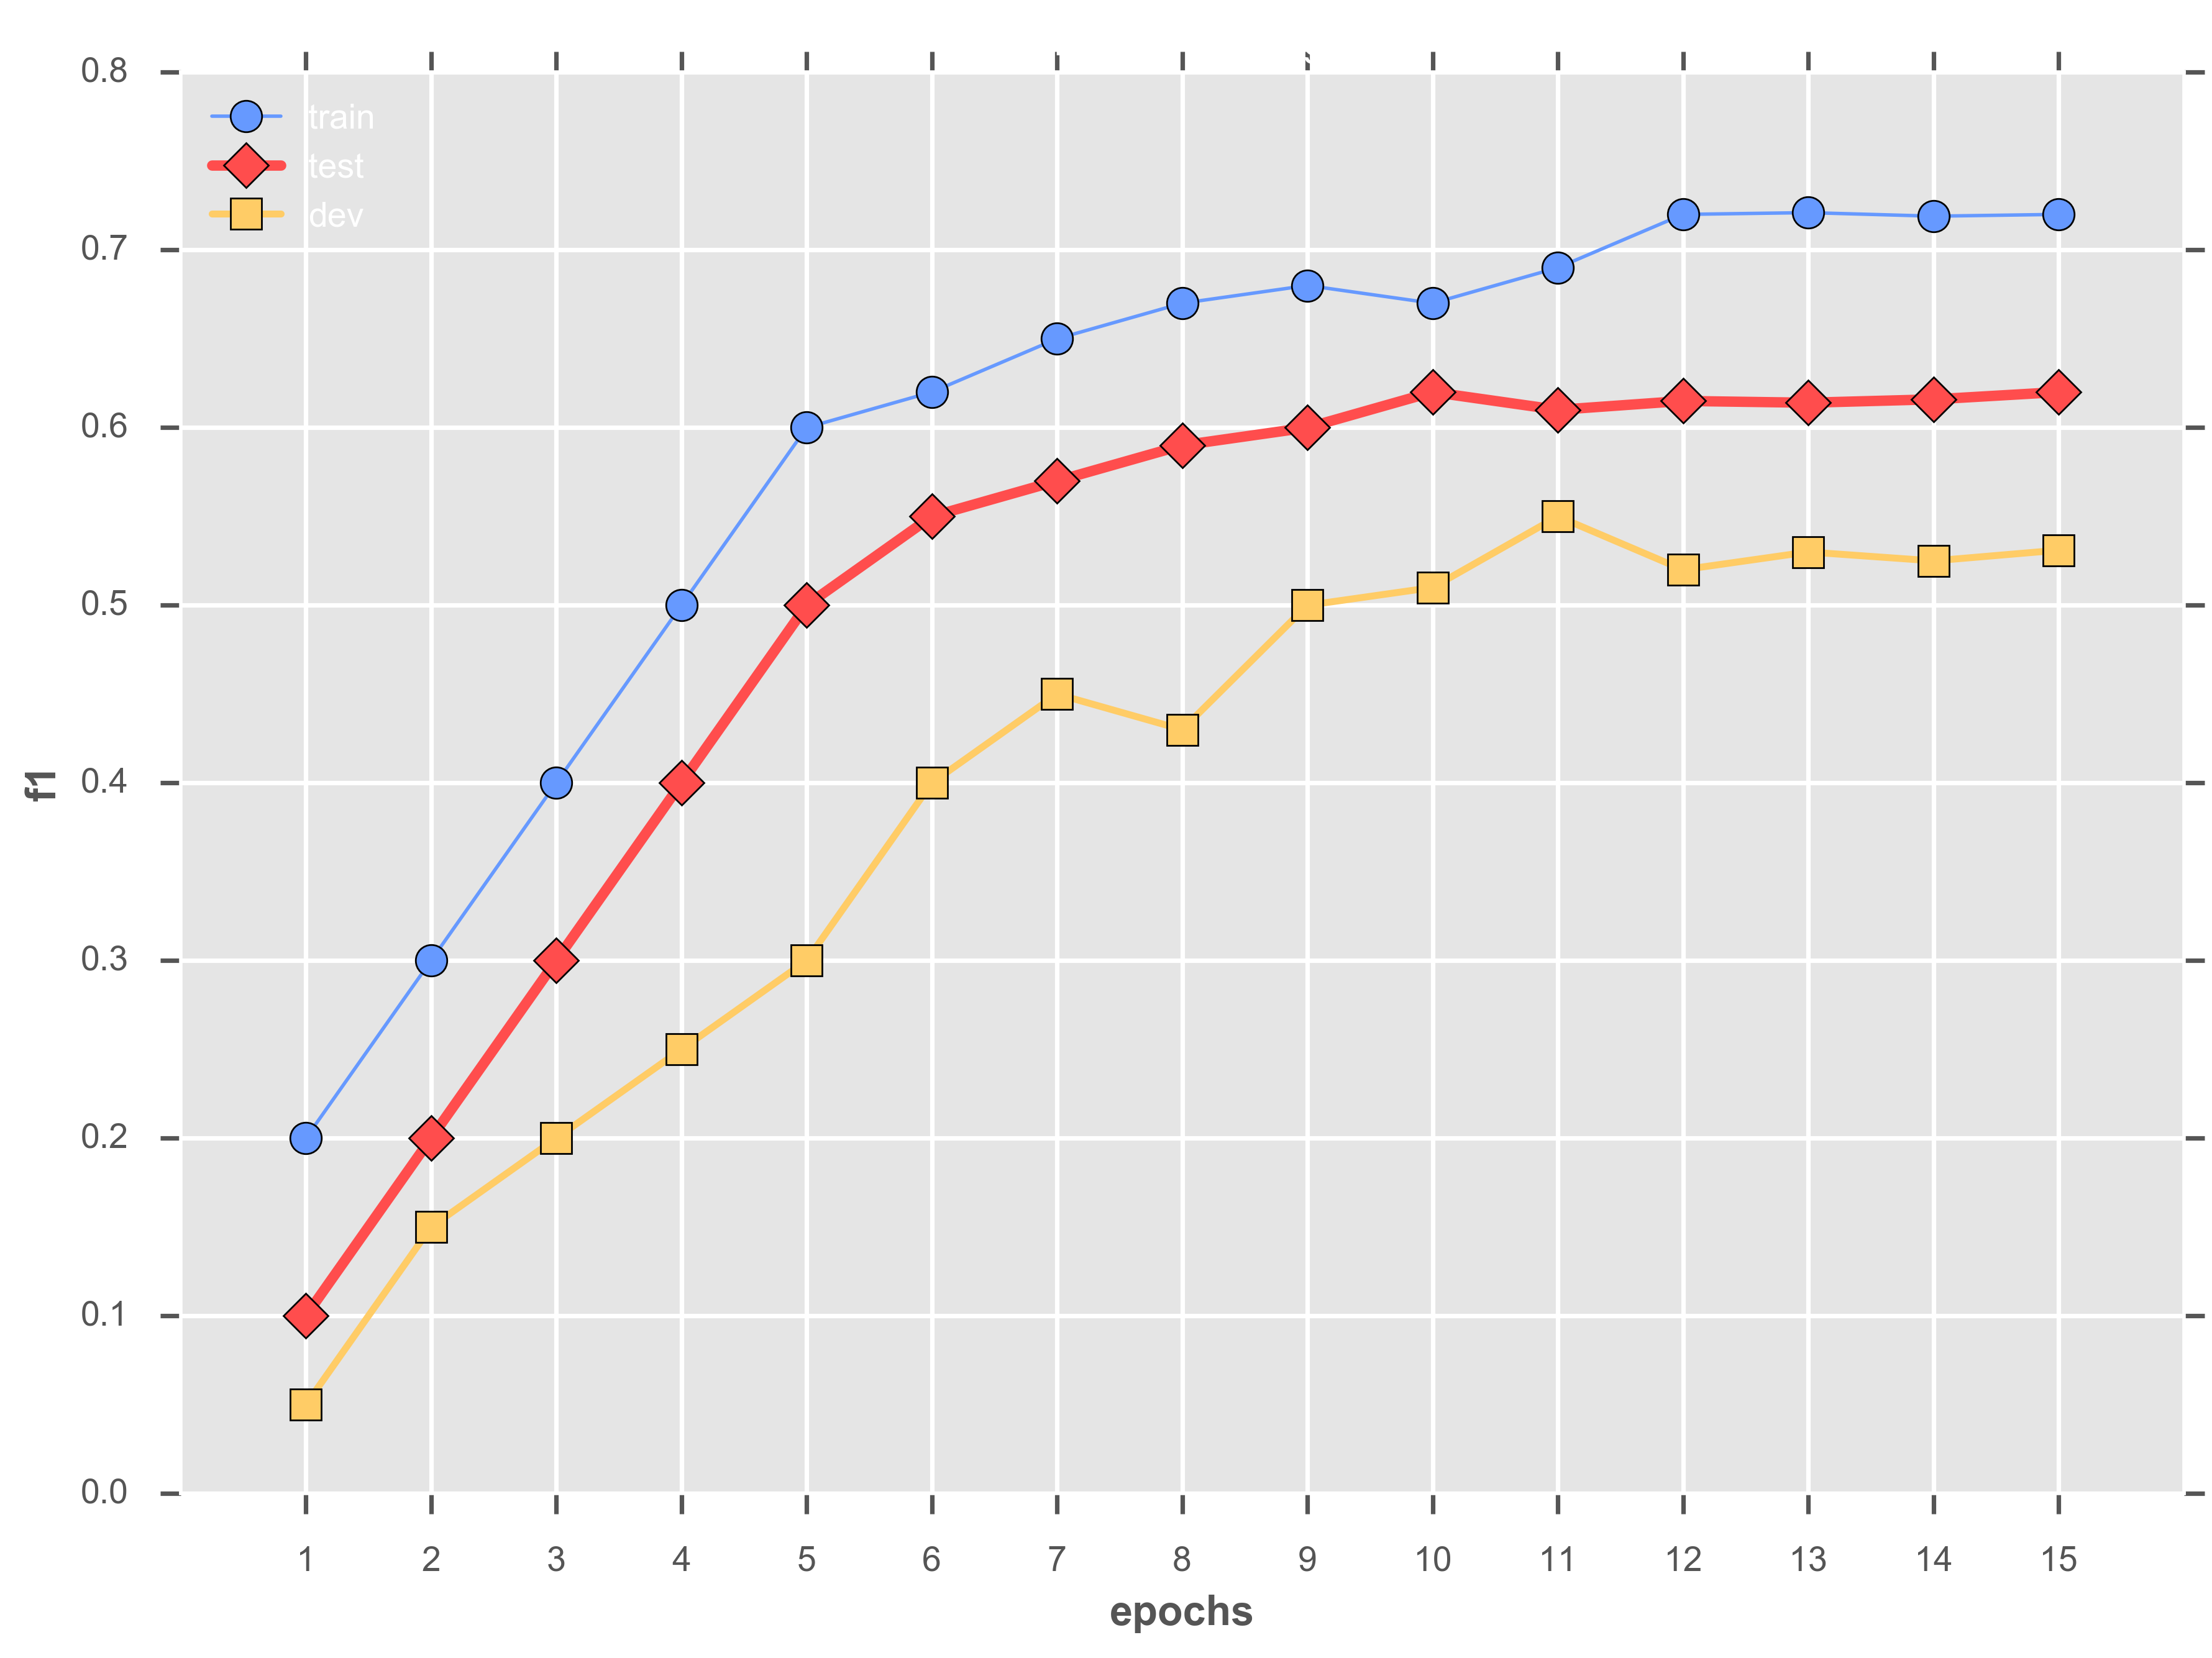

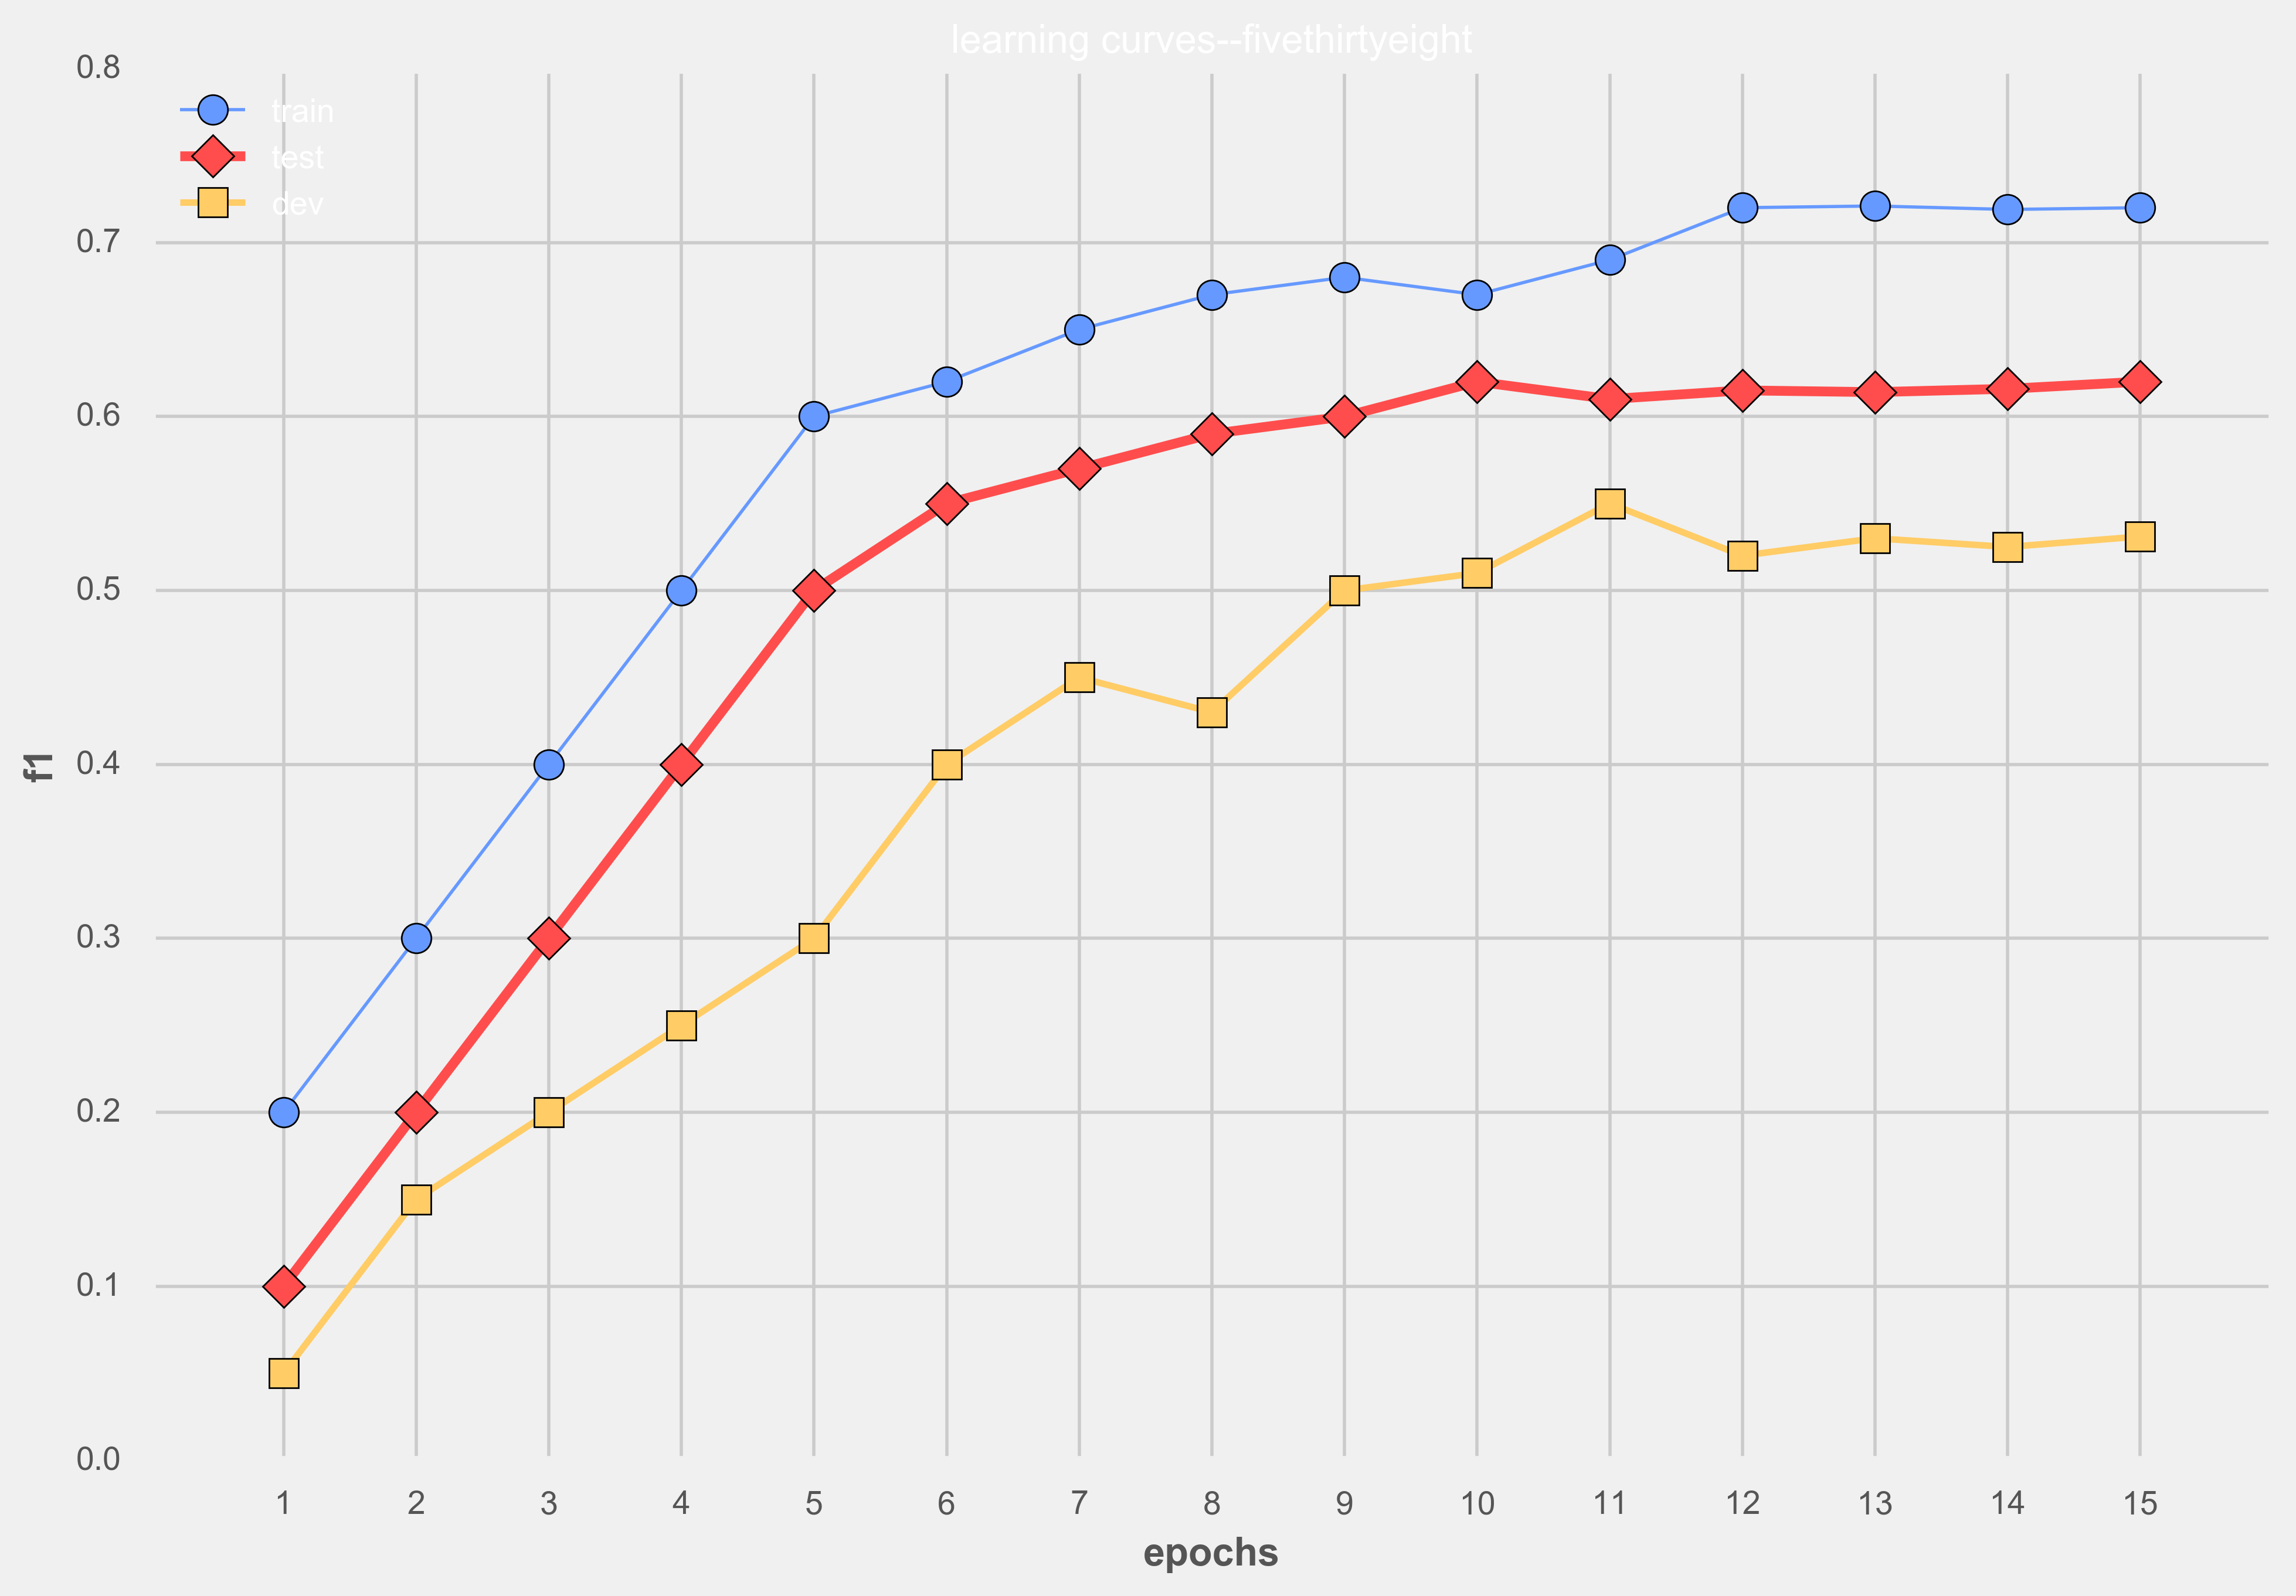

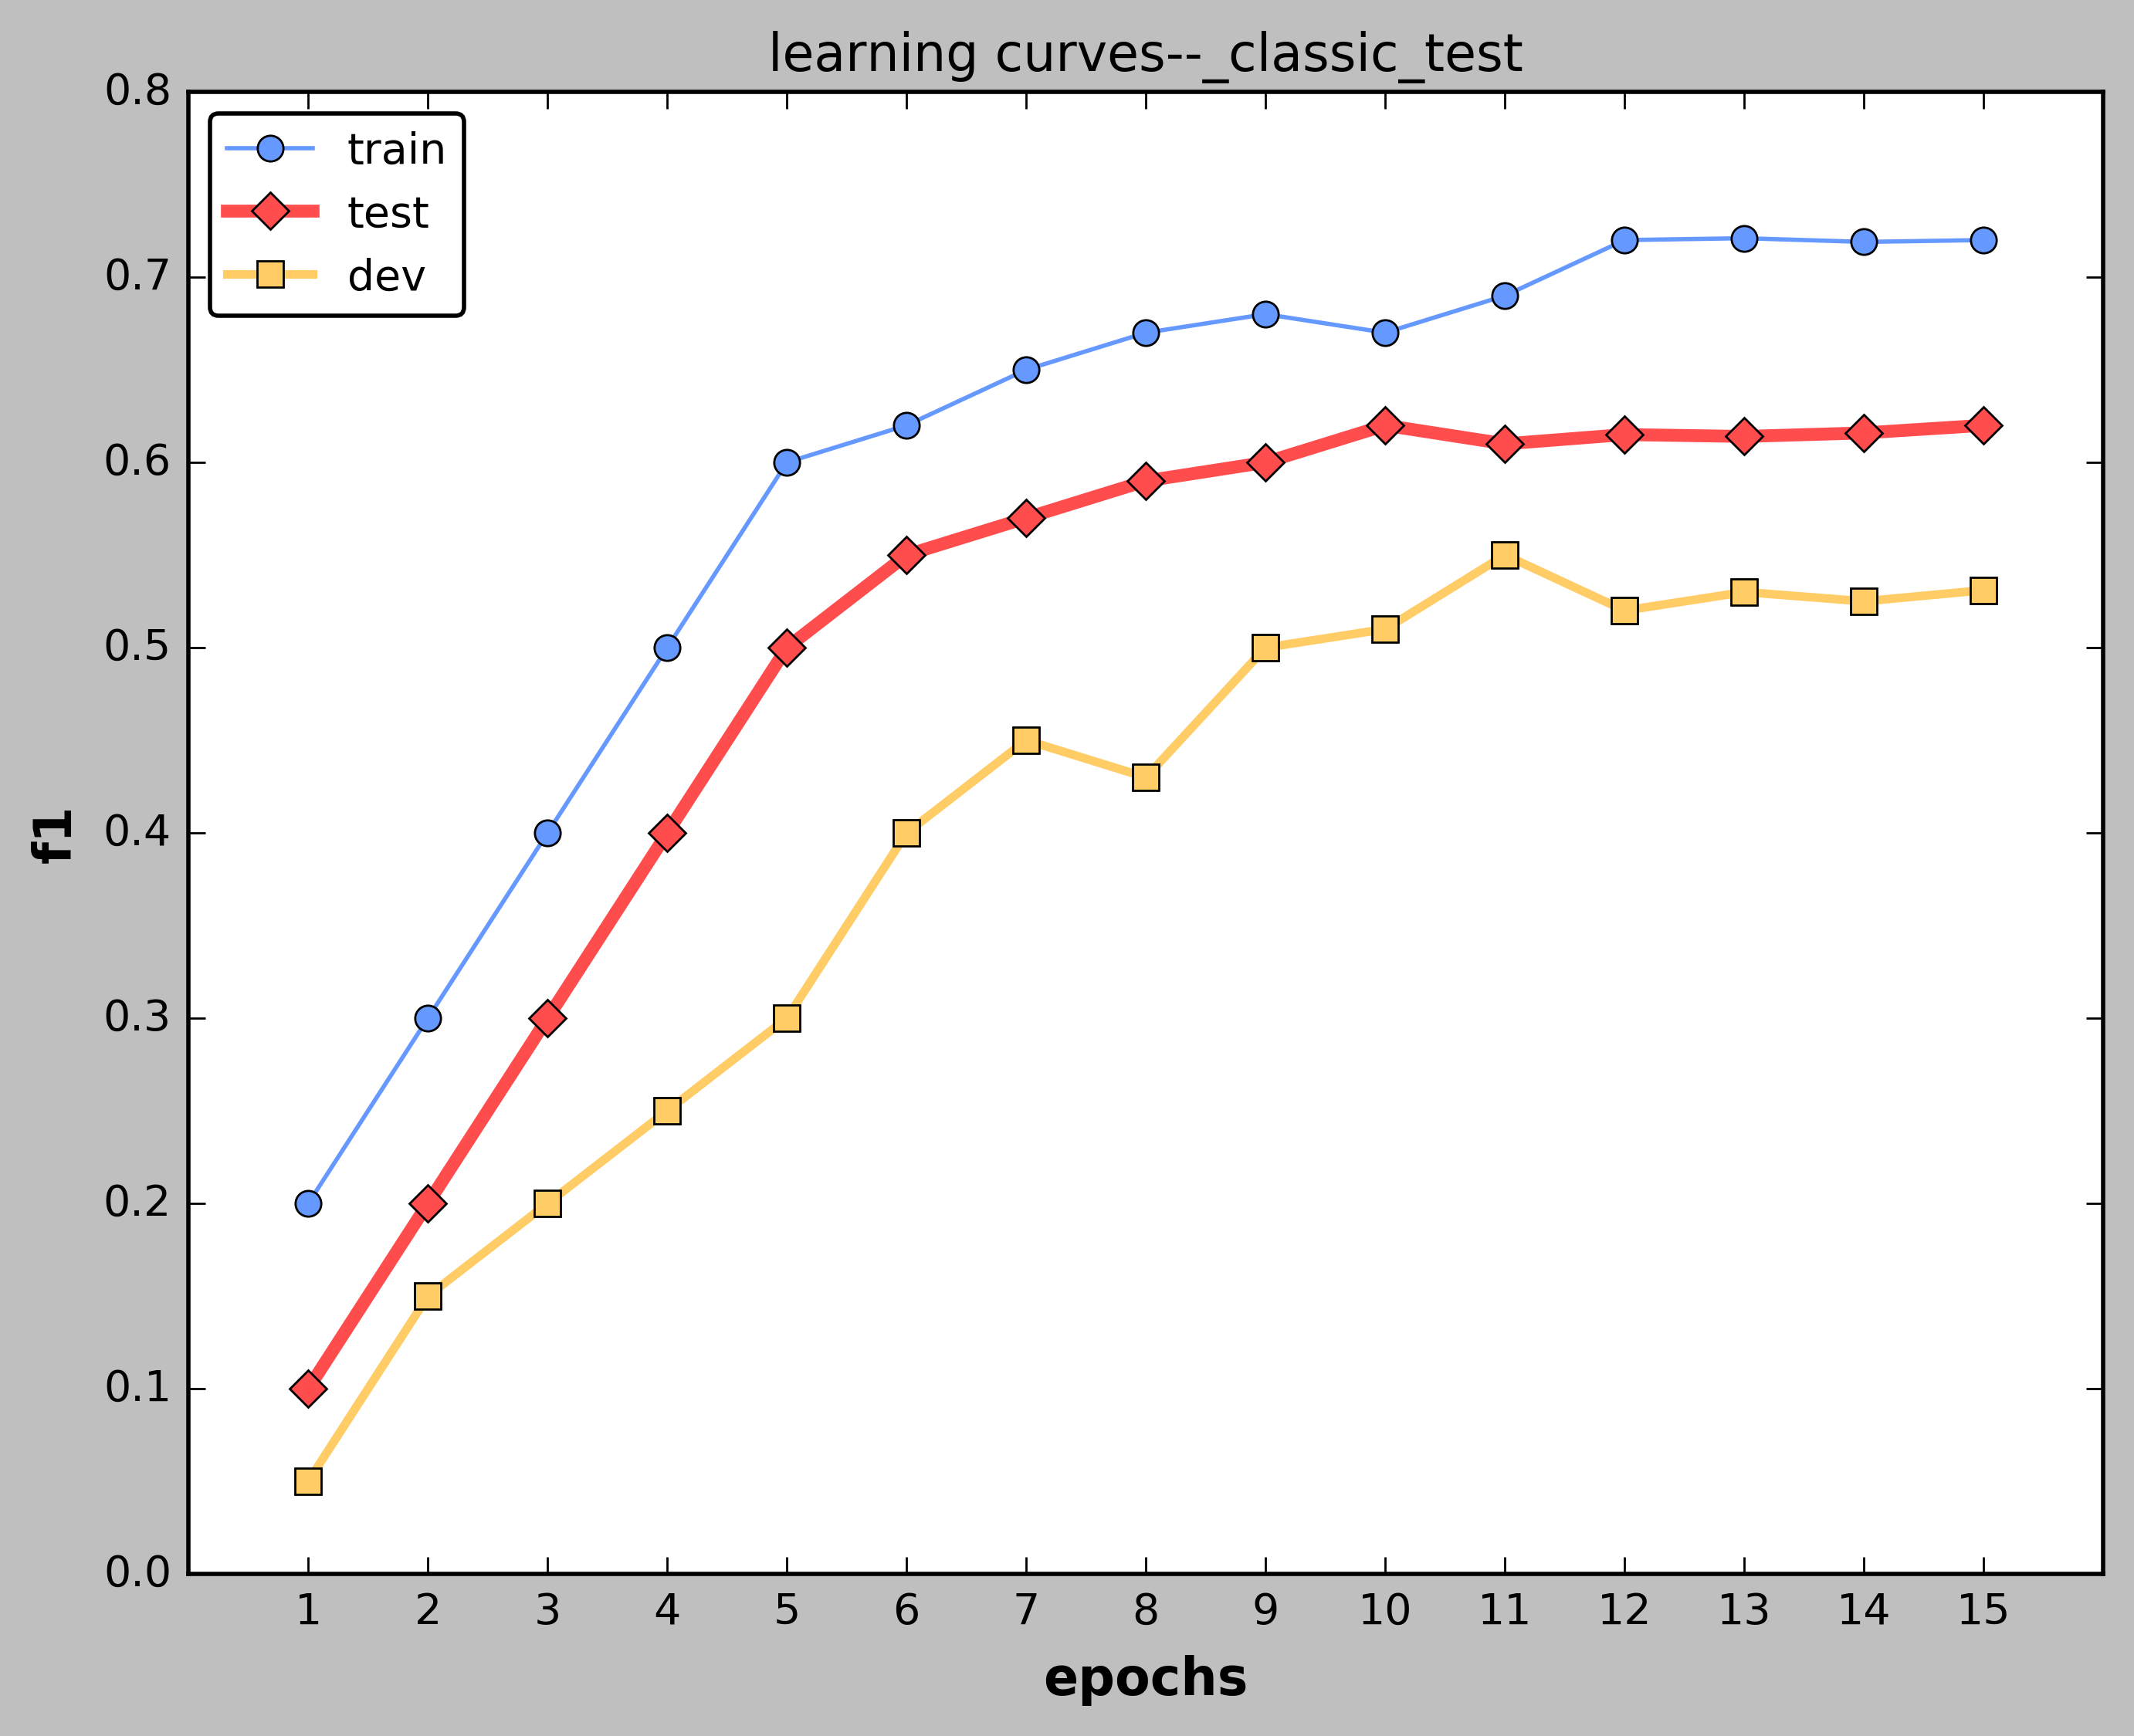

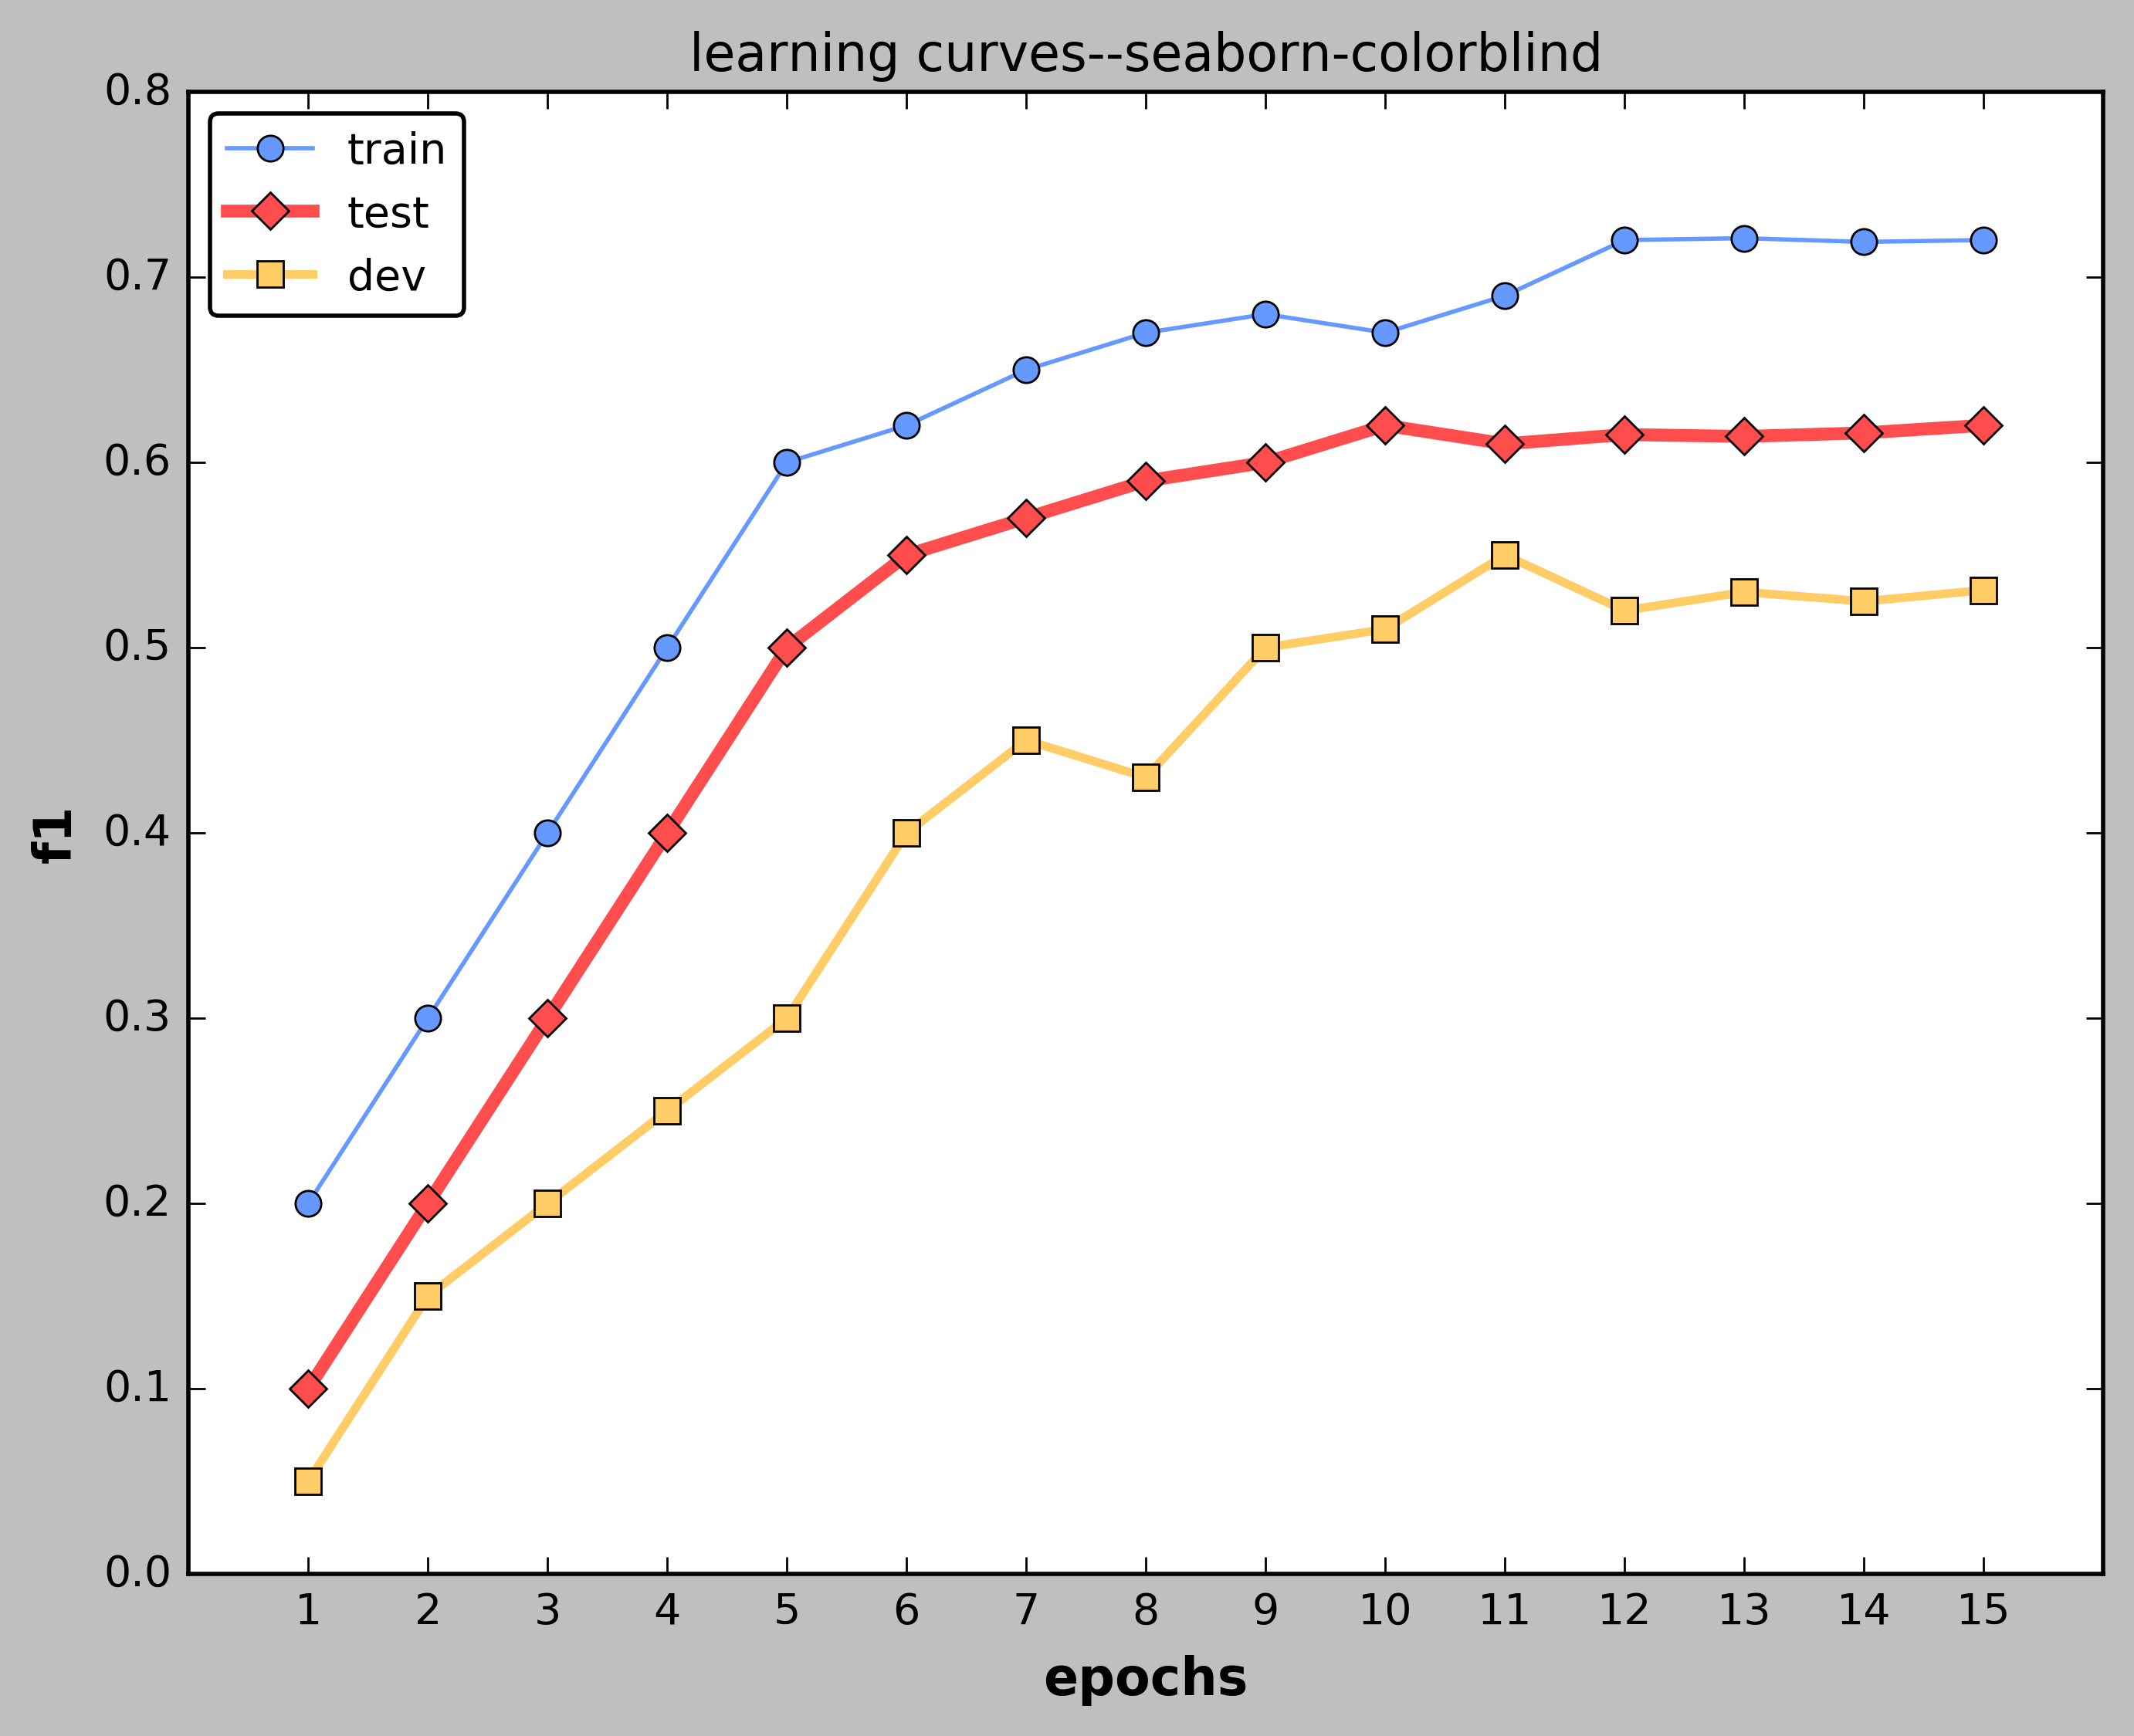

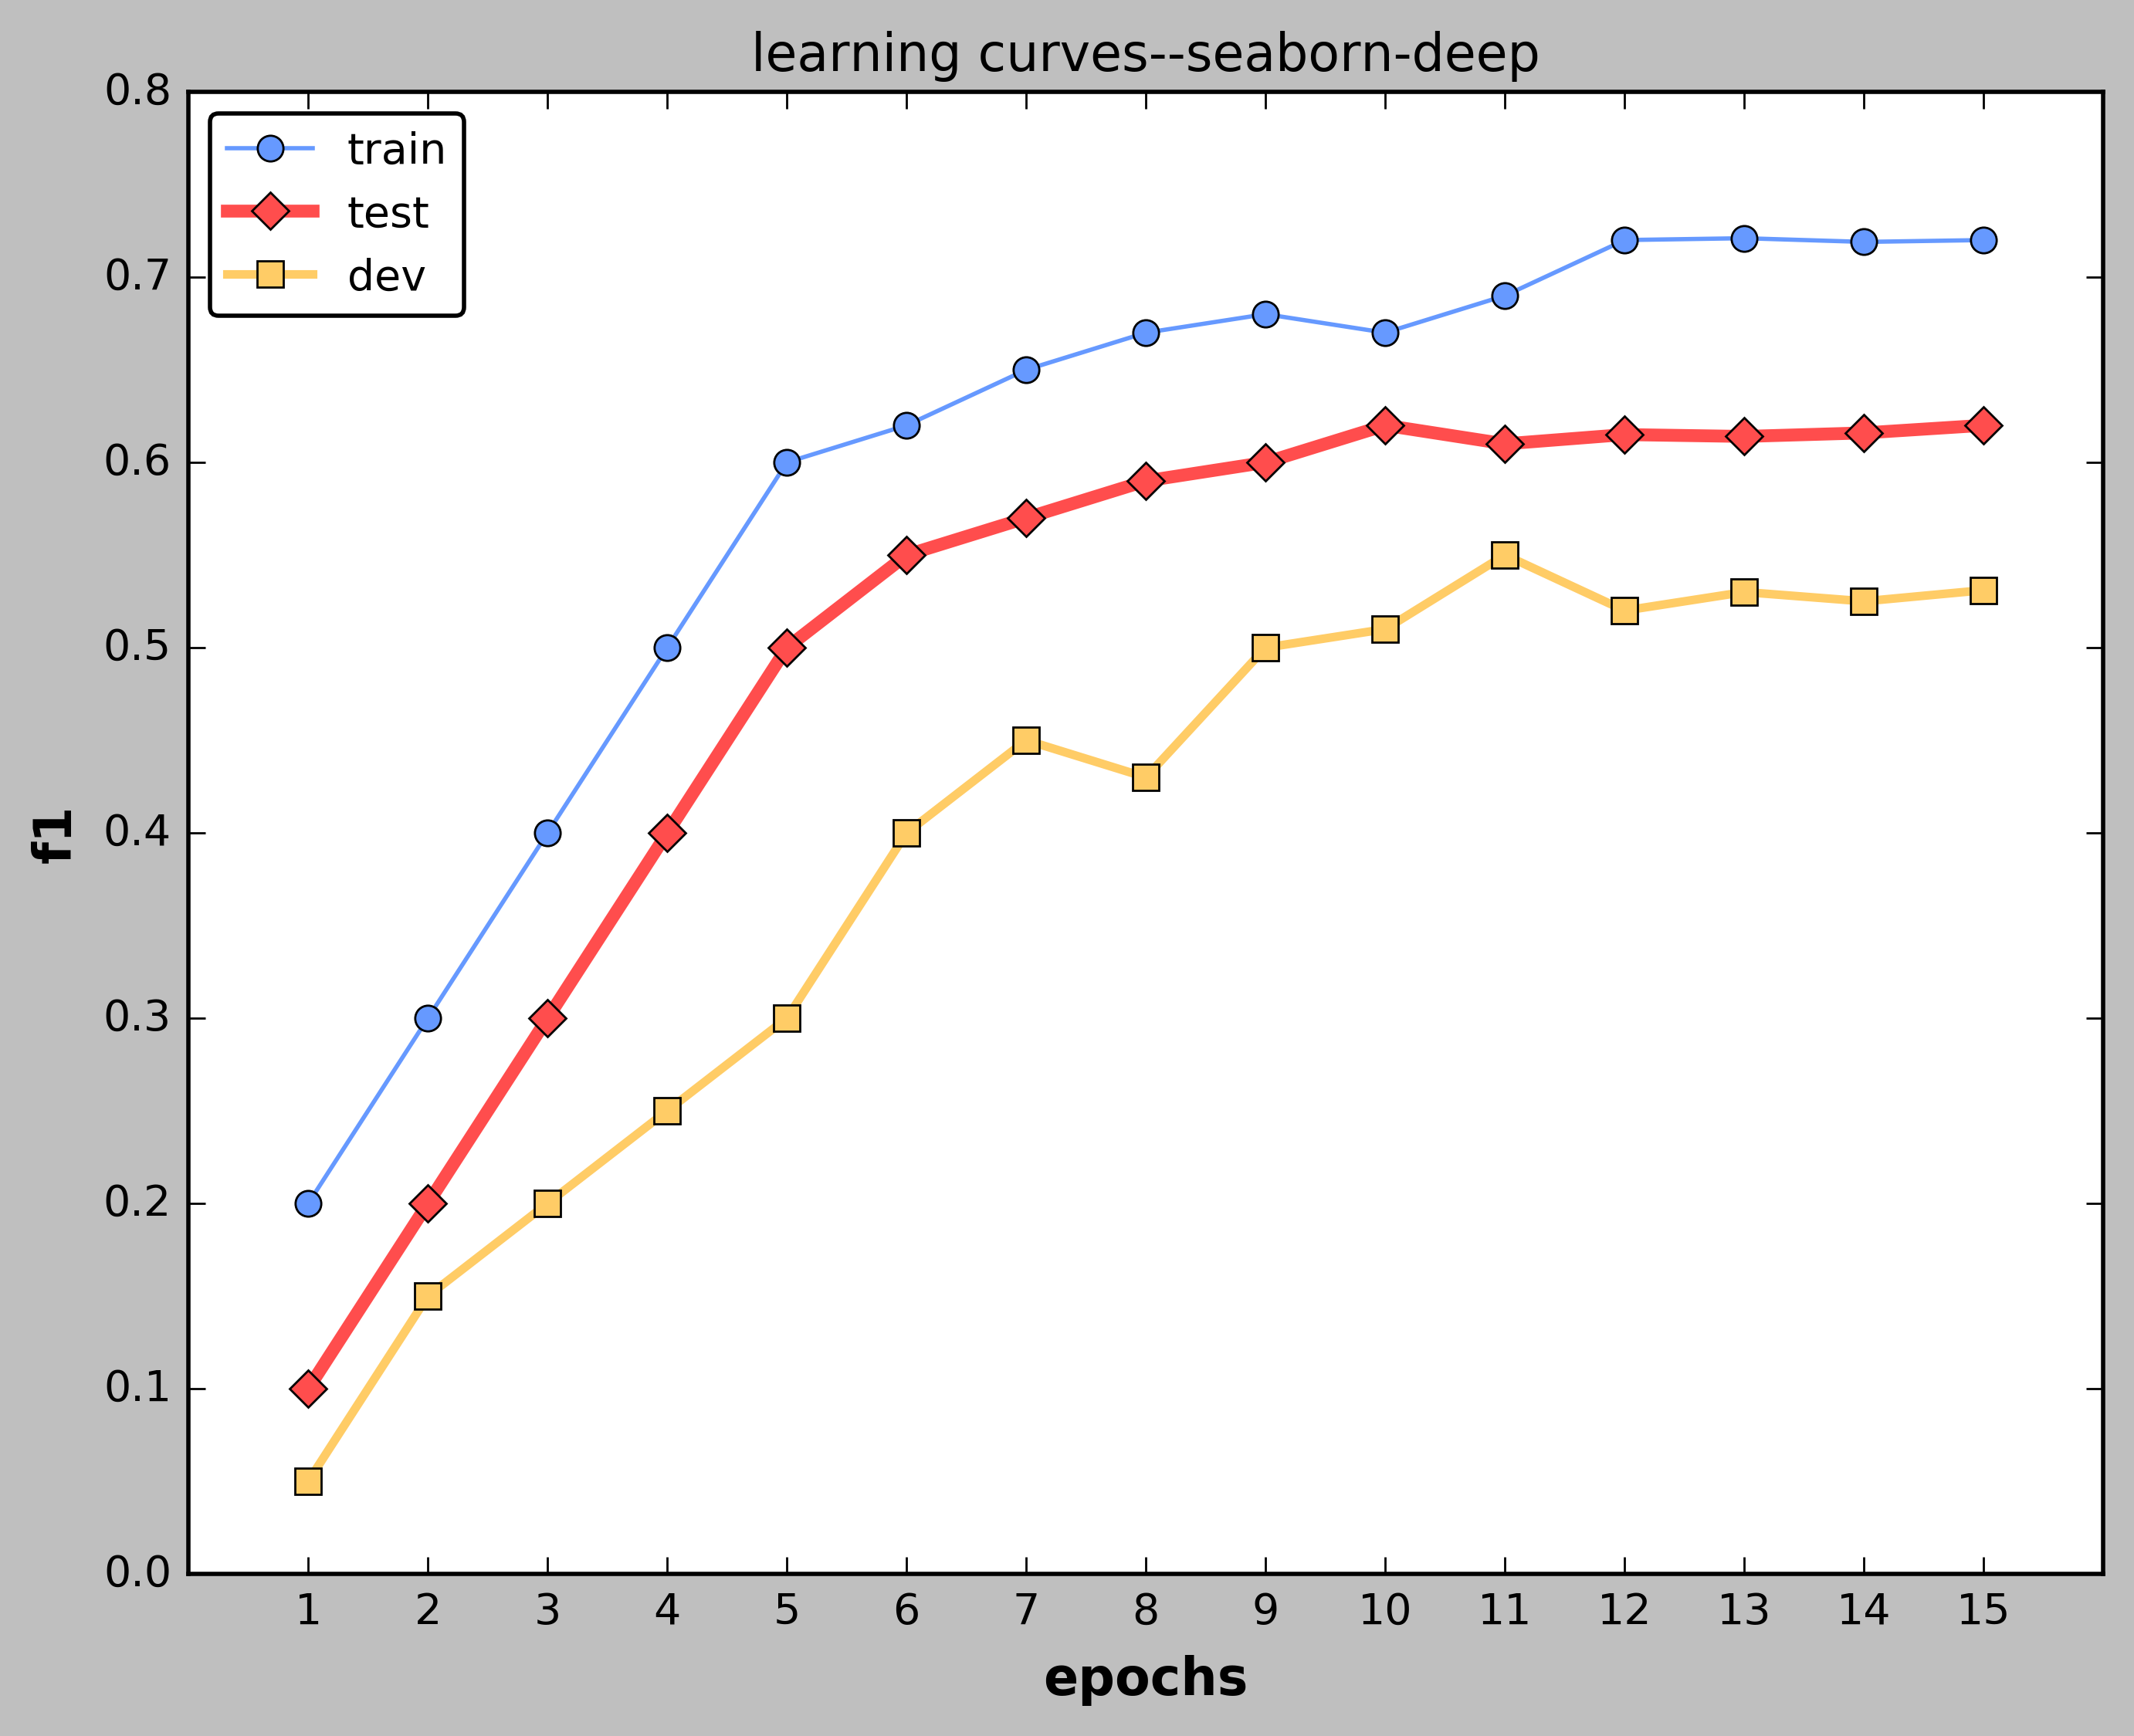

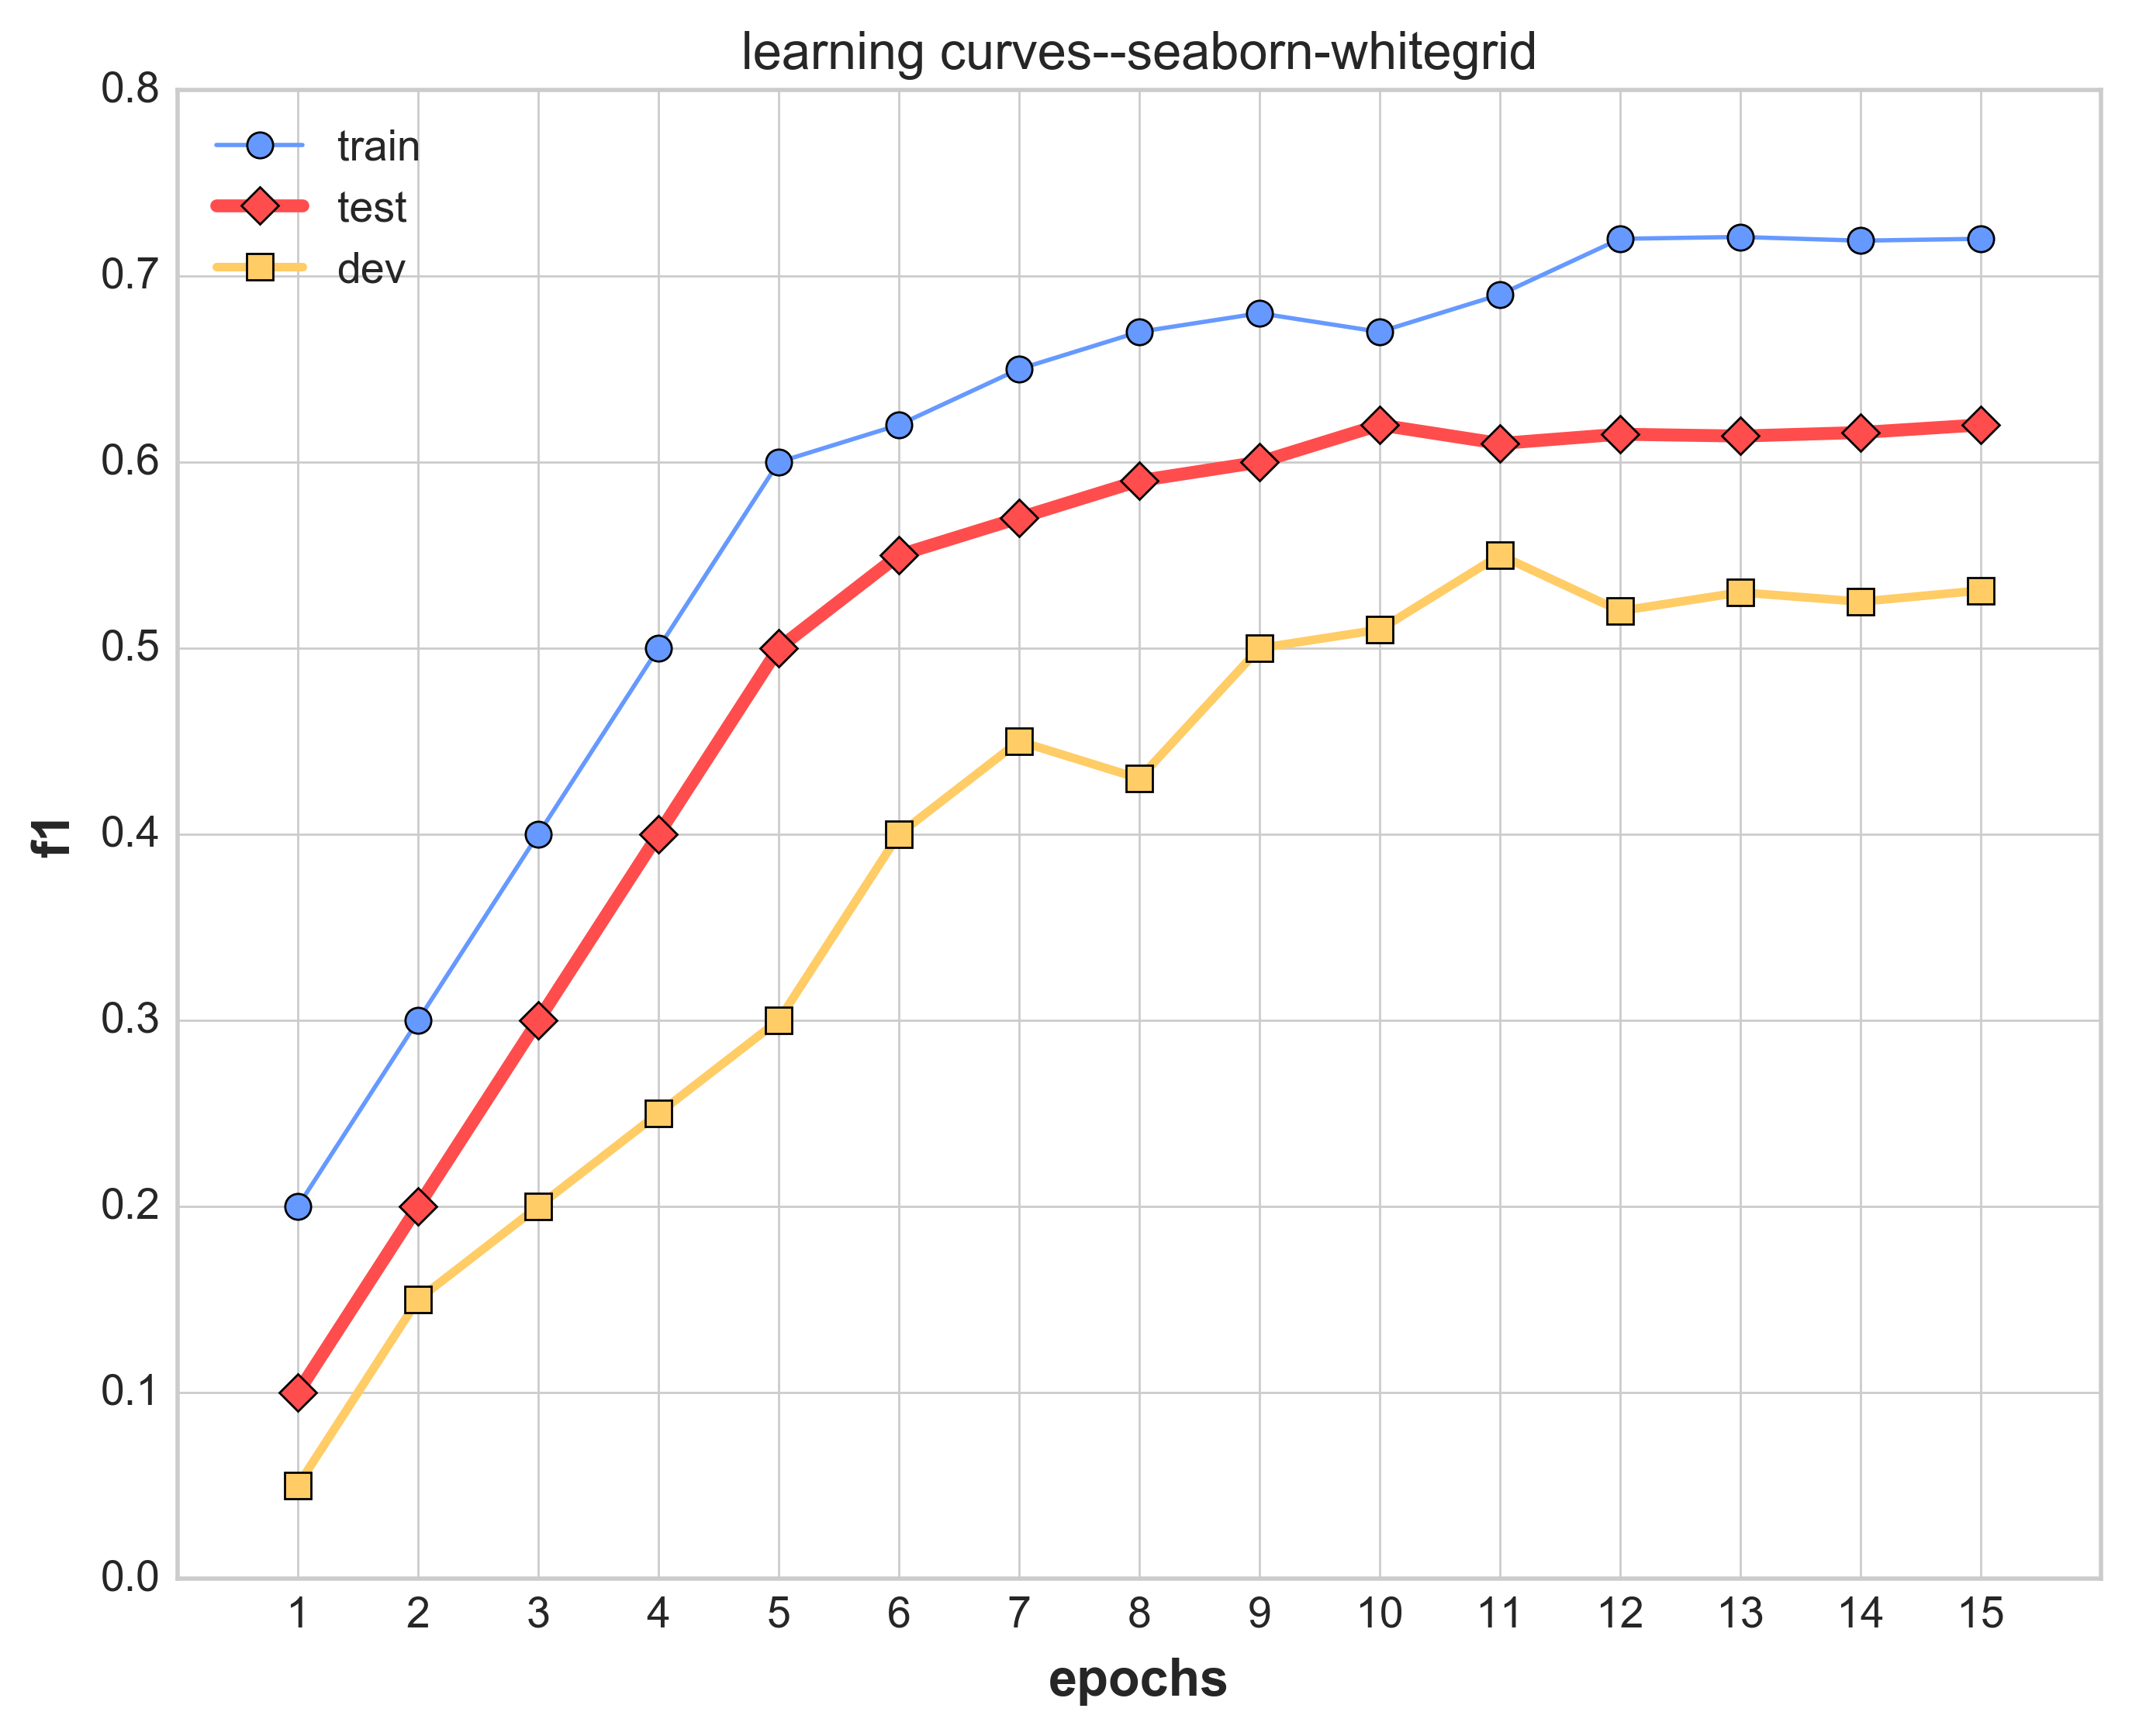

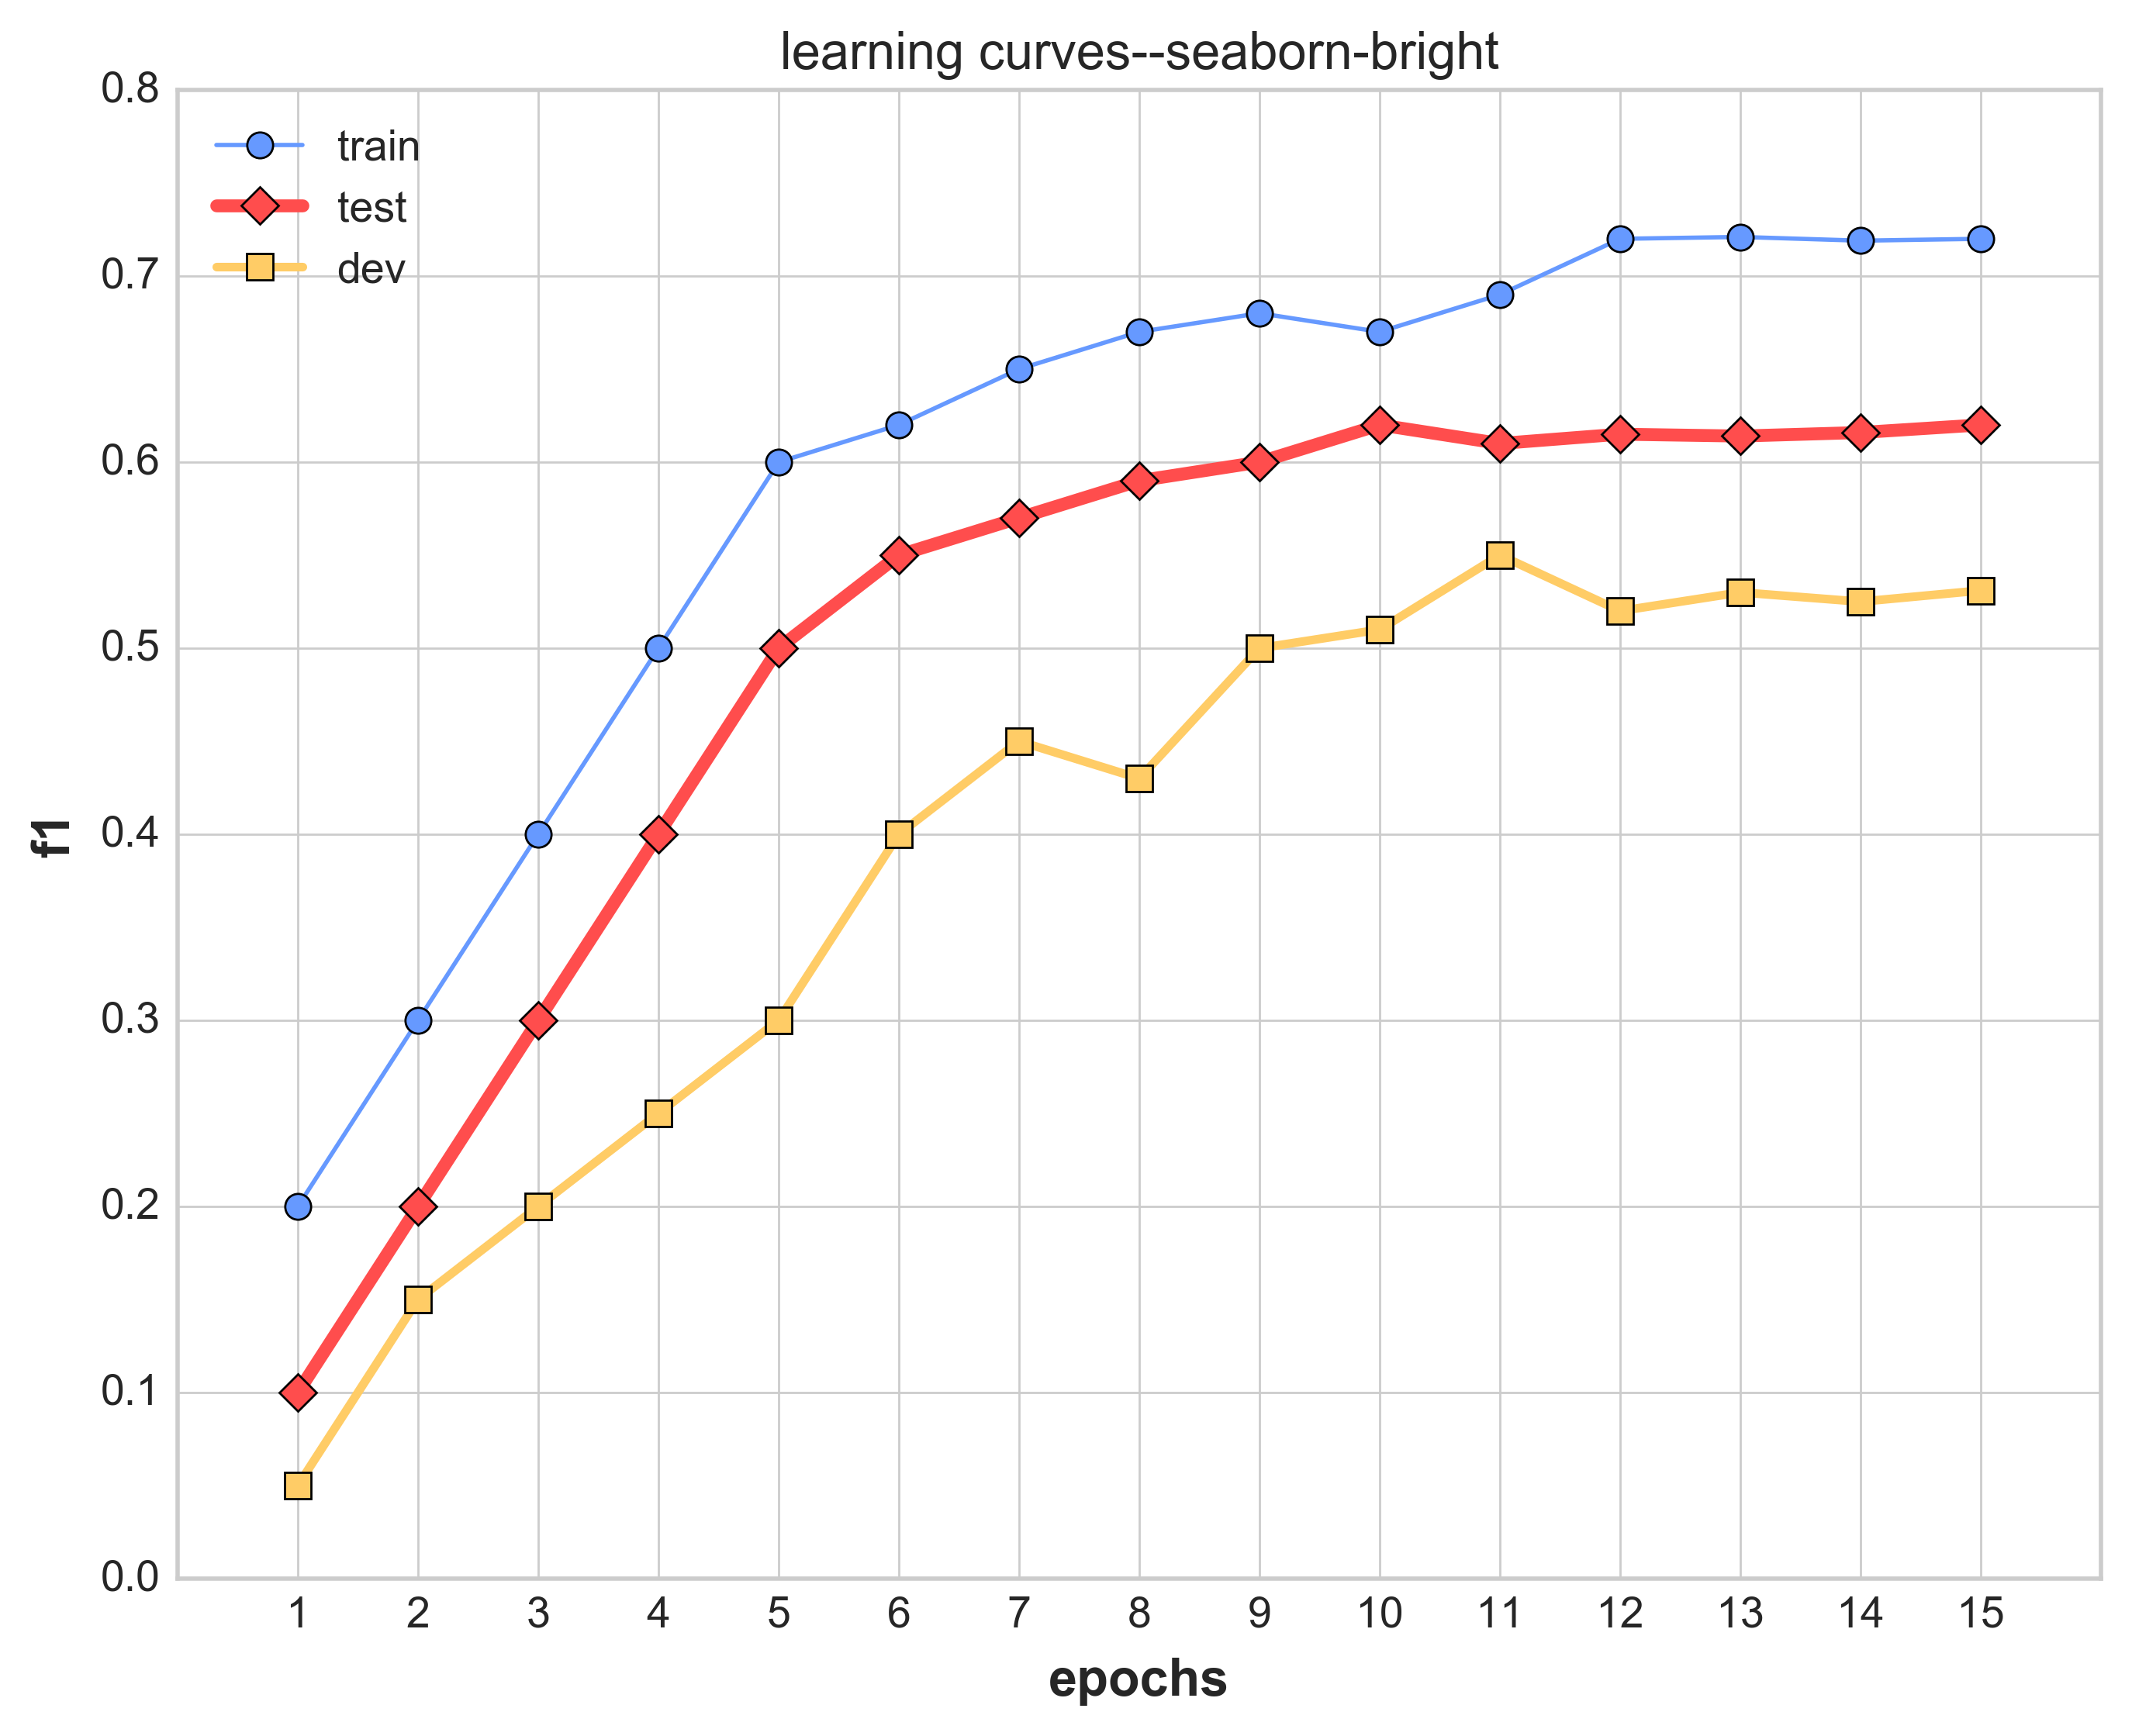

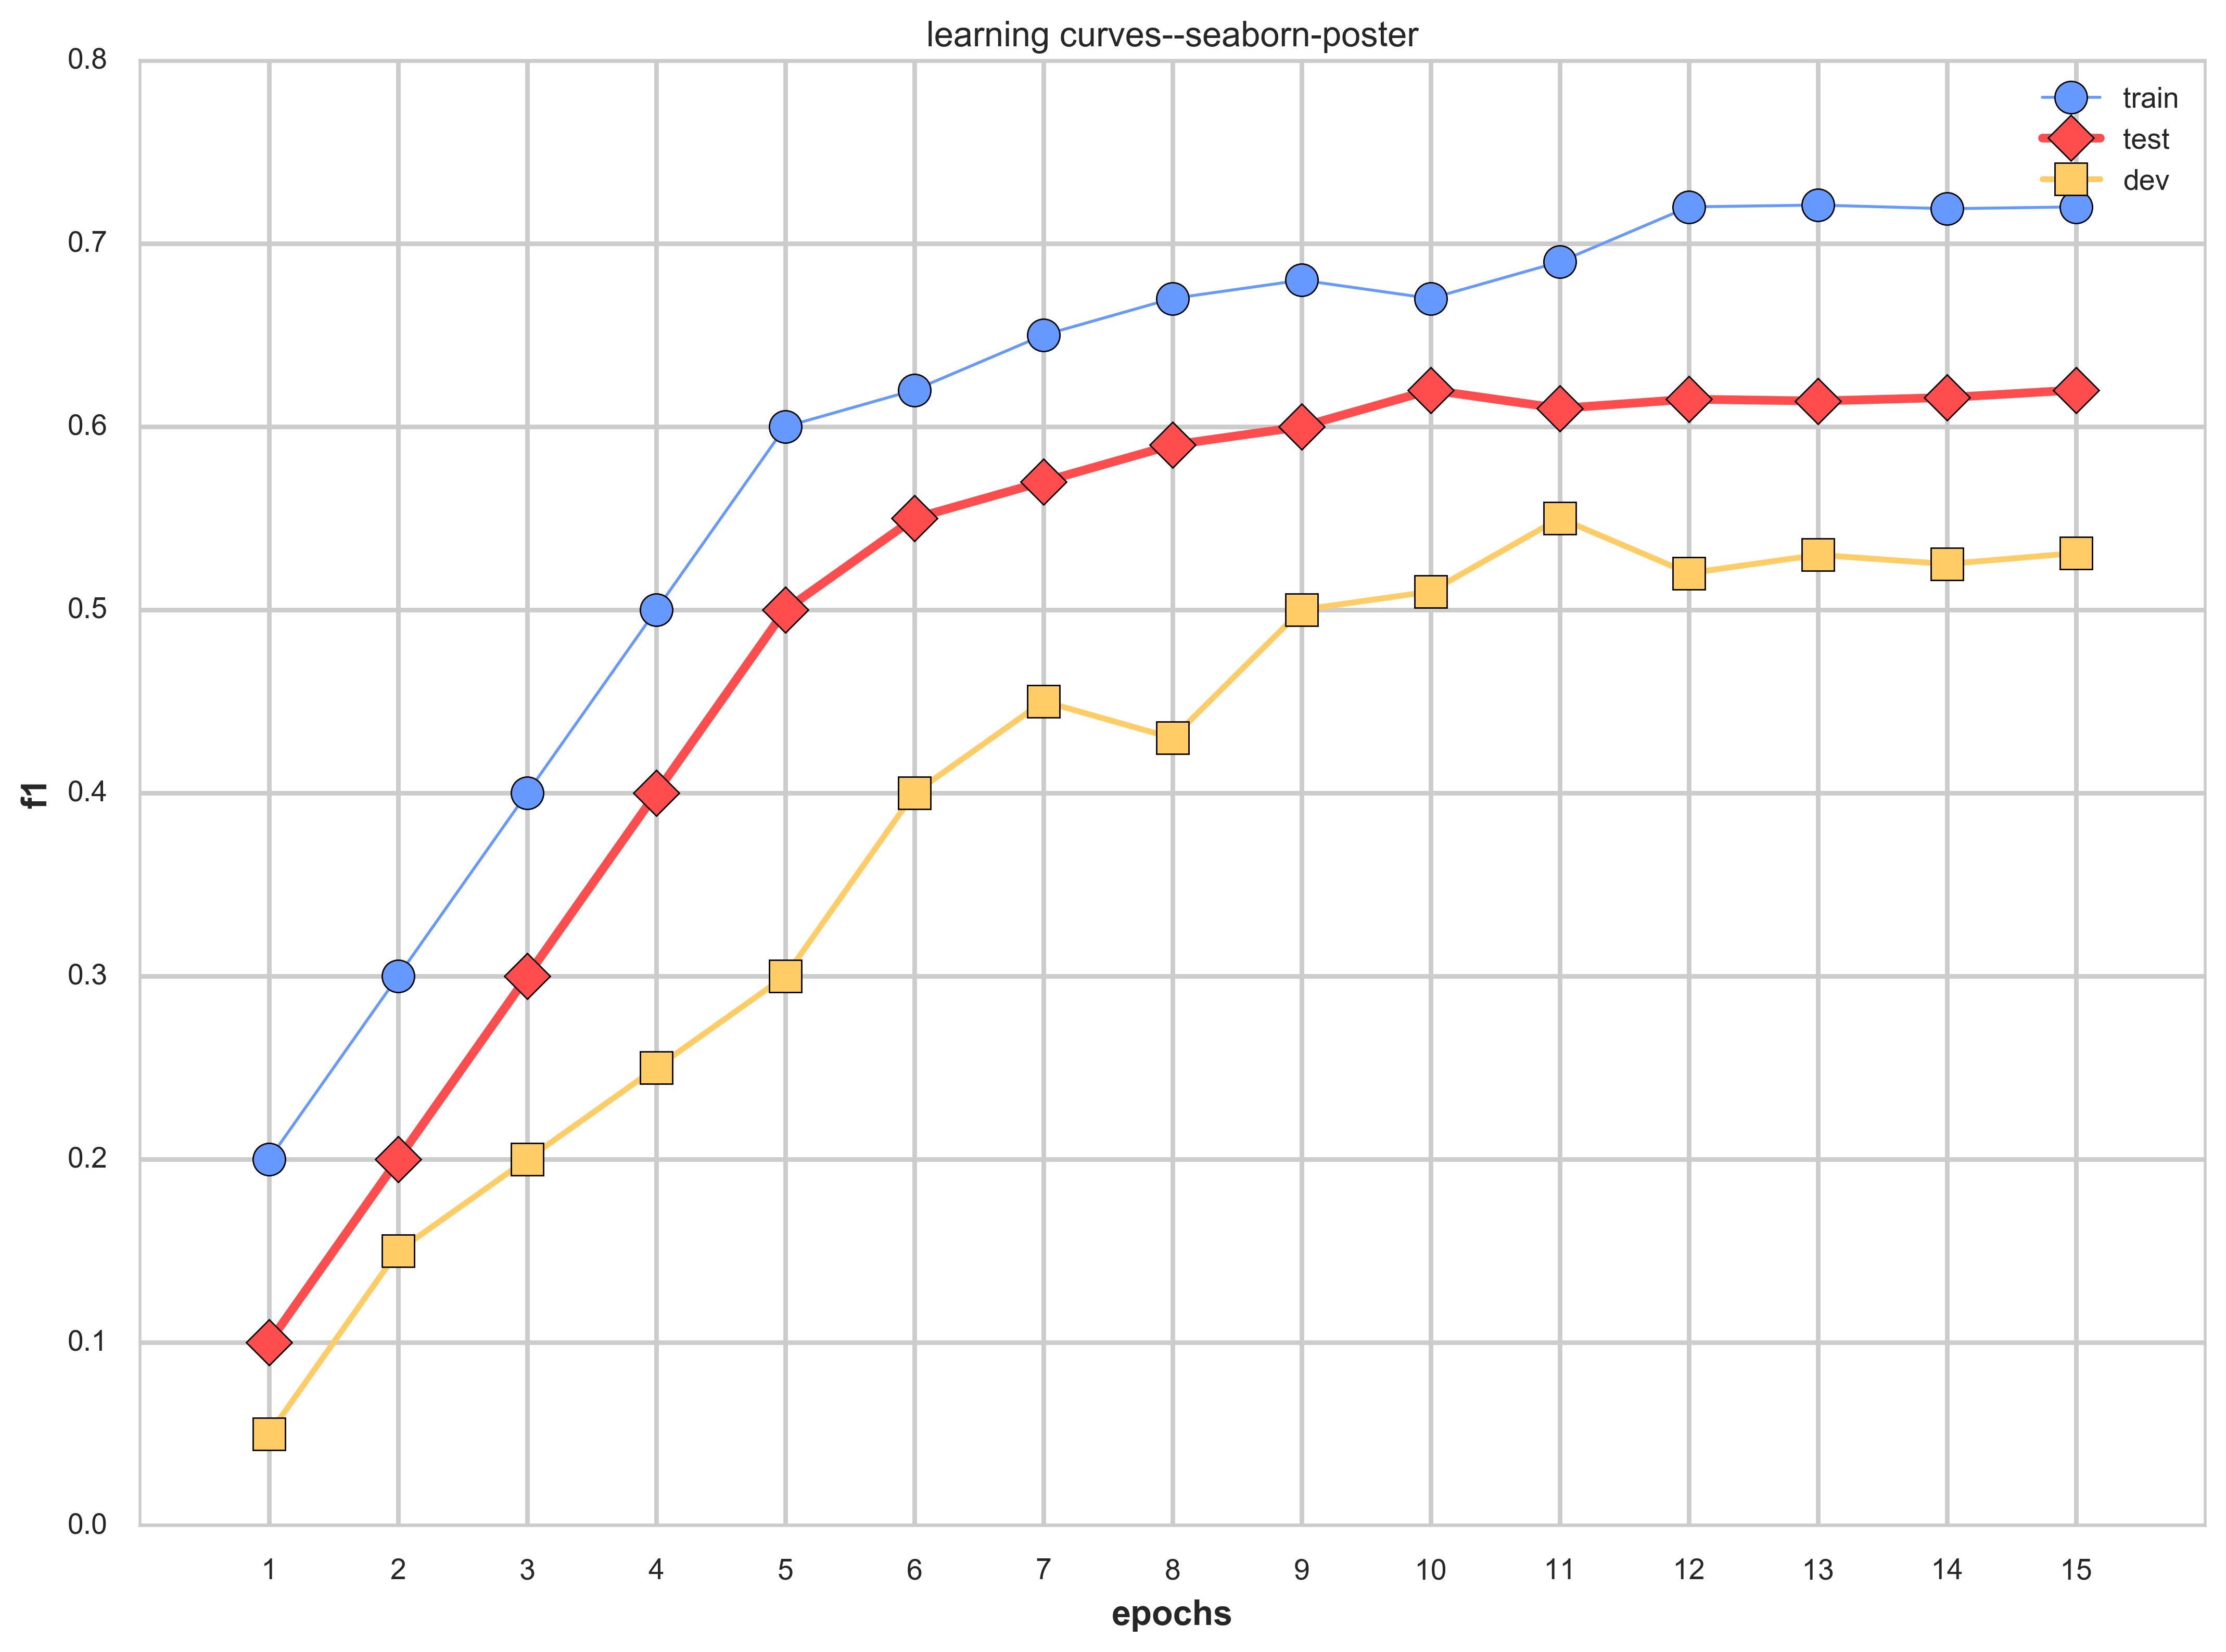

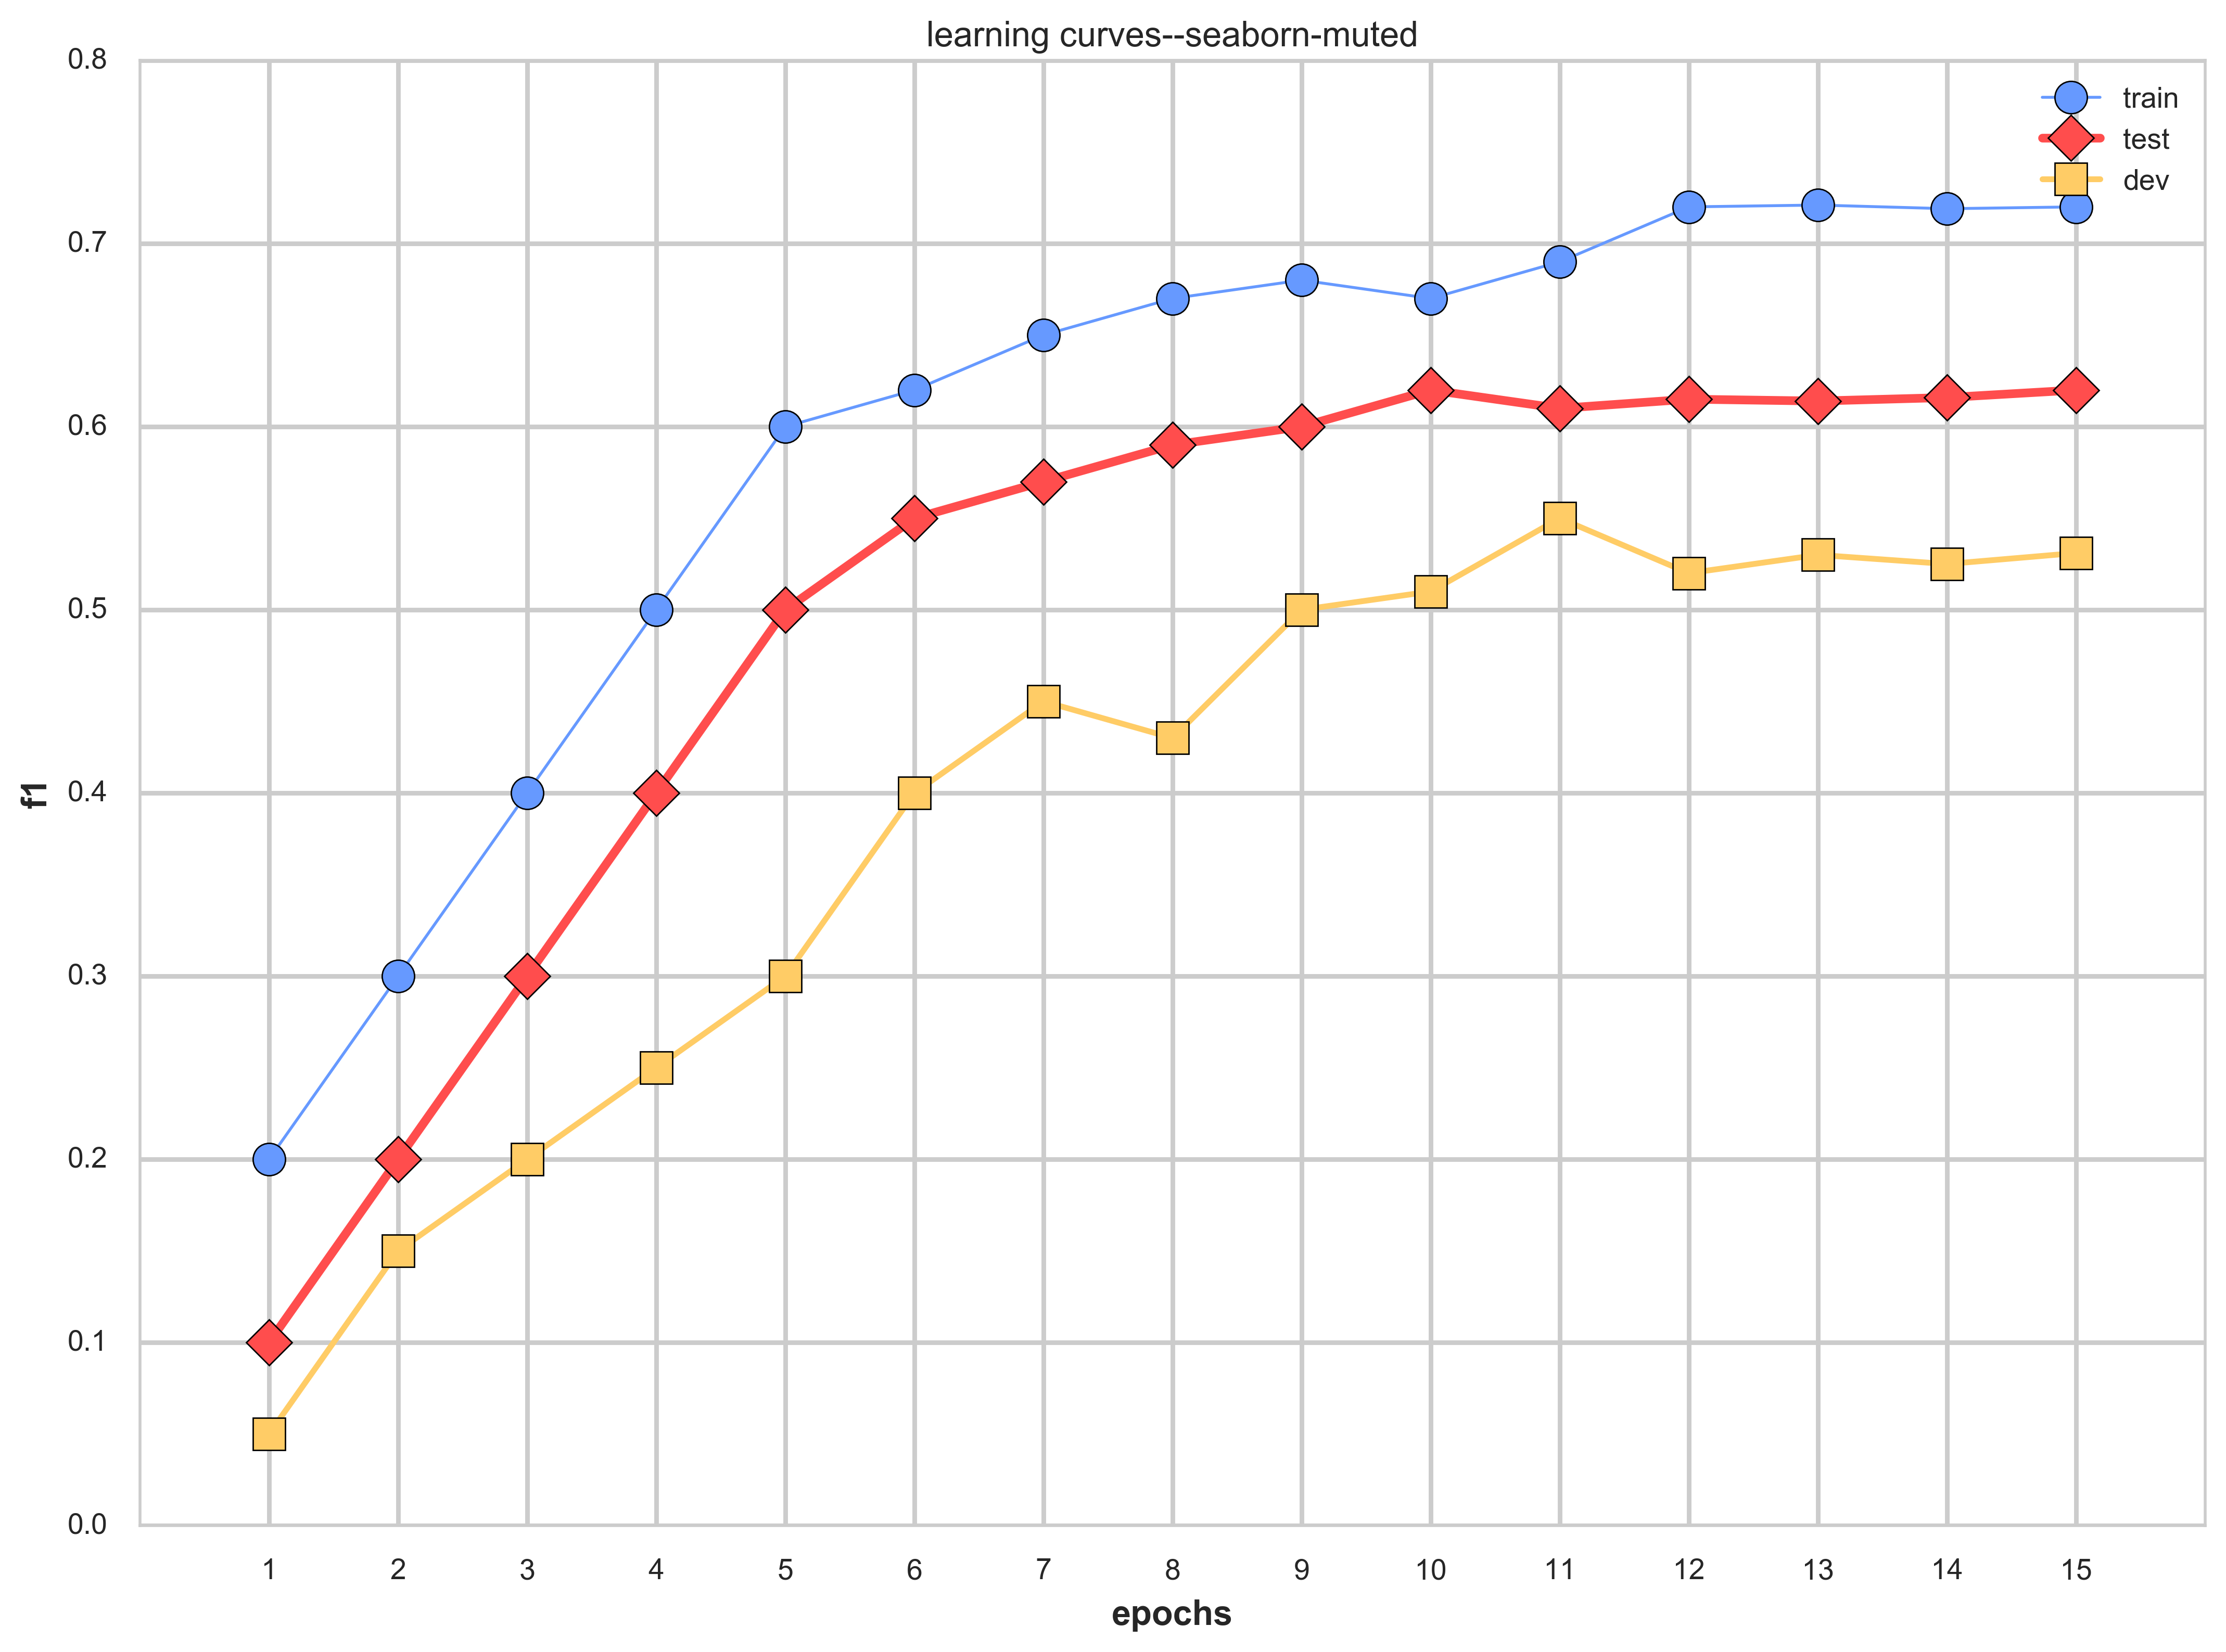

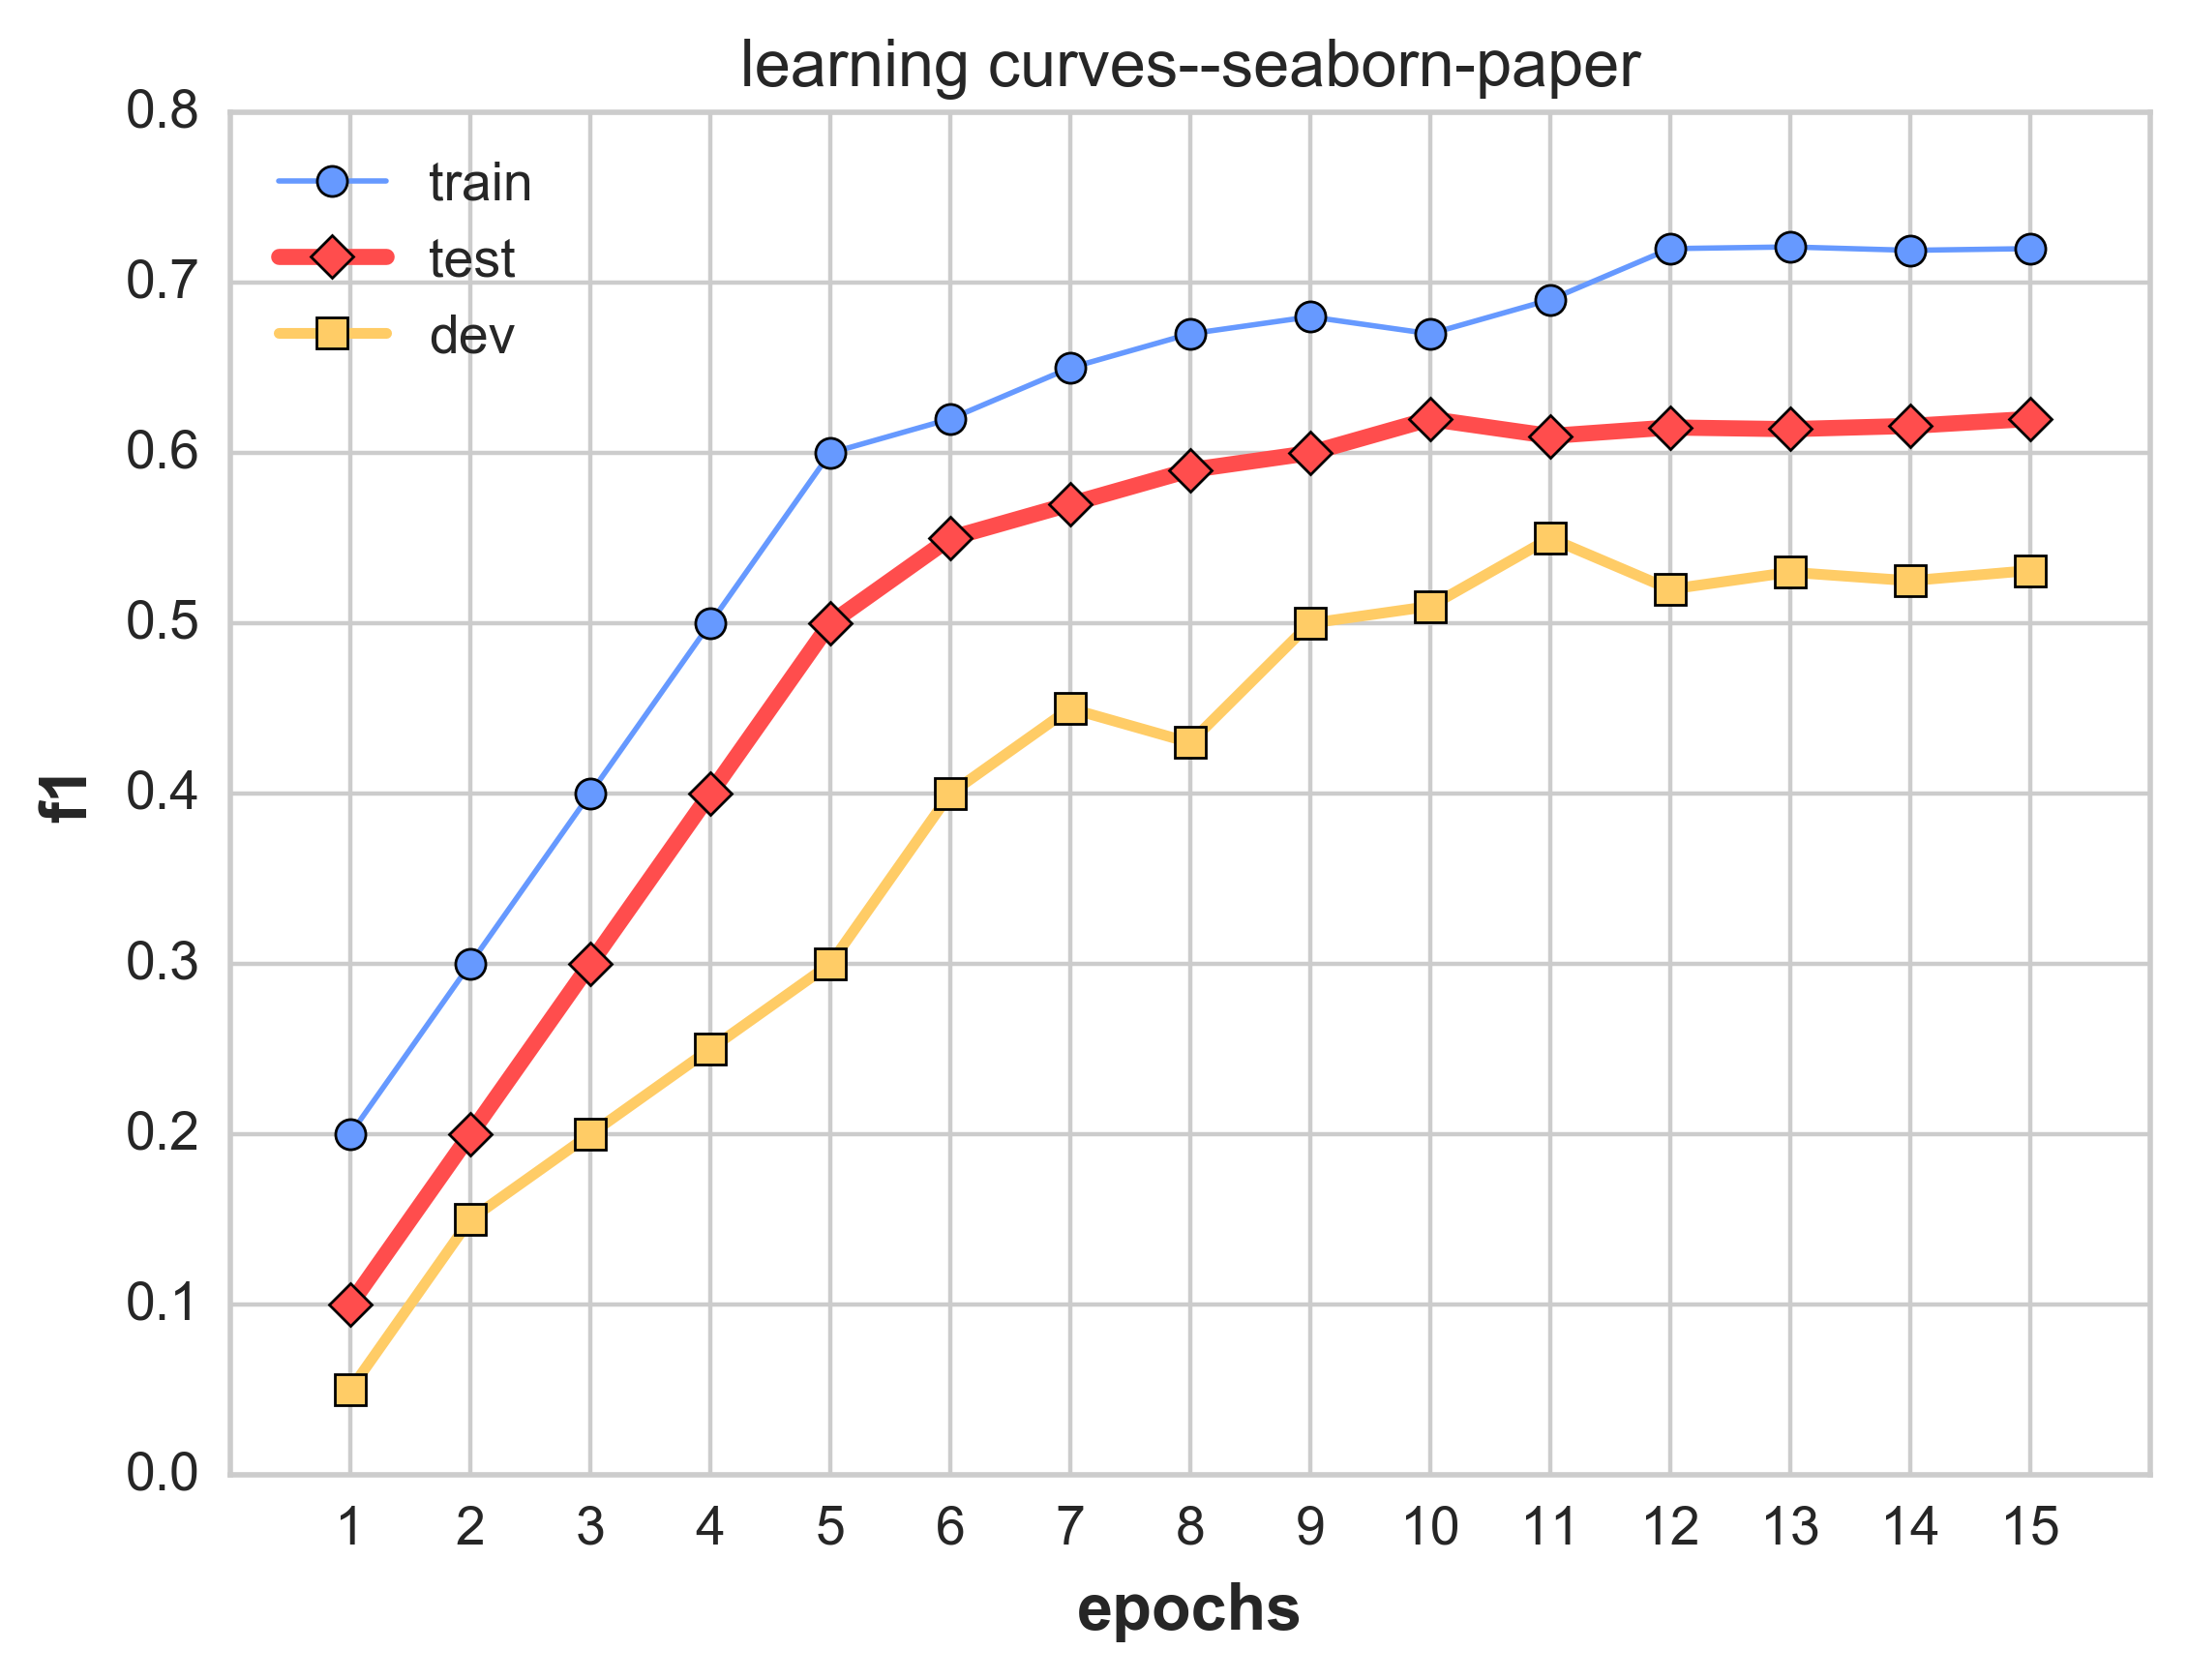

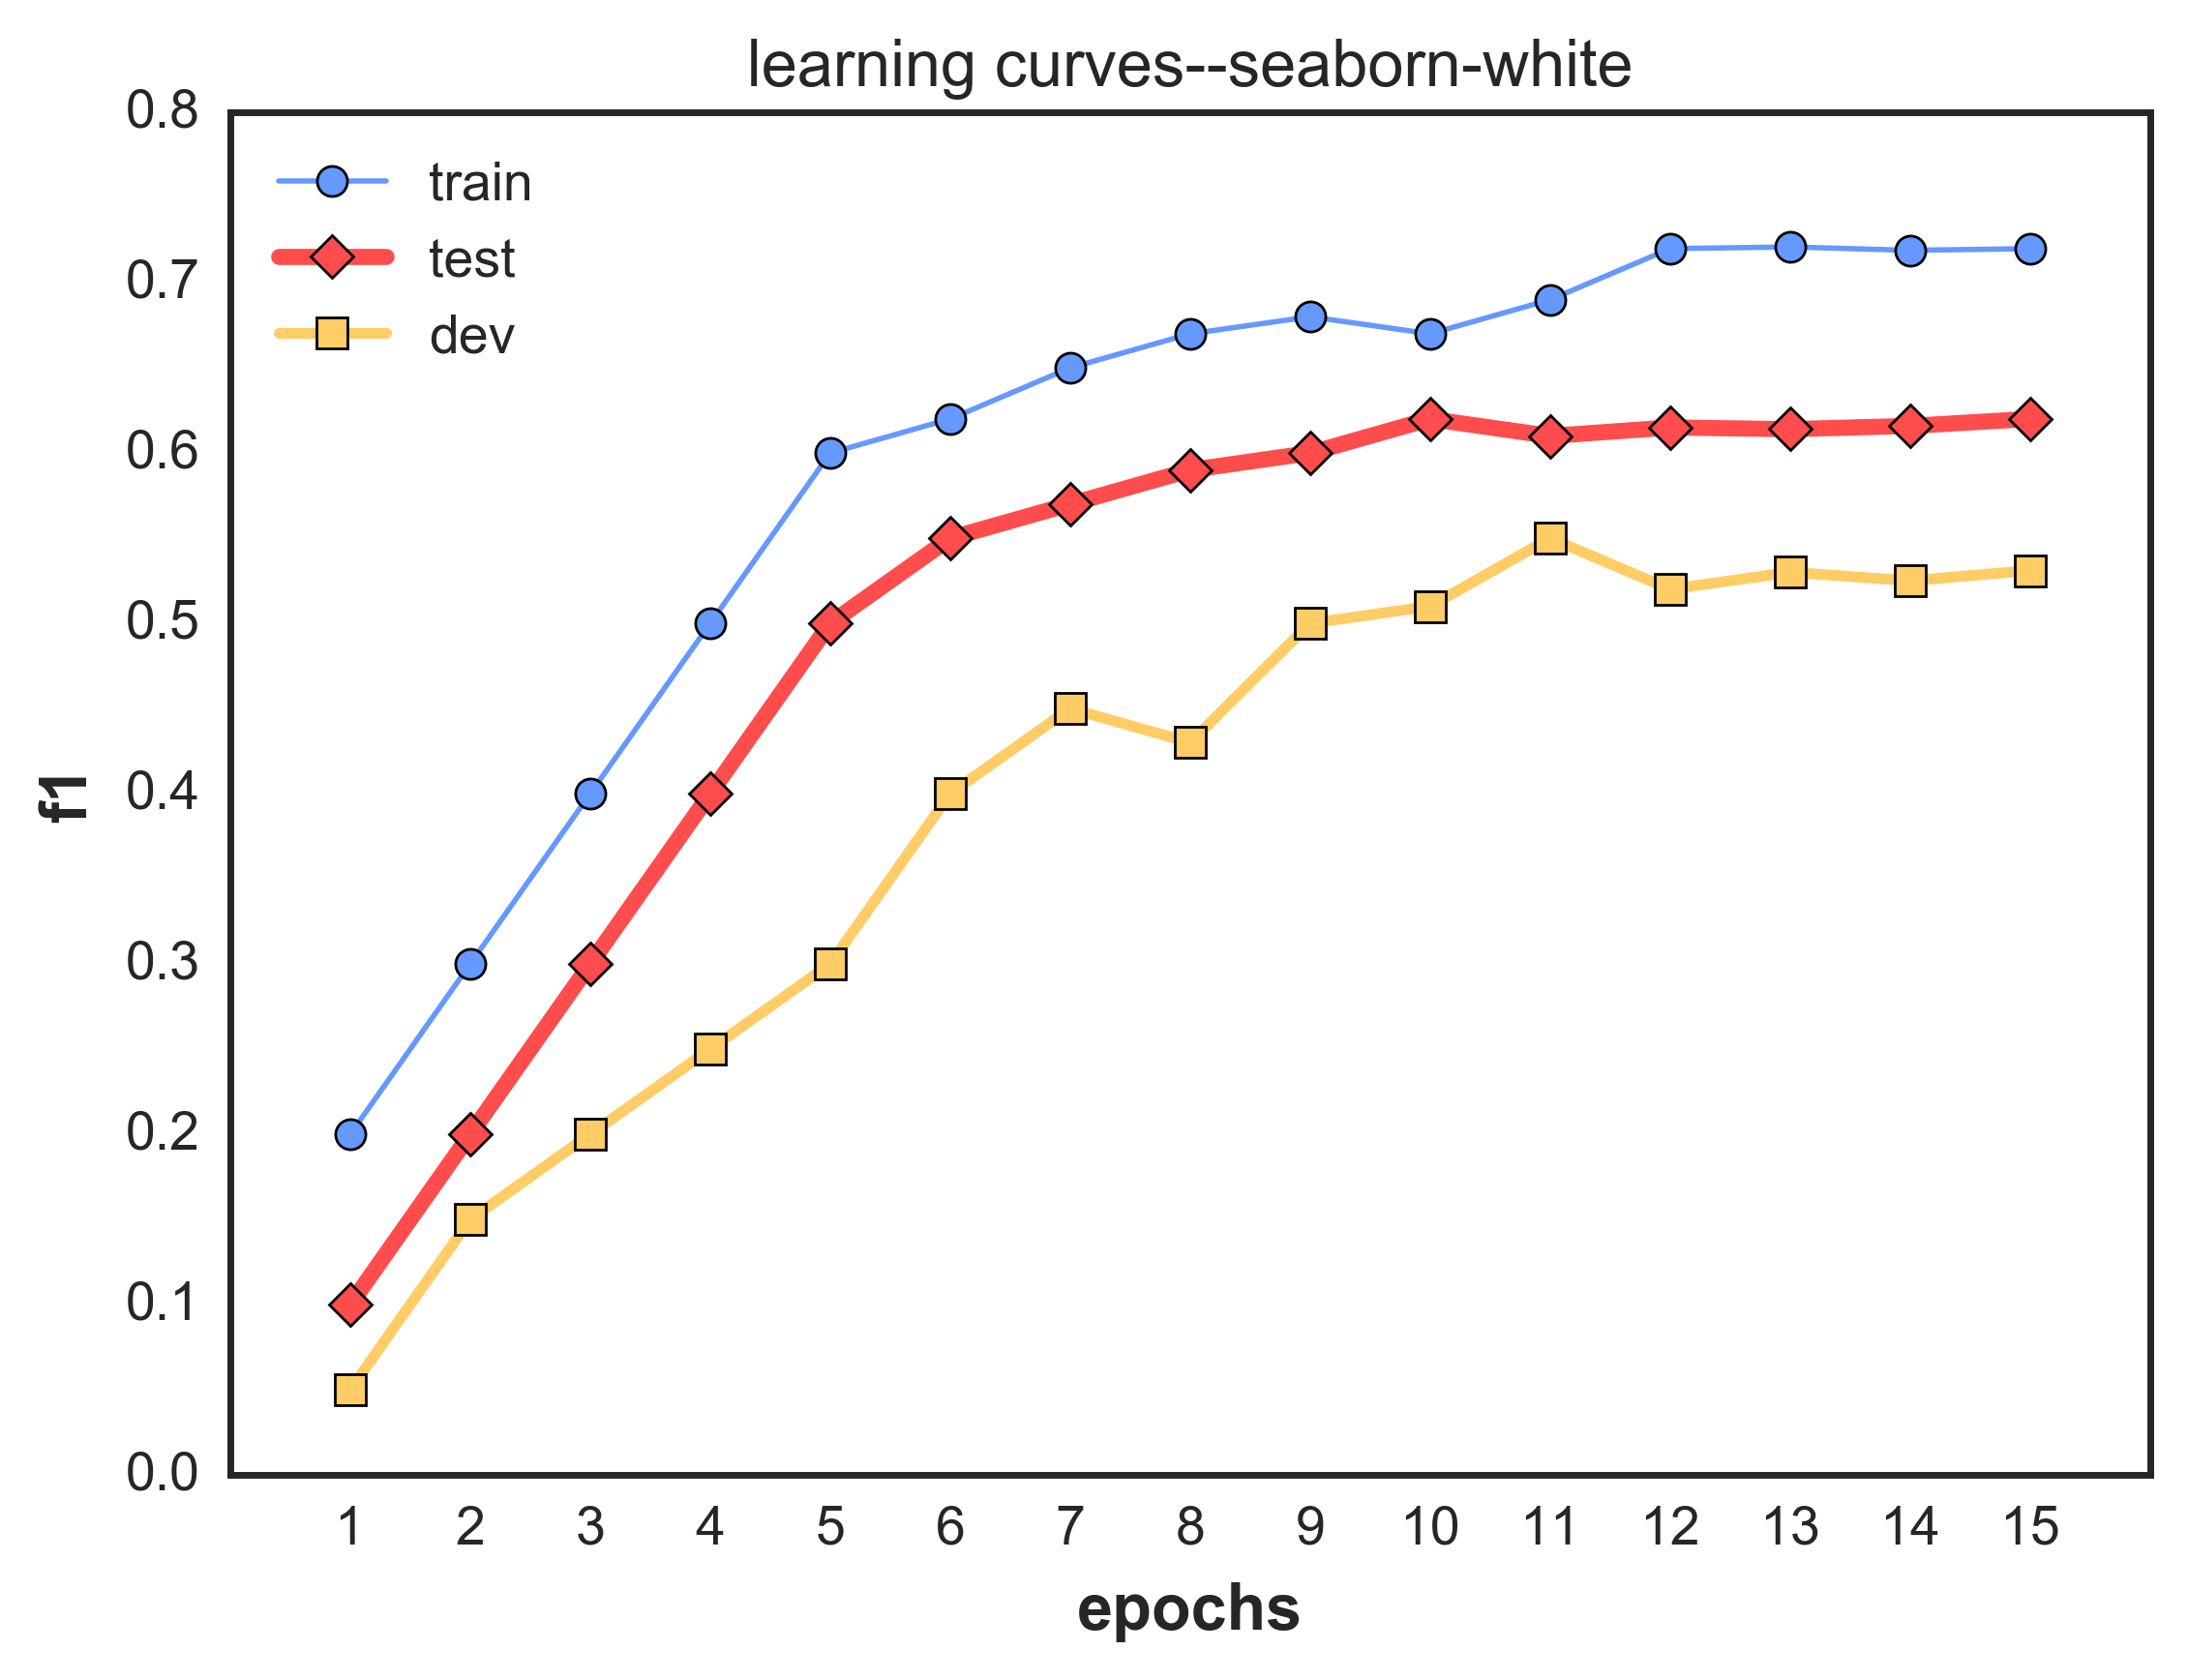

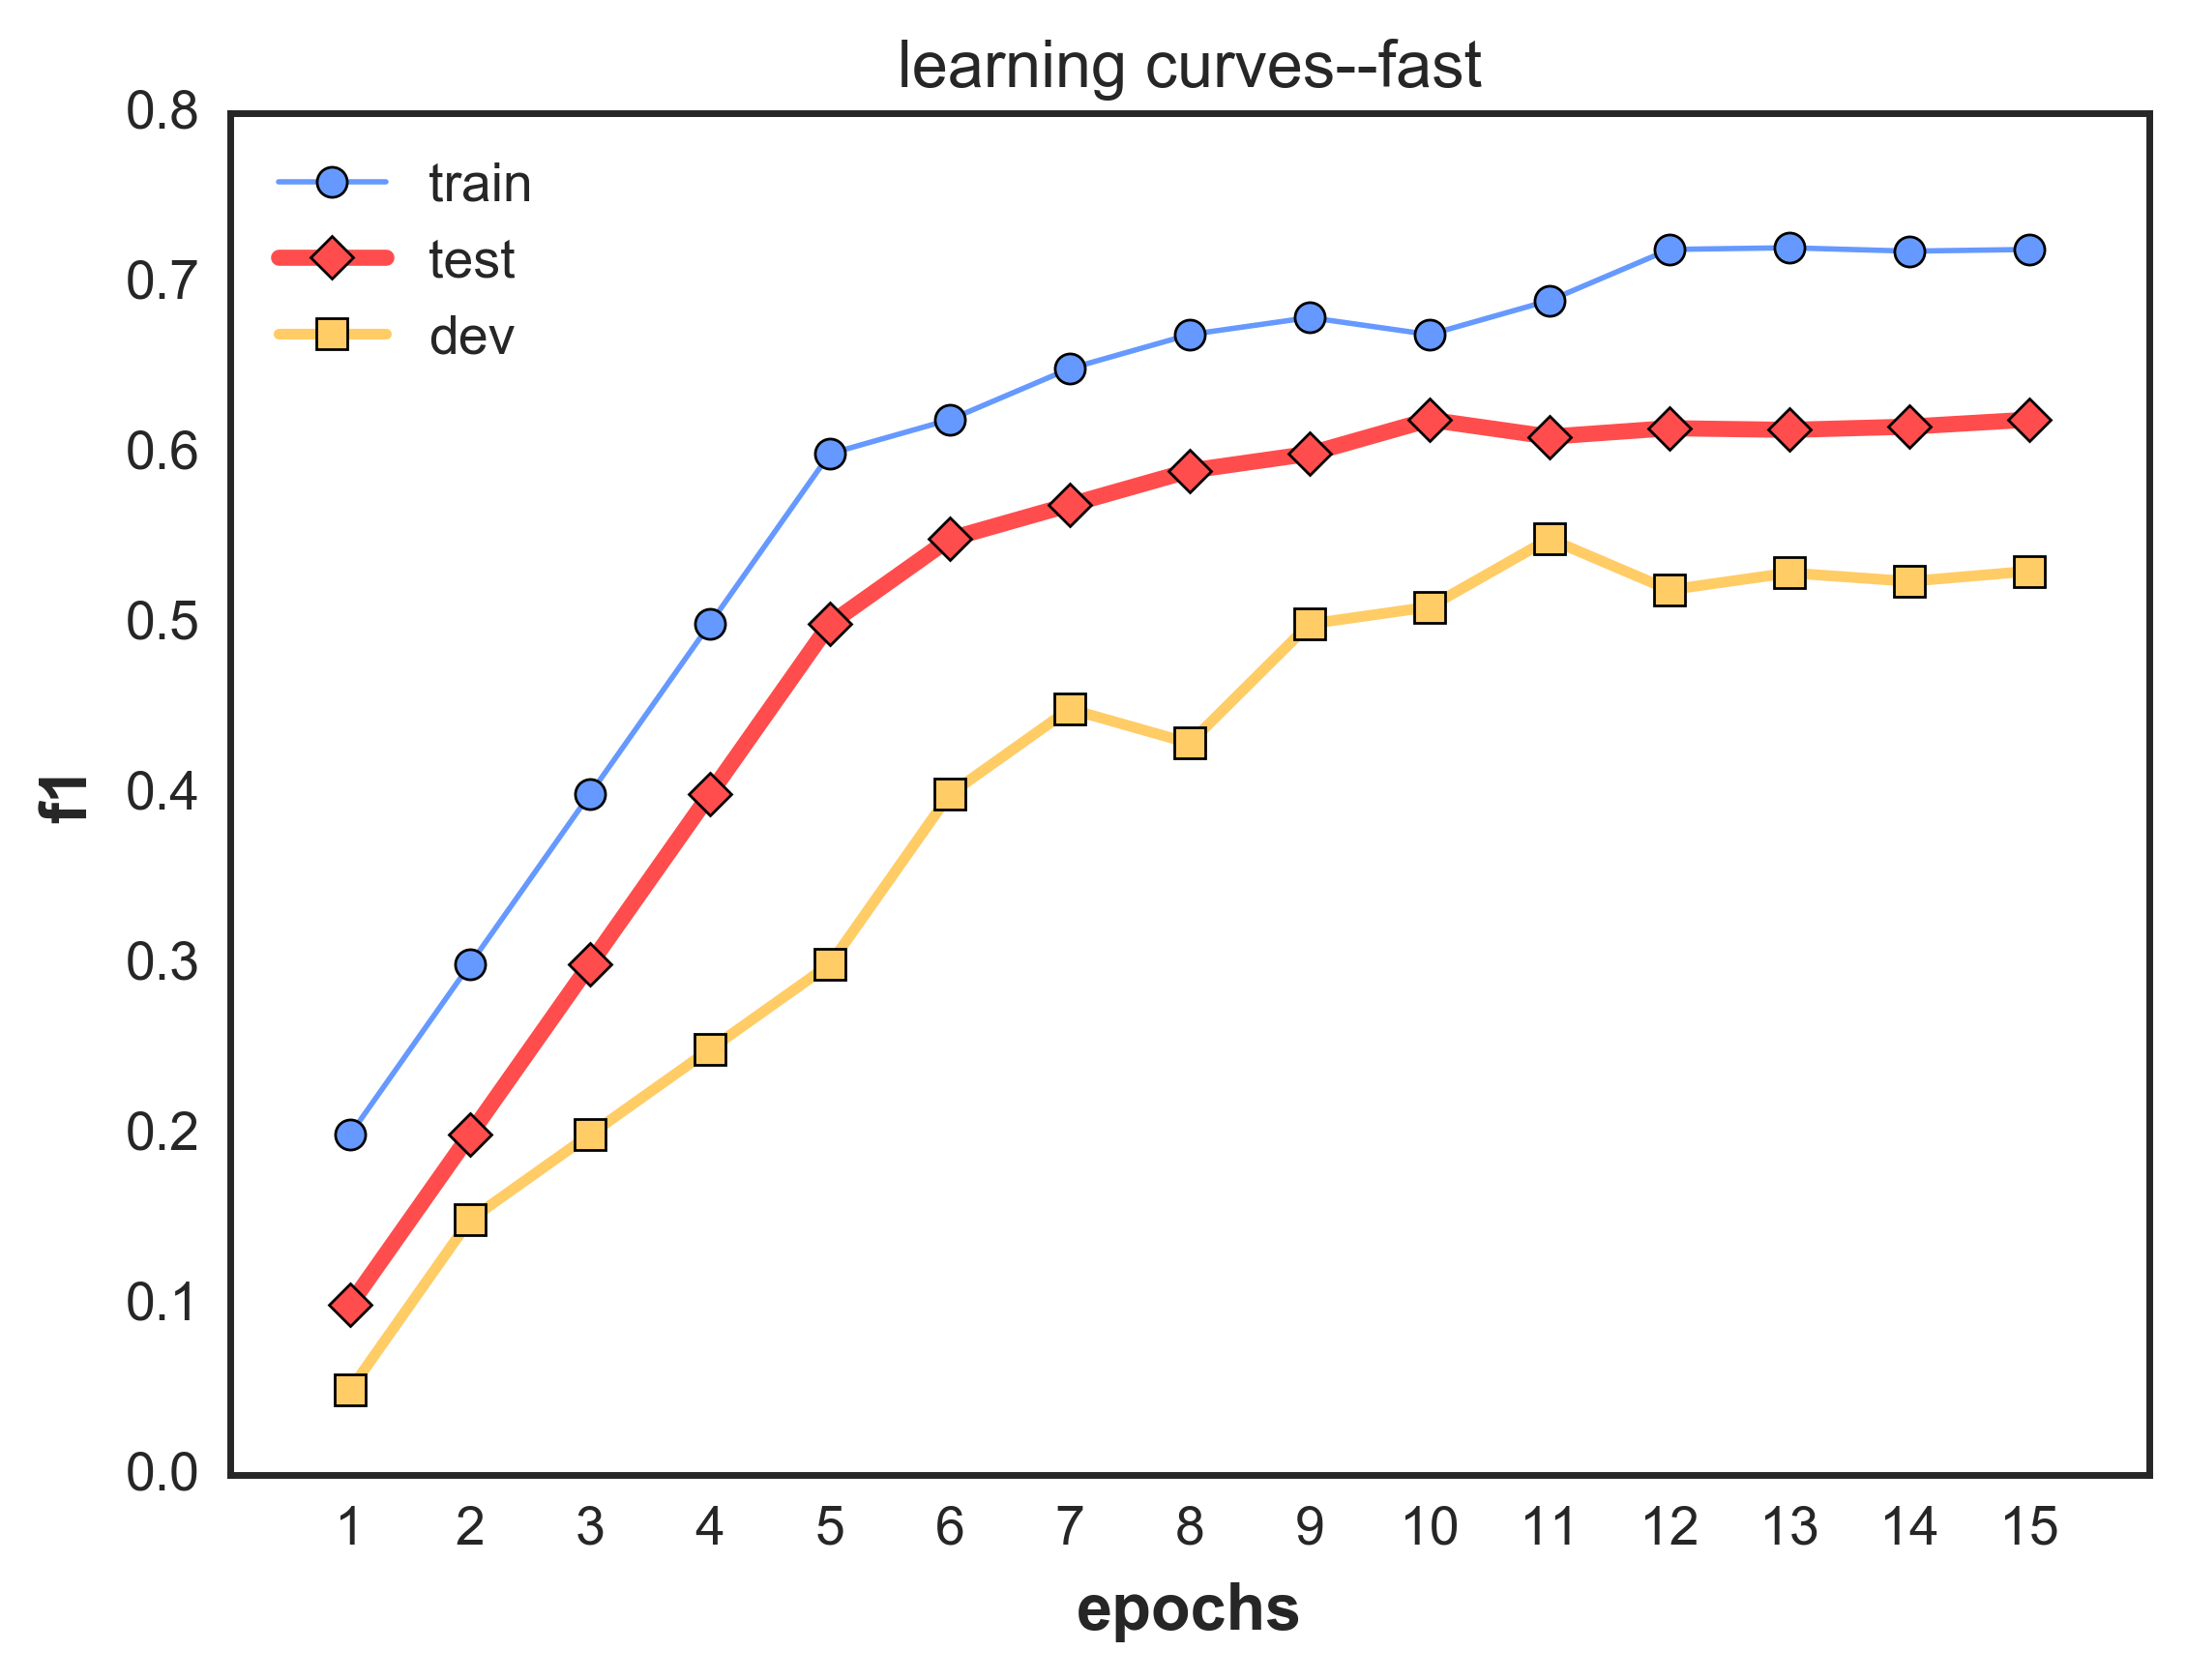

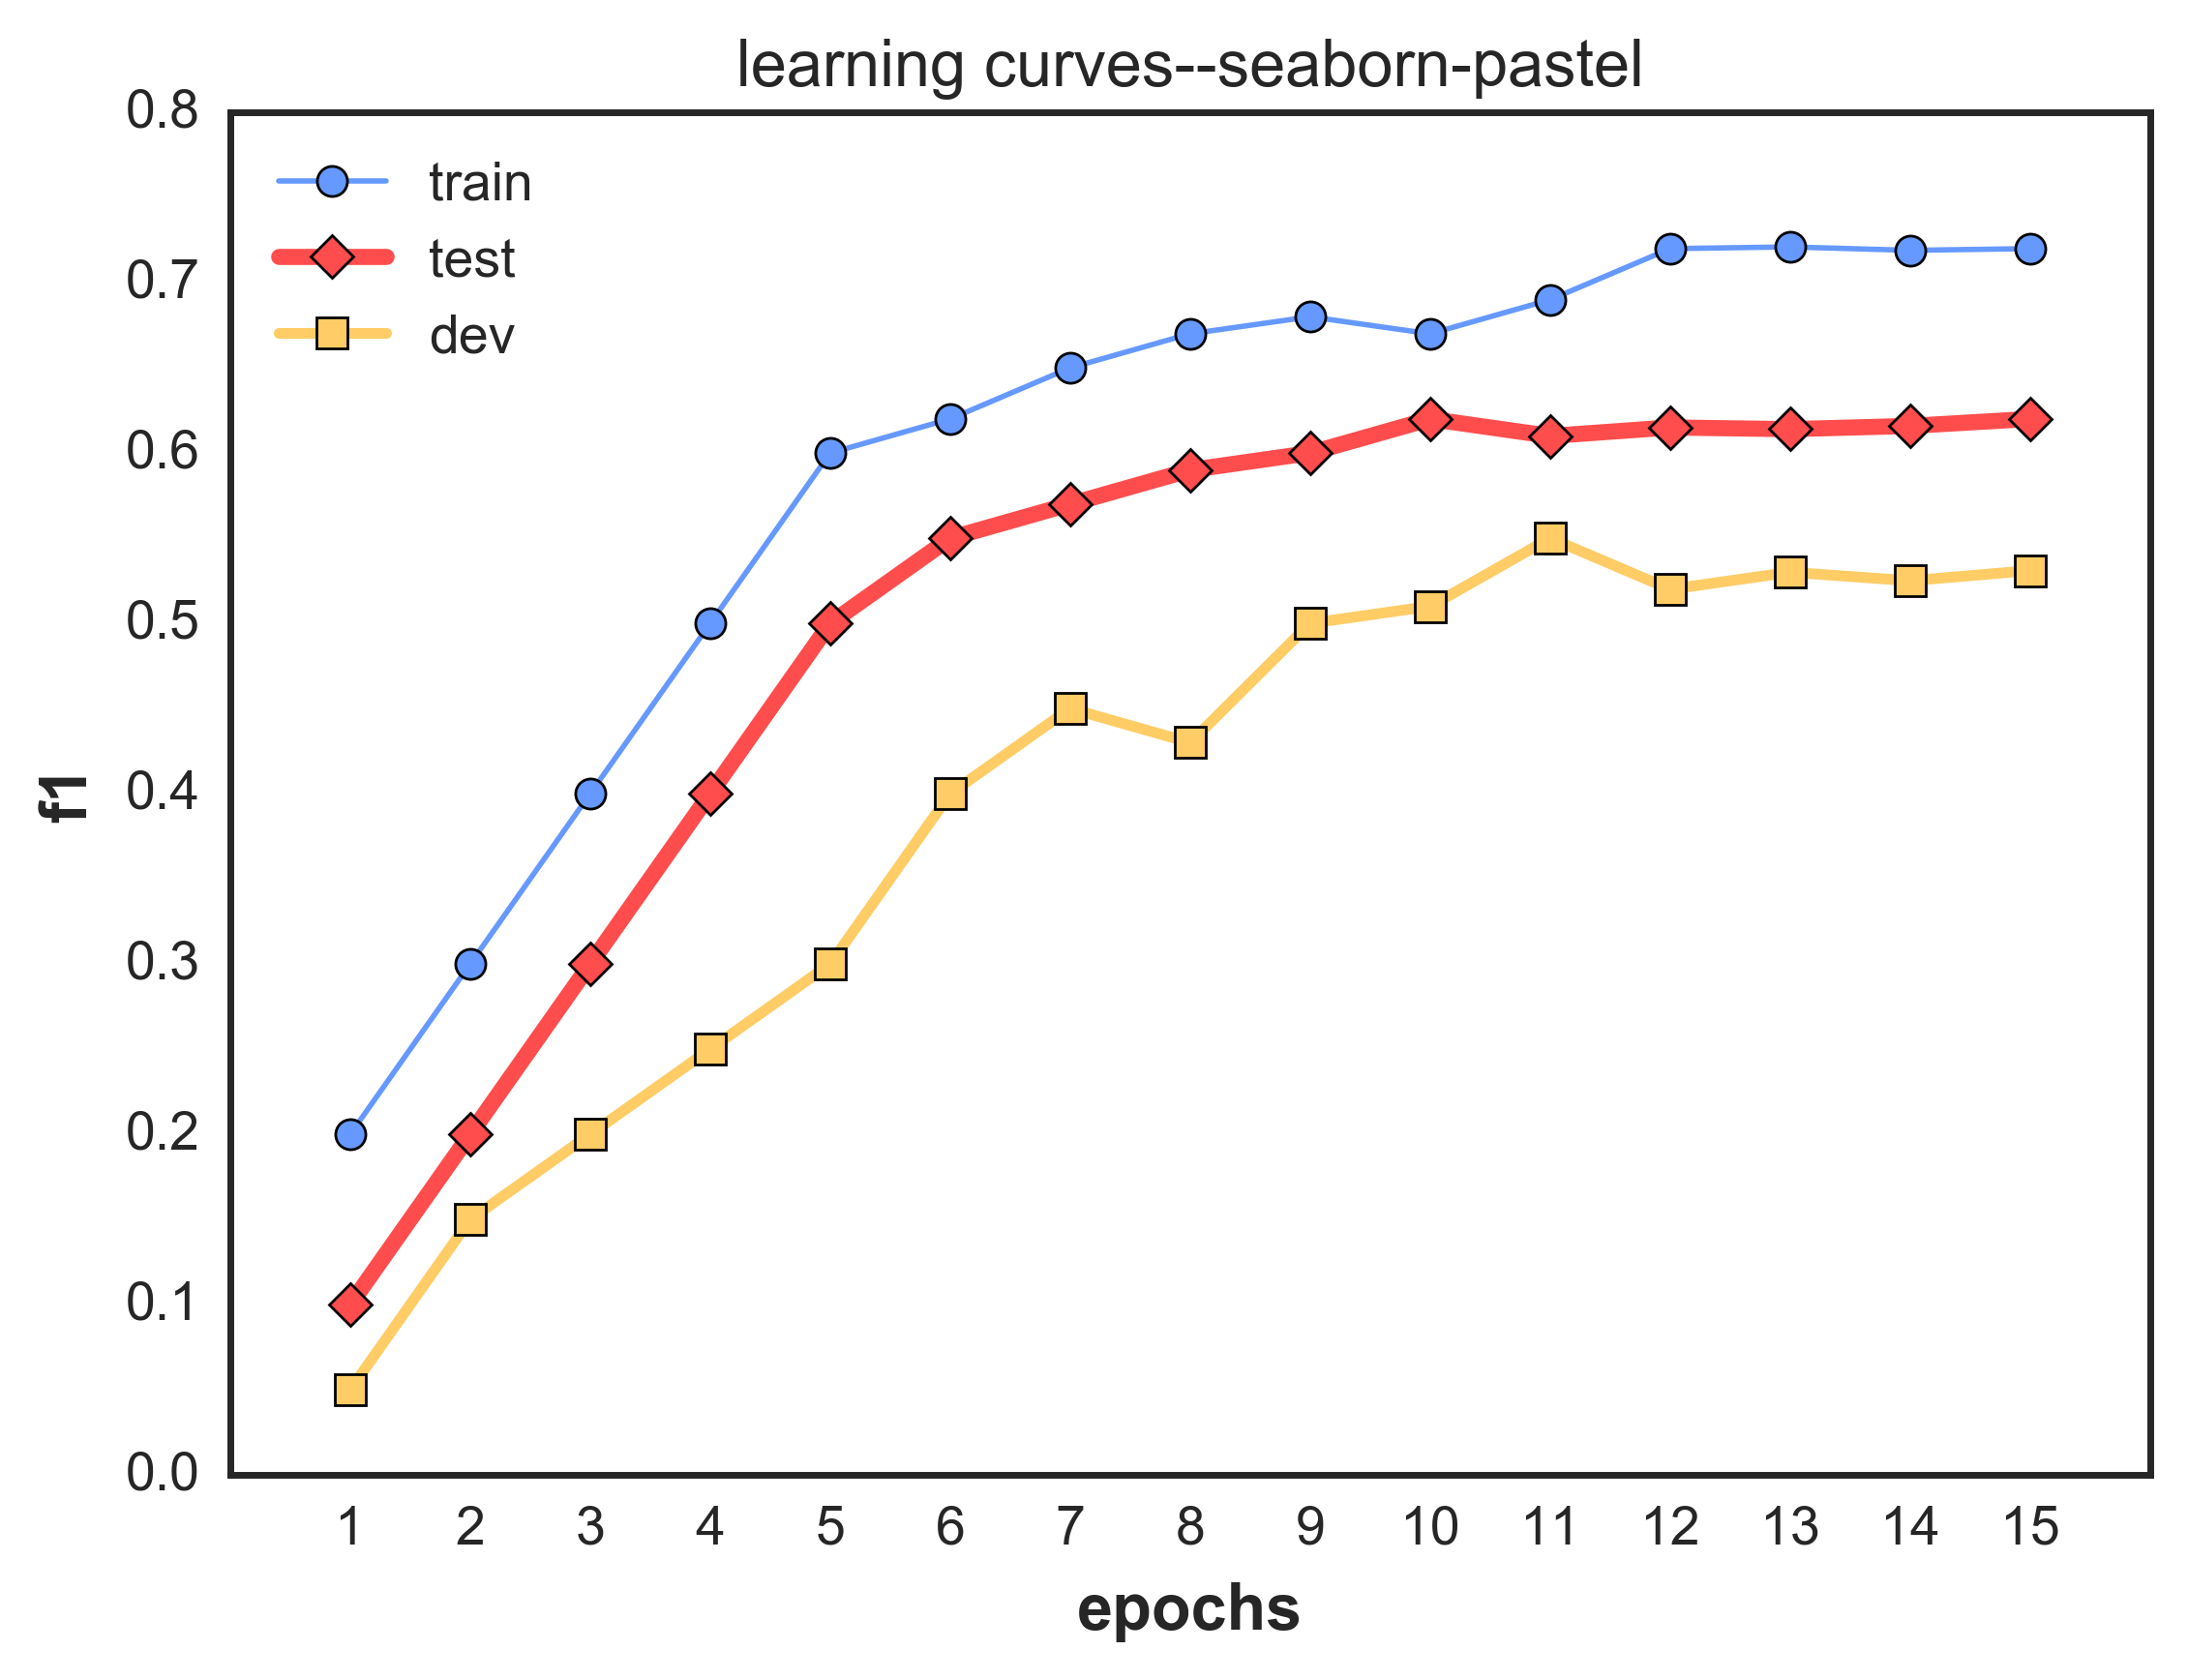

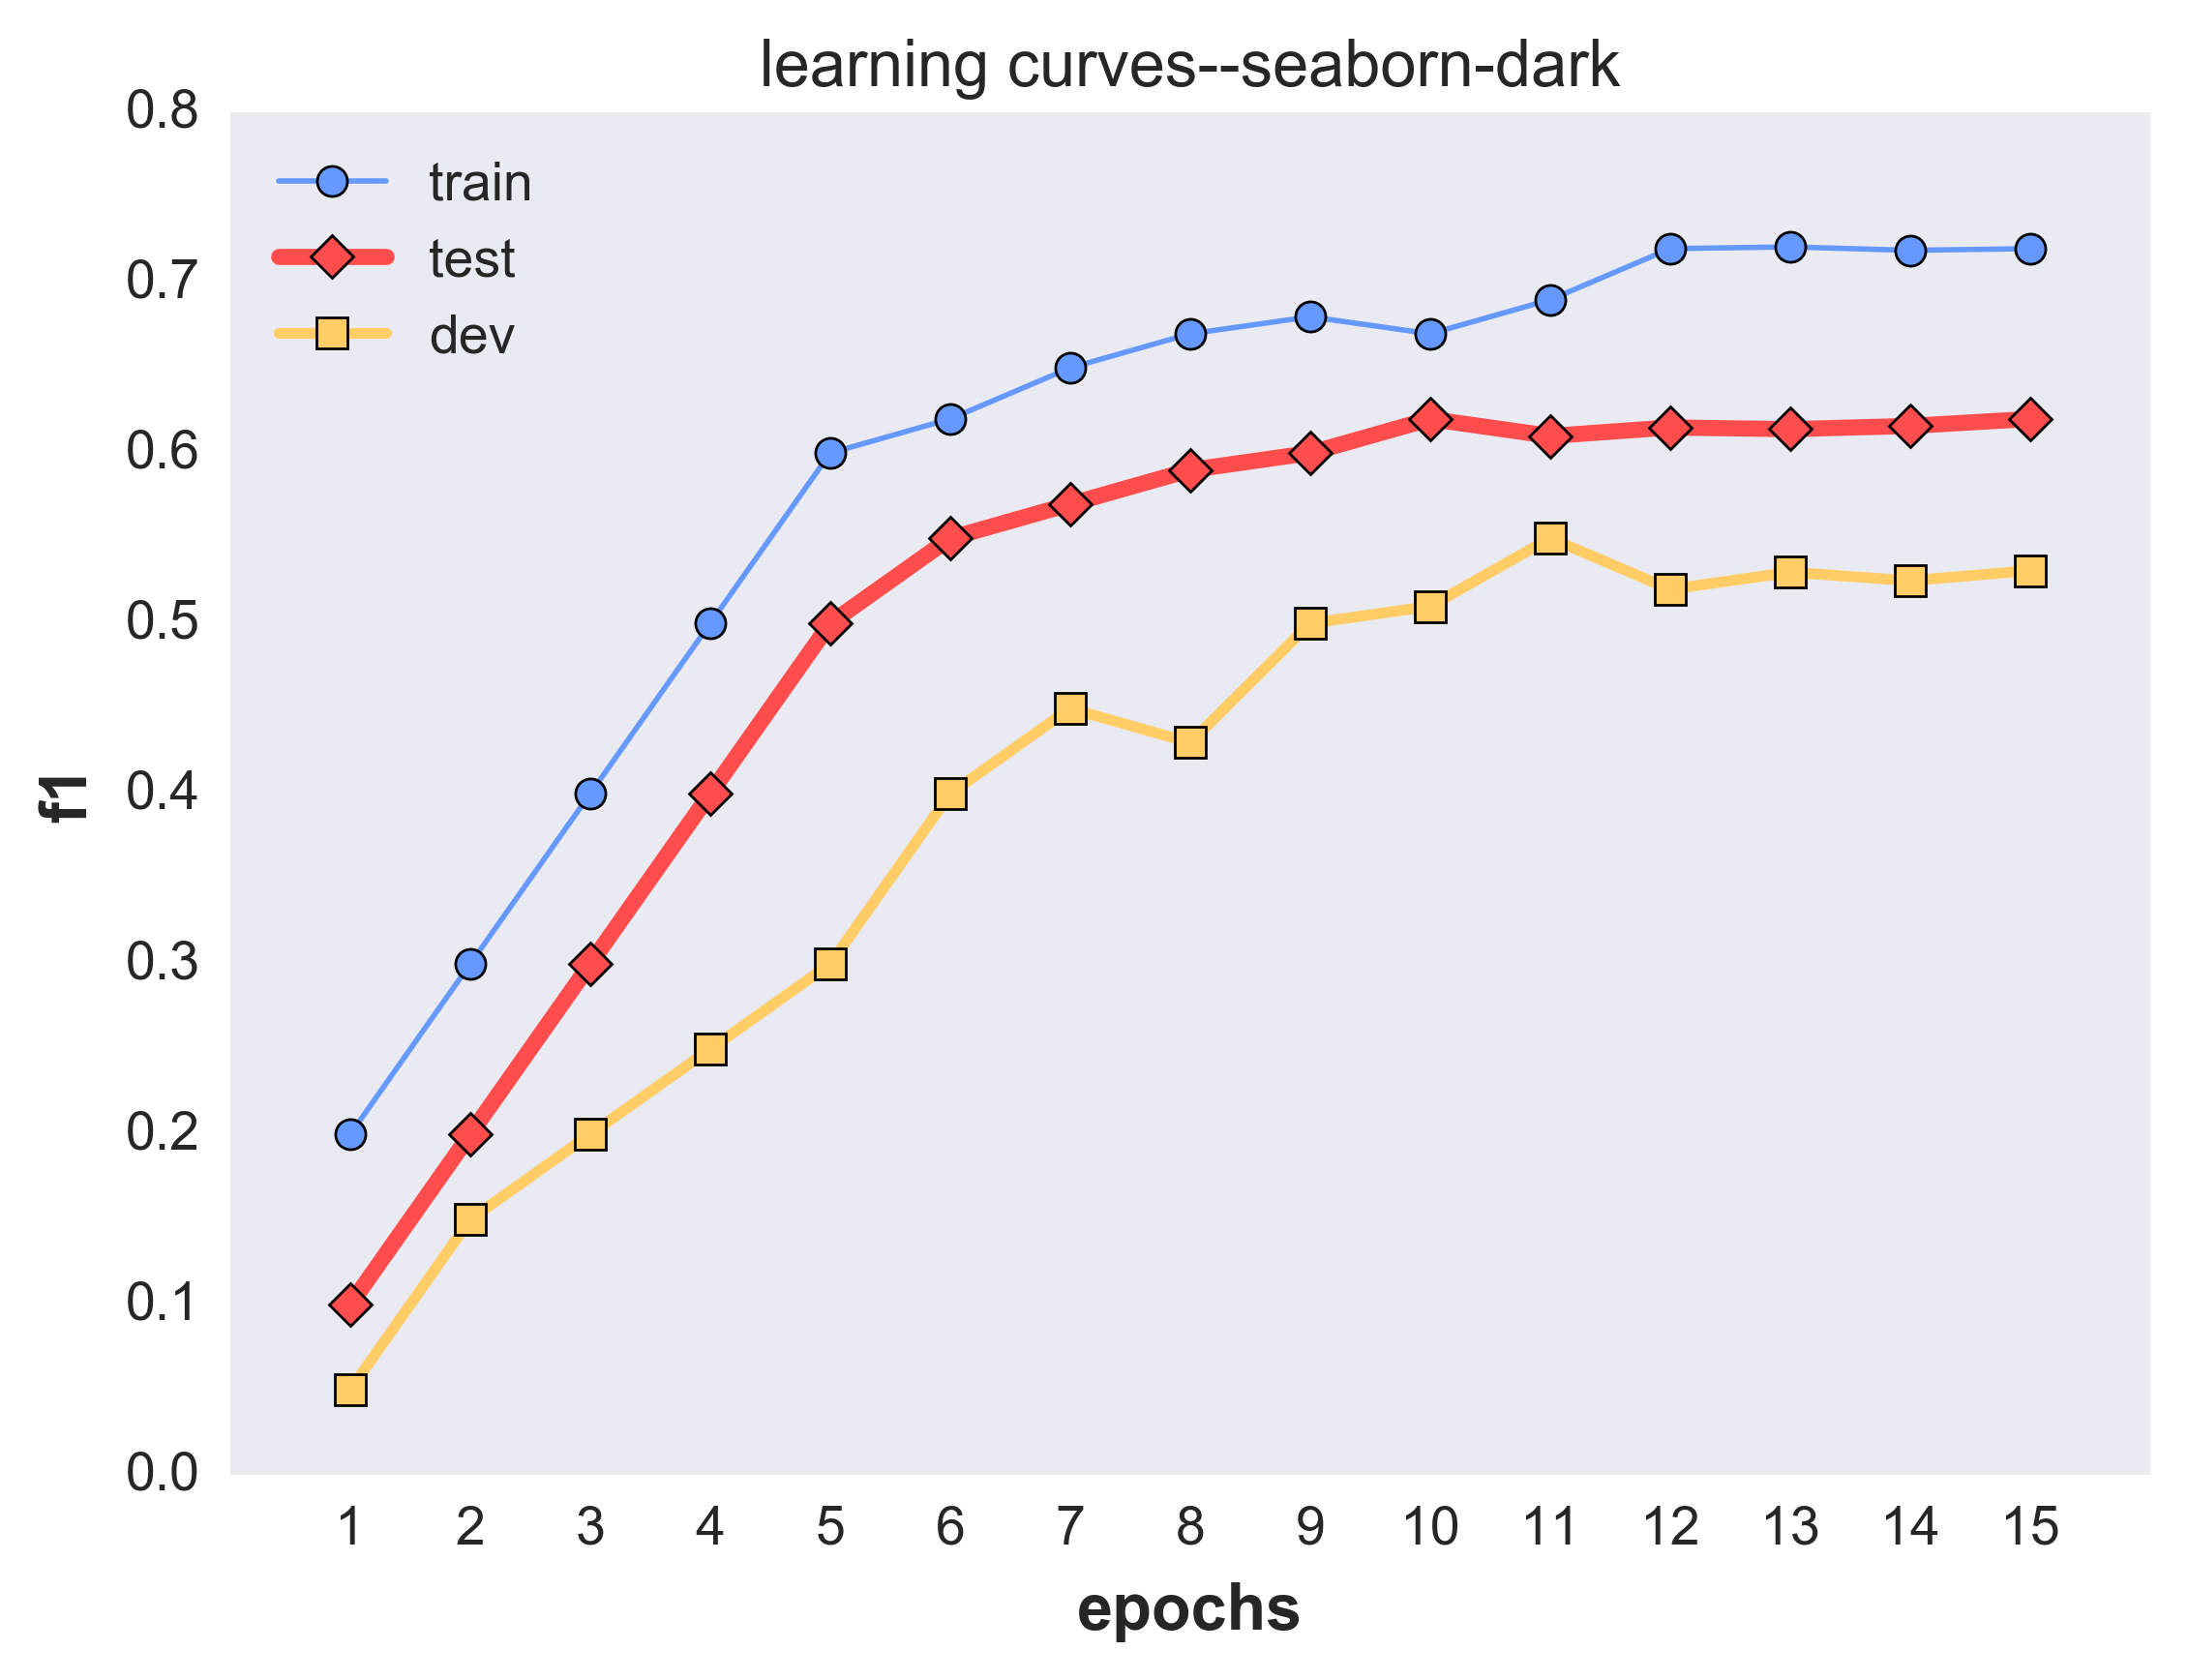

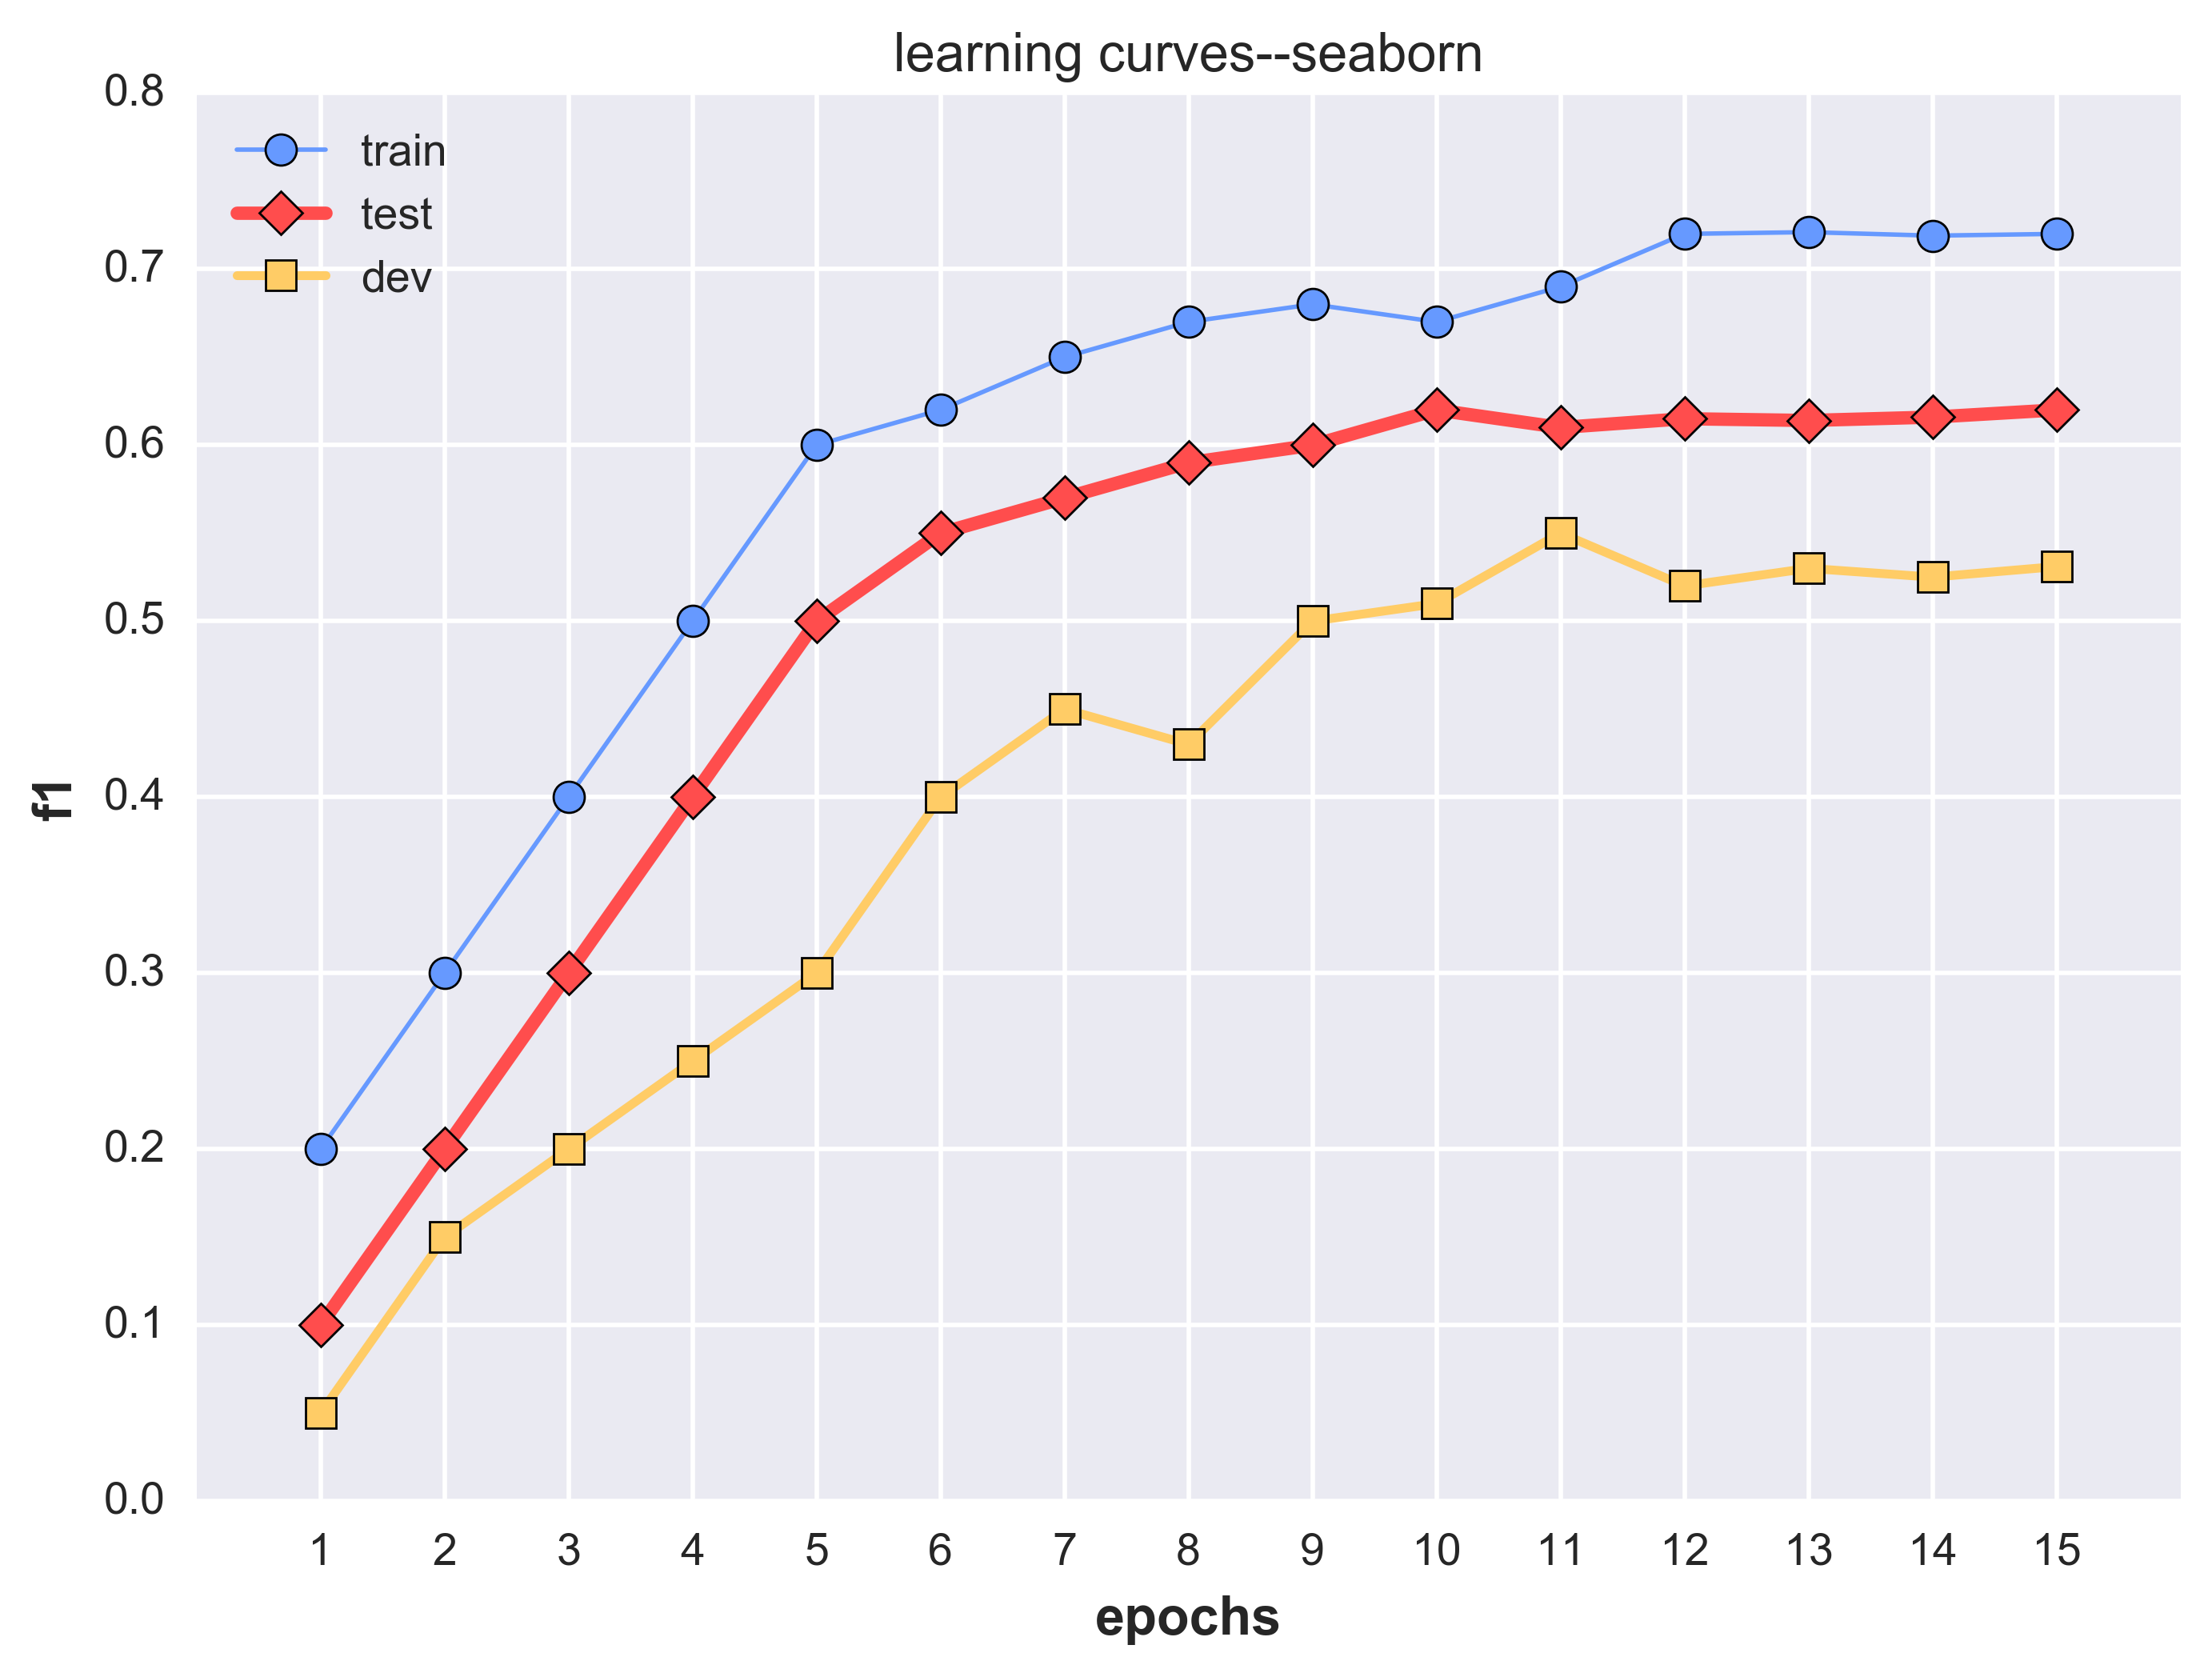

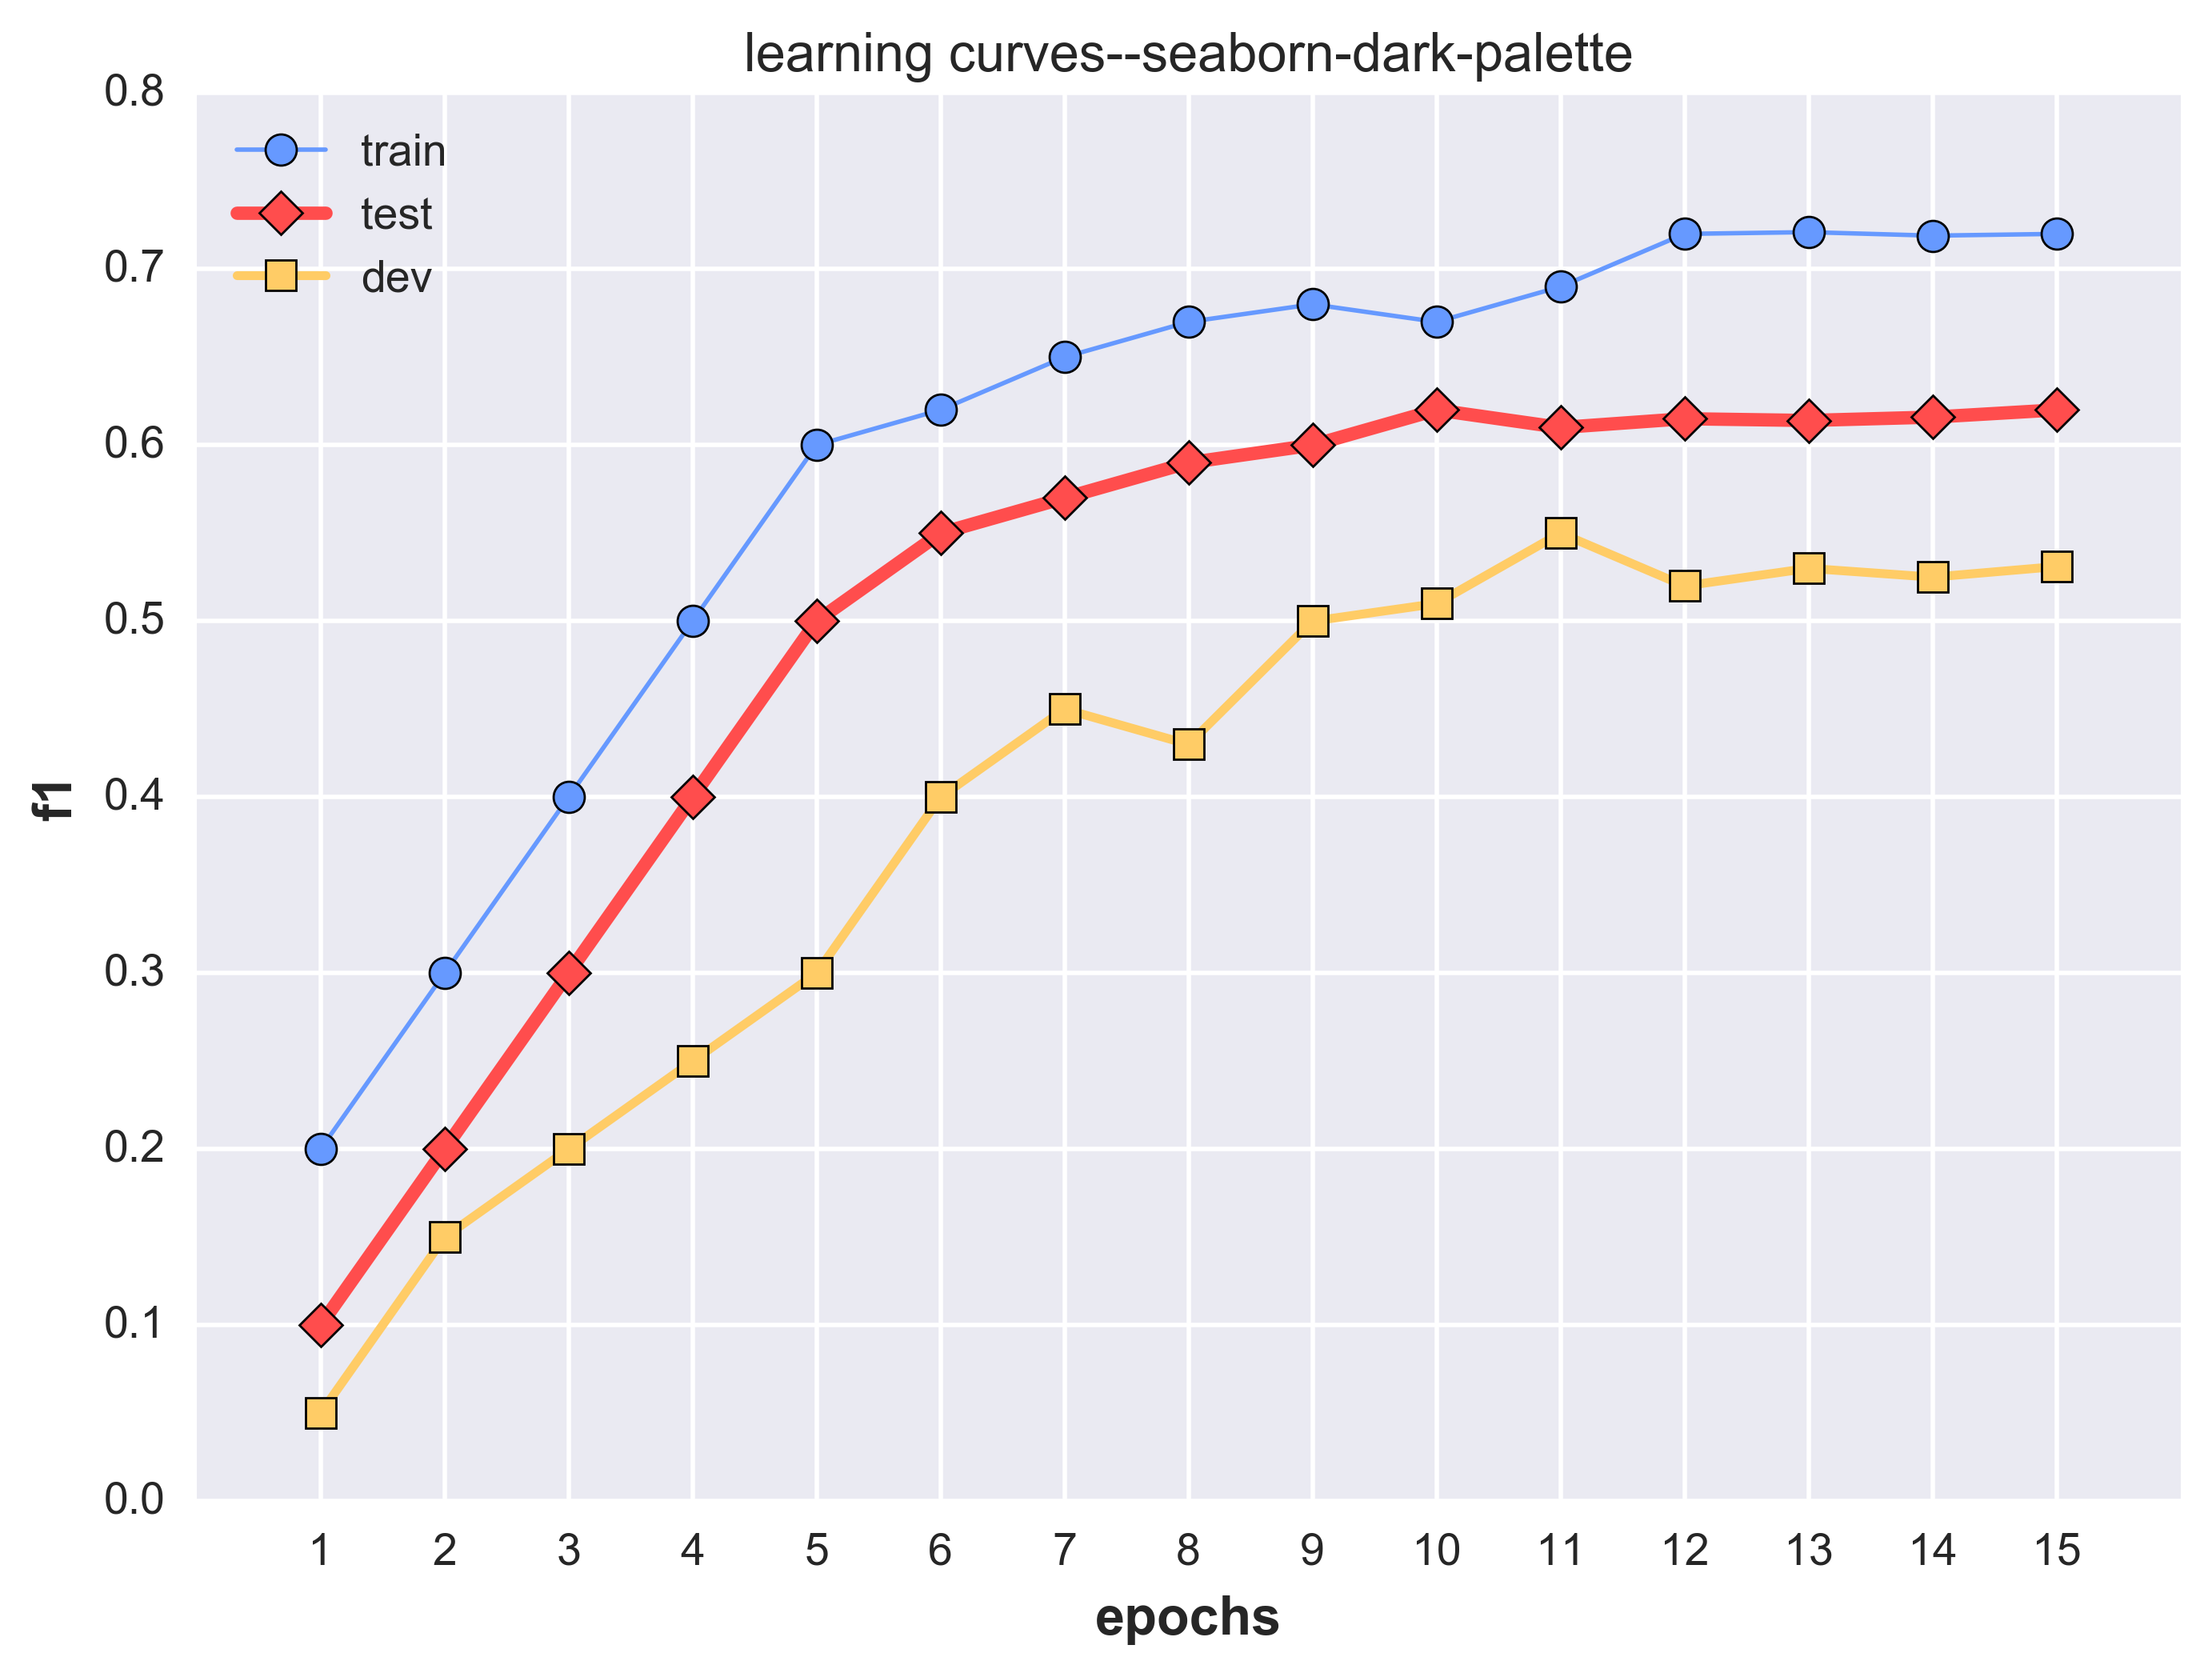

In [400]:
for st in plt.style.available:
    matplotlib.style.use(st)
    plot_learning_curves(fig_path + 'learning_curve.png', n_epochs , flist, '--' + st)

In your scripts after every epoch or after every 1K iterations evaluate your model on train, dev and test data and append corresponding scripts. 

## Heatmaps

### Visualize LSTM outputs

Now import prettyplotlib. 

In [401]:
import prettyplotlib as ppl

```visu_lstm_outputs``` illustrates a heatmap of LSTM outputs.

In [402]:
def visu_lstm_outputs(fig_path, LSTM_outputs, sentence_tokenized):
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    
    slen = len(sentence_tokenized)
    fig, ax = ppl.subplots(1)
    fig.set_figheight(15)
    fig.set_figwidth(20)
    ppl.pcolormesh(fig, ax, LSTM_outputs)

    ax.set_xticks(np.arange(0.5, slen + 0.5, 1))
    ax.set_xticklabels(sentence_tokenized)
    ax.set_title('lstm outputs', fontsize = 25)
    plt.show()
    fig.savefig(fig_path)

Let's see how it works for a randomly generated example.

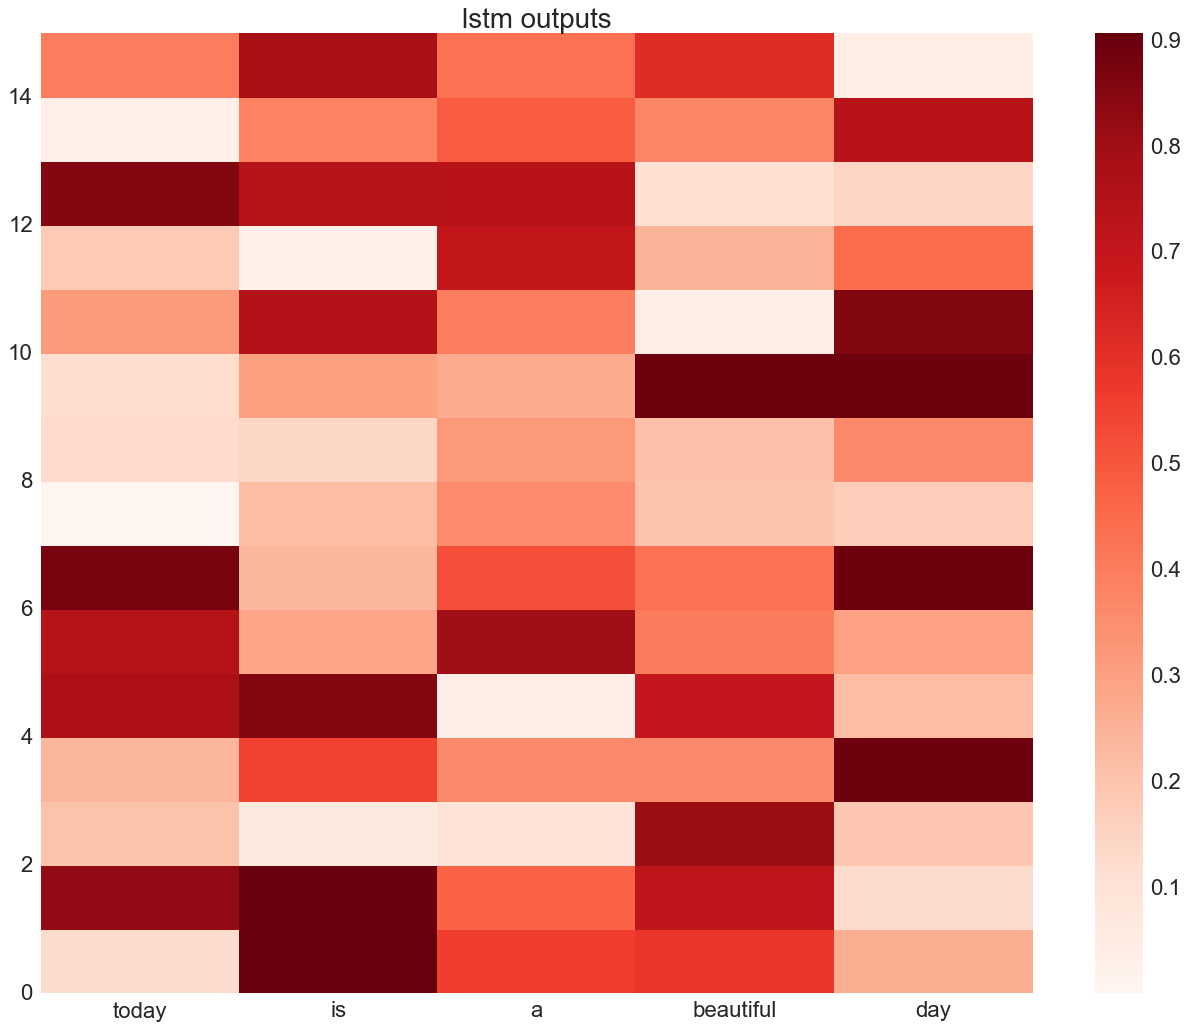

In [240]:
import numpy as np

sentence = 'today is a beautiful day'
sentence_tokenized = sentence.split(' ')
slen = len(sentence_tokenized)
LSTM_hidden_size = 15
LSTM_outputs = np.random.rand(LSTM_hidden_size, slen) 

fig_path = "figs/heatmap_lstm_hidden.png"
visu_lstm_outputs(fig_path, LSTM_outputs, sentence_tokenized)

For a tensorflow model you need to retrieve ourputs with ```outputs_op = graph.get_operation_by_name(op_name).outputs[0]```, run the operation ```outputs = session.run(outputs_op)``` and transpose them ```np.asarray(outputs).transpose()```.

## Visualize improvements

If you compare your models with another model, you can visualize improvements and make your results table easier to interpret.

In [403]:
matplotlib.style.use('seaborn-white')

```visu_imporovements``` makes a heatmap of the improvements data and writes improvements values in the center of cells.

In [404]:
def visu_improvements(improvements_data):
    y_labels = ['model1', 'model2', 'model3', 'model4']
    x_labels = ['measure1', 'measure2', 'measure3']

    fig, ax = plt.subplots(1)
    fig.set_figheight(15)
    fig.set_figwidth(30)
    #plt.pcolormesh(fig, ax, my_data)
    plt.pcolor(improvements_data, cmap=plt.cm.YlGn)
    ax.set_aspect('auto')
    for y in range(improvements_data.shape[0]):
        for x in range(improvements_data.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.2f' % improvements_data[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=30,
                     weight='bold'
                     )

    ax.set_yticks(np.arange(0.5, len(y_labels) + 0.5, 1))
    ax.set_yticklabels(y_labels, size=25, weight='bold')
    ax.set_xticks(np.arange(0.5, len(x_labels) + 0.5, 1))
    ax.set_xticklabels(x_labels, size=17, weight='bold')
    ax.tick_params(axis='both', labelsize=25)
    ax.set_title('improvements', fontsize = 40)

    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=30)
    fig.savefig(fig_path)

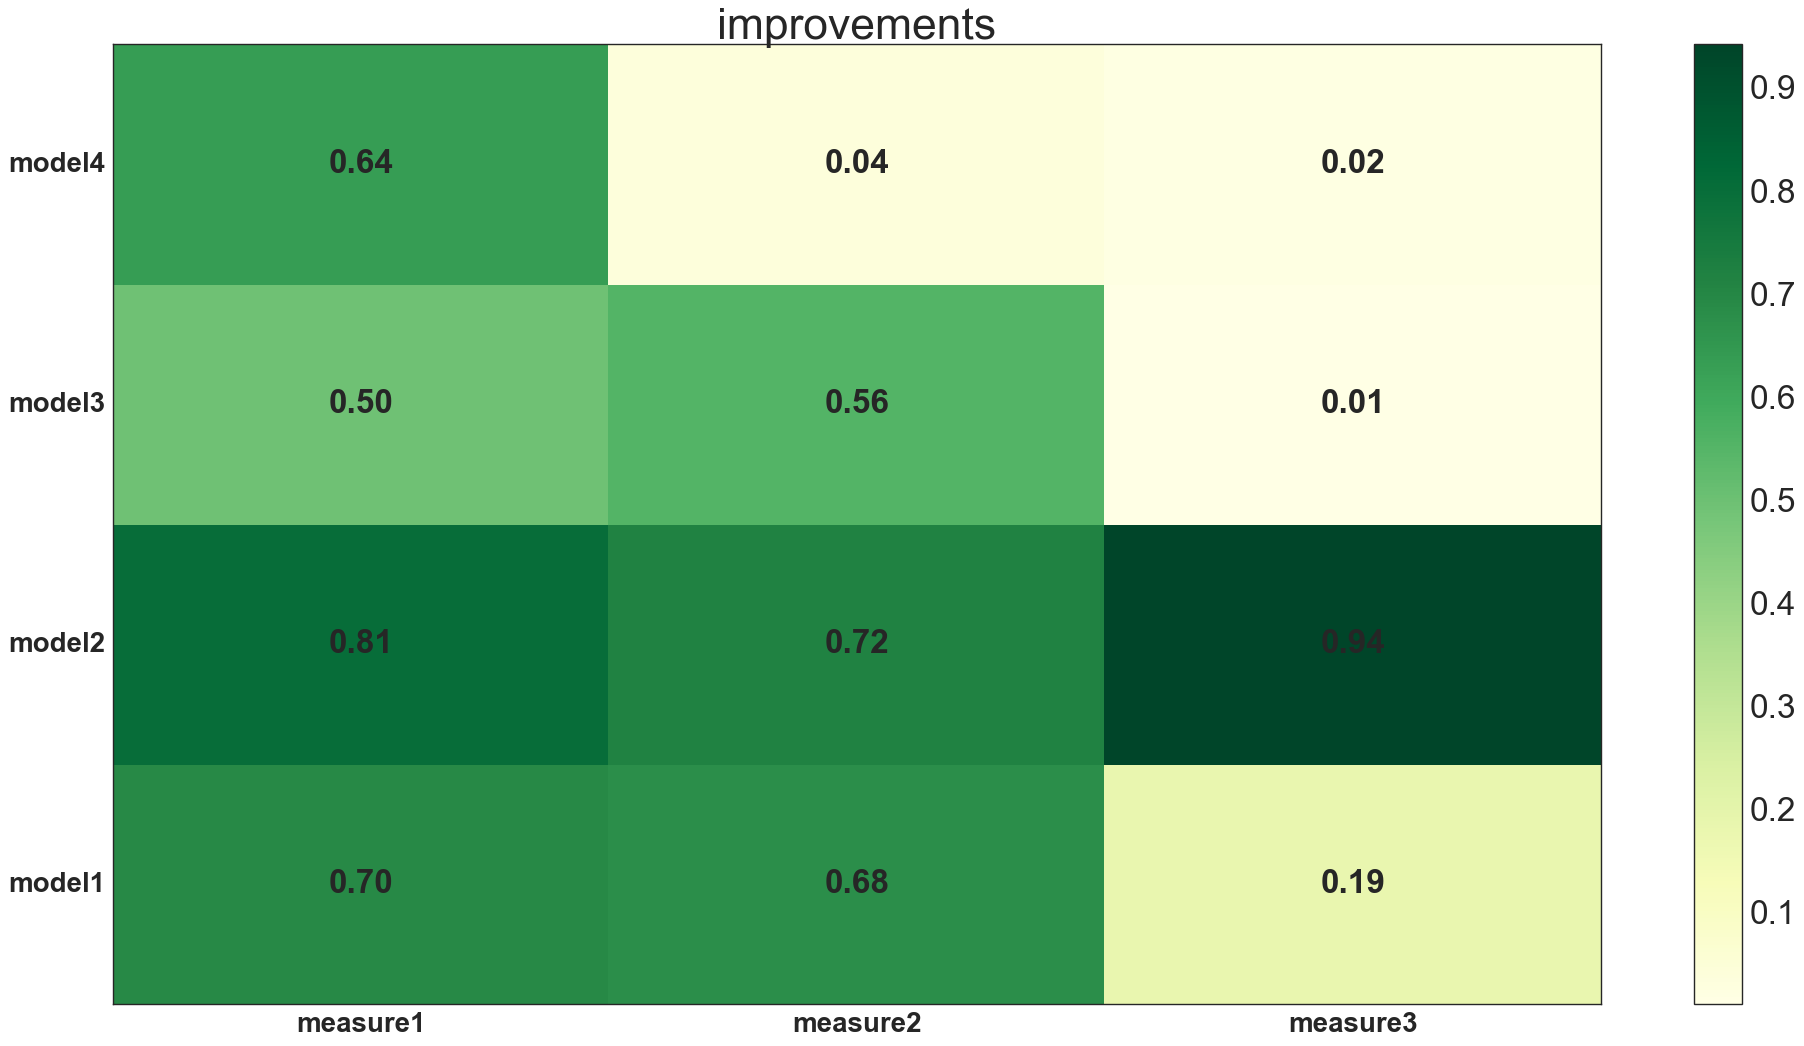

In [405]:
fig_path = "improvements.png"
n_models = 4, 
n_measures = 3
improvements_data = np.random.random_sample((4,3))
np.savetxt(fname='improvements.txt', X=improvements_data, fmt='%10.5f', delimiter='\t')
visu_improvements(improvements_data)

You will write differences of your models and another model in a text file (one row for one model) and read it as a numpy array.

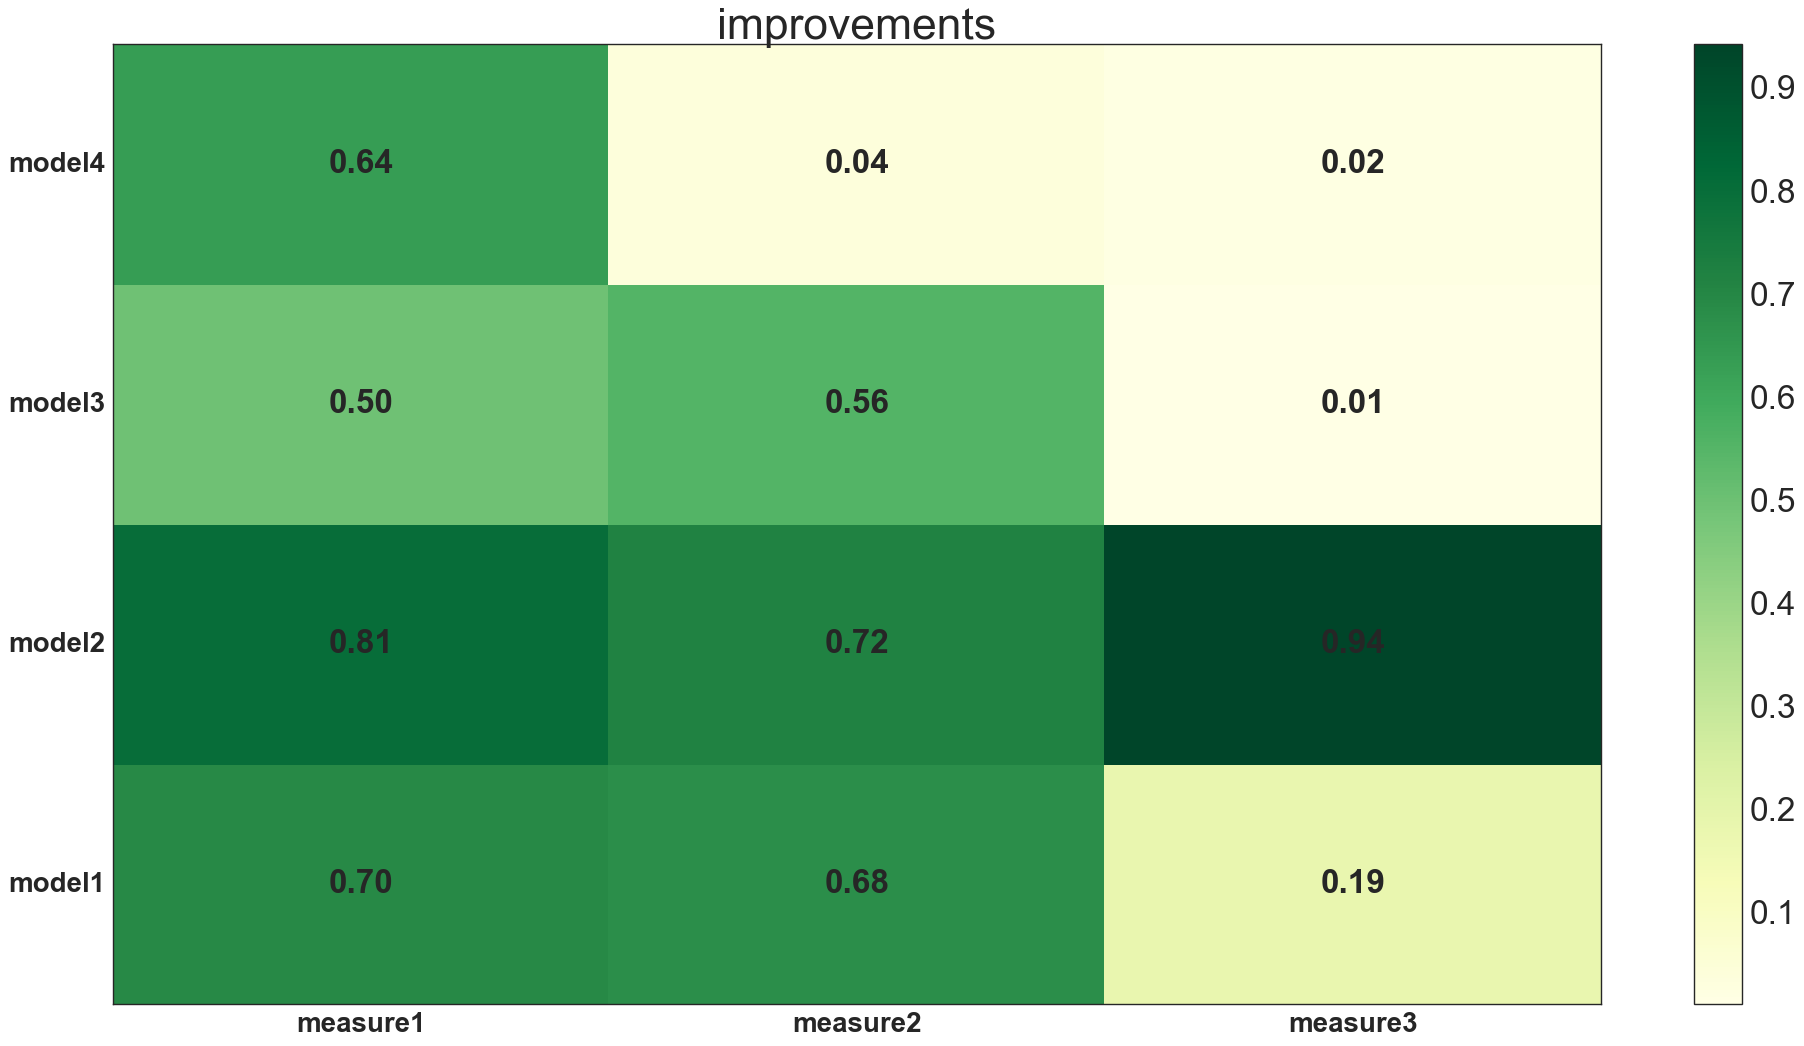

In [406]:
improvements_data = np.loadtxt('improvements.txt', delimiter='\t')
visu_improvements(improvements_data)

## tSNE 

Using ```tSNE``` you can visualize your high-dimensional vectors in 2D space. Learn first how to use tSNE effectively https://distill.pub/2016/misread-tsne/.

In [410]:
def plot(candidates_tsne, n_classes, tags, ids, file_path):
    almost_black = '#262626'

    fig, ax = plt.subplots(1)
    # hard-coded for the example with 3 classes
    colors = ['red', 'blue']

    for k in range(n_classes):
        begin = sum(sizes[:k])
        end = sum(sizes[:k]) + sizes[k]
        x = [candidates_tsne[i, 0] for i in range(begin, end)]
        y = [candidates_tsne[i, 1] for i in range(begin, end)]

        # marks every vector with "id (tag)", where id and tag could be anything you like, e.g. word (POS)
        # every vector point is colored with the corresponding class color
        text = [str(ids[i]) + " (" + str(tags[i]) + ")" for i in range(begin, end)]
        ax.scatter(x, y, label='class'+str(k+1), alpha=0.5, edgecolor=almost_black, facecolor=colors[k], linewidth=0.15)

        for i, txt in enumerate(text):
            ax.annotate(txt, (x[i], y[i]))

    # remove top and right axes
    spines_to_remove = ['top', 'right']
    for spine in spines_to_remove:
        ax.spines[spine].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    spines_to_keep = ['bottom', 'left']
    for spine in spines_to_keep:
        ax.spines[spine].set_linewidth(0.5)
        ax.spines[spine].set_color(almost_black)
        
    # make axis almost black
    ax.xaxis.label.set_color(almost_black)
    ax.yaxis.label.set_color(almost_black)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_color(almost_black)
    ax.set_title('tsne', fontsize = 20)

    # make the legend background light gray
    light_grey = np.array([float(248)/float(255)]*3)
    legend = ax.legend(frameon=True, scatterpoints=1)
    rect = legend.get_frame()
    rect.set_facecolor(light_grey)
    rect.set_linewidth(0.0)

    # change the legend label colors to almost black
    texts = legend.texts
    for t in texts:
        t.set_color(almost_black)

    ax.grid(False)
    plt.show()
    fig.savefig(str(file_path), dpi=200)
    plt.close()

Make random classification dataset.

In [411]:
import sklearn
from sklearn import datasets

n_classes = 2
X, y = datasets.make_classification(n_samples=10, n_features=20, class_sep=10)
types = [[] for _ in range(n_classes)]
sizes = [0]*n_classes
for i, l in enumerate(y):
    types[l].append(X[i])
    sizes[l] += 1

for i in range(n_classes):
    types[i] = np.asarray(types[i]).reshape((sizes[i], 20))

And plot.

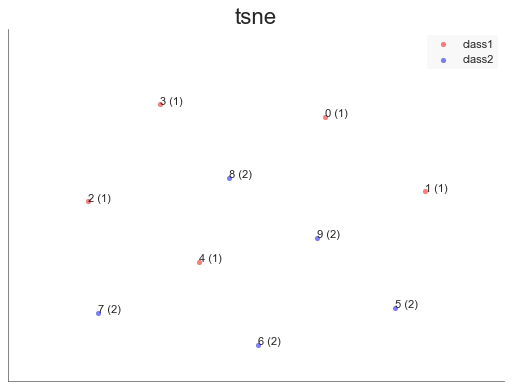

In [412]:
from sklearn.manifold import TSNE

joint = np.concatenate(types, 0)
tsne = TSNE(init='pca', n_iter=5000)
candidates_tsne = tsne.fit_transform(joint)
file_path = "figs/tsne.png"
tags = [1]*sizes[0] + [2]*sizes[1]
ids = range(sum(sizes))
plot(candidates_tsne, n_classes, tags, ids, file_path)

When running on serves comment ```plt.show``` for all examples.